In [1]:
import pandas as pd
import matplotlib.pylab as plt
import math

In [2]:
plt.rcParams['figure.dpi'] = 200

In [3]:
df = pd.read_csv("data/World Energy Consumption.csv", encoding = "ISO-8859-1", engine='python')

In [4]:
df = df[df.columns.difference(['iso_code'])]

In [5]:
df.shape

(17432, 121)

In [6]:
columns_names = df.columns.tolist()

In [8]:
# In function of the countries found in the last data base, we are gonna focus on those ones
# Note: In the last data base USA wasn't inside, but here this countries it does inside this one
#countries_names = ['Sweden', 'Singapore', 'Switzerland', 'Netherlands', 'Finland', 'United States', 'Russia', 'China']

# Modifing some variables

In [7]:
df['gdp_b'] = df.gdp/1e+6                         # Variable in billions
df['gdp_per_capita'] = df.gdp/df.population

In [8]:
ts_mean = df
ts_sum = df

In [9]:
ts_mean = ts_mean.groupby(['year']).mean()
ts_mean = ts_mean.reset_index()

ts_sum = ts_sum.groupby(['year']).sum()
ts_sum = ts_sum.reset_index()

In [10]:
ts_mean.shape

(121, 122)

## Checking YEAR variable

In [11]:
df.year.describe()

count    17432.000000
mean      1973.094367
std         34.333995
min       1900.000000
25%       1946.000000
50%       1983.000000
75%       2002.000000
max       2020.000000
Name: year, dtype: float64

In [12]:
#     Some years are missing
from statistics import mean
a = list(range(1900, 2021))
mean(a)

1960

## Checking null values inside variables

In [13]:
var_columns = list(ts_mean.isnull().sum().index)
amount_null = list(ts_mean.isnull().sum().values)


my_dict = {'columnillas': var_columns, 'amountNull': amount_null}
ts_check_null= pd.DataFrame.from_dict(my_dict)
ts_check_null

columnillas  amountNull
0                       year           0
1    biofuel_cons_change_pct          92
2    biofuel_cons_change_twh           1
3    biofuel_cons_per_capita           1
4        biofuel_consumption           1
..                       ...         ...
117   wind_energy_per_capita          66
118          wind_share_elec          85
119        wind_share_energy          66
120                    gdp_b           4
121           gdp_per_capita           4

[122 rows x 2 columns]

Once we got the mean of every variable grouped by "year", got that the variables with less null data are:

In [14]:
ts_important_columns = ts_check_null.loc[ts_check_null.amountNull < 60, ]
columns_names = ts_important_columns.columnillas.value_counts().index.tolist()
columns_names.remove('year')
columns_names.remove('gdp')
columns_names.remove('gdp_per_capita')
columns_names.sort()
print(ts_important_columns.shape)
print(" ")
print(columns_names)
print(" ")
ts_important_columns

(20, 2)
 
['biofuel_cons_change_twh', 'biofuel_cons_per_capita', 'biofuel_consumption', 'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita', 'coal_production', 'gas_prod_change_pct', 'gas_prod_change_twh', 'gas_prod_per_capita', 'gas_production', 'gdp_b', 'oil_prod_change_pct', 'oil_prod_change_twh', 'oil_prod_per_capita', 'oil_production', 'population']
 


columnillas  amountNull
0                       year           0
2    biofuel_cons_change_twh           1
3    biofuel_cons_per_capita           1
4        biofuel_consumption           1
16      coal_prod_change_pct           2
17      coal_prod_change_twh           2
18      coal_prod_per_capita           1
19           coal_production           1
41       gas_prod_change_pct           2
42       gas_prod_change_twh           2
43       gas_prod_per_capita           1
44            gas_production           1
47                       gdp           4
78       oil_prod_change_pct           2
79       oil_prod_change_twh           2
80       oil_prod_per_capita           1
81            oil_production           1
94                population           1
120                    gdp_b           4
121           gdp_per_capita           4

# Plotting time series by mean()

We have to point out, that the variable "gdp" which is the "Gross domestic product", differs a little bit from the gdp got it in a google search. Also, many contries are missing in the data base. Thus, the average gdp per capita is not very exact.

In [15]:
ts_mean.gdp_per_capita.isnull().sum()

4

In [16]:
ts_mean = ts_mean[ts_mean['gdp_per_capita'].notna()]

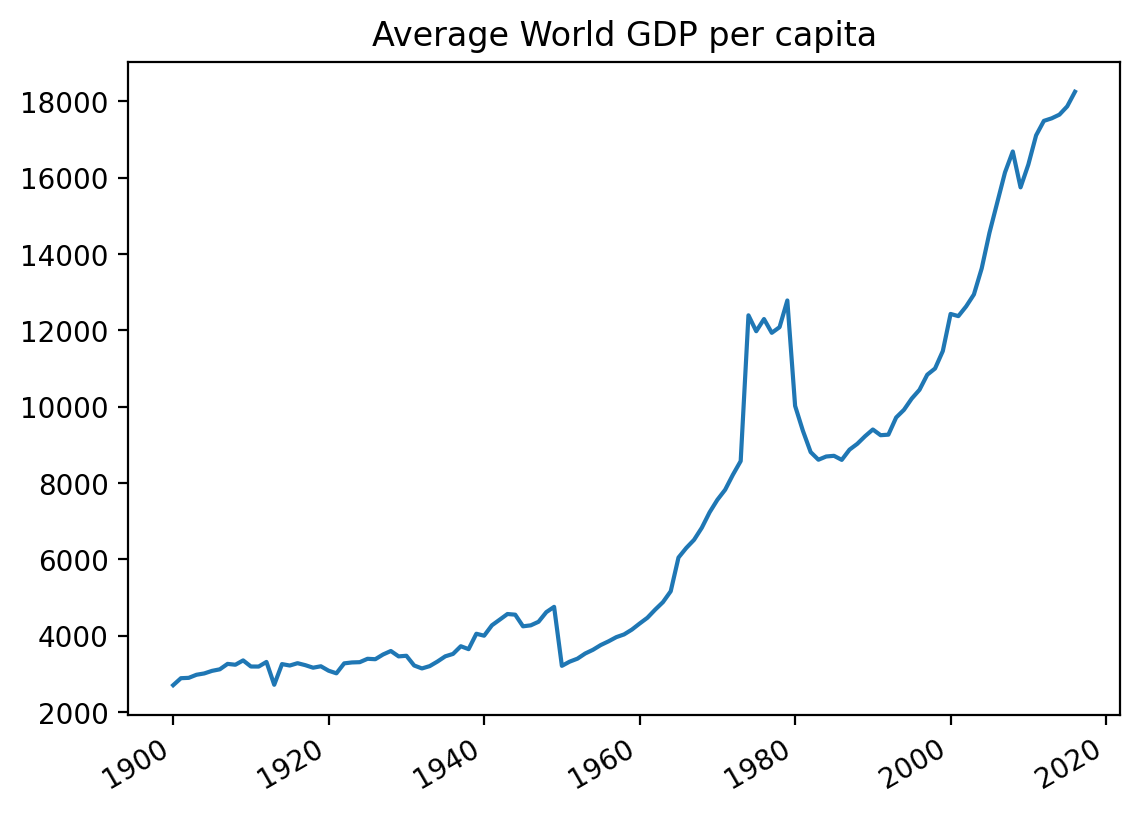

In [17]:
plt.plot(ts_mean['year'], ts_mean['gdp_per_capita'])
plt.title("Average World GDP per capita")
plt.gcf().autofmt_xdate()

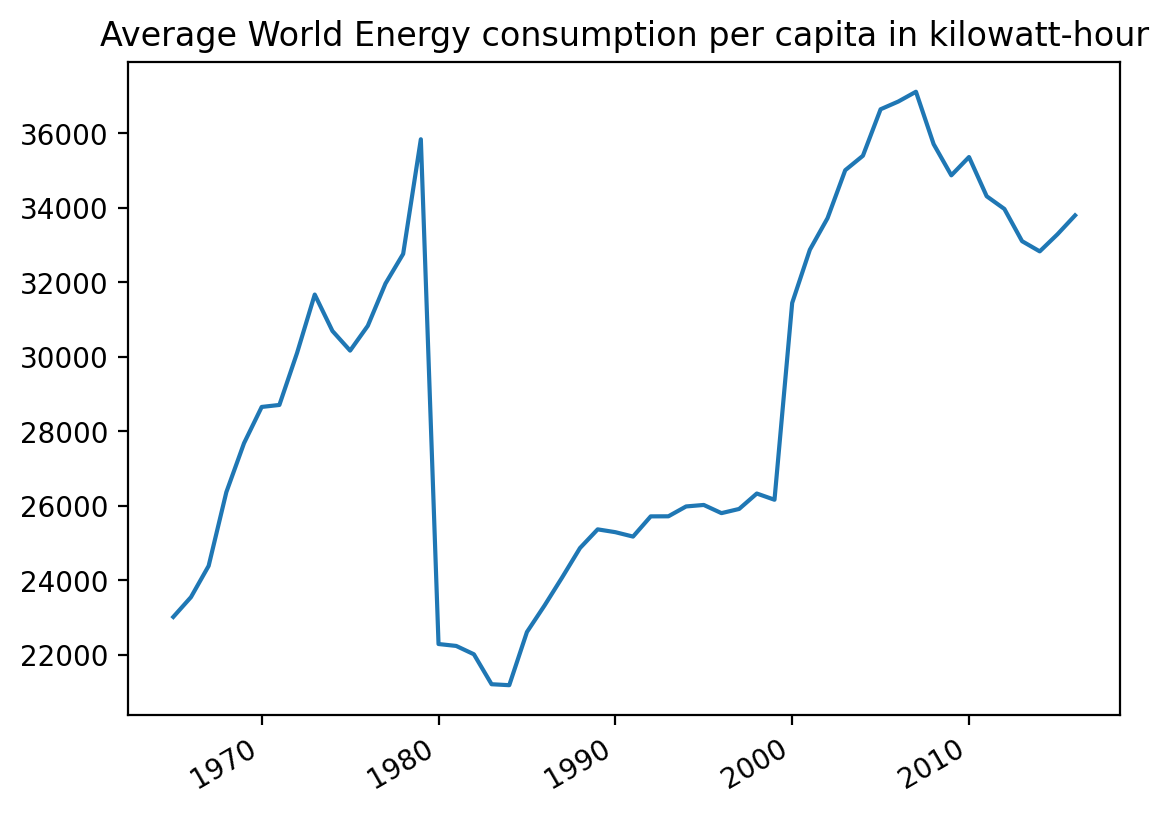

In [18]:
plt.plot(ts_mean['year'], ts_mean['energy_per_capita'])
plt.title("Average World Energy consumption per capita in kilowatt-hour")
plt.gcf().autofmt_xdate()

# Plotting time series by sum()

We have to point out, that "popaltion" variable, differs a lot from the Population got it in a google search. Also, many contries are missing in the data base. Thus, the scale in the plot is wrong but we can see the tendency that is similar to the reality.

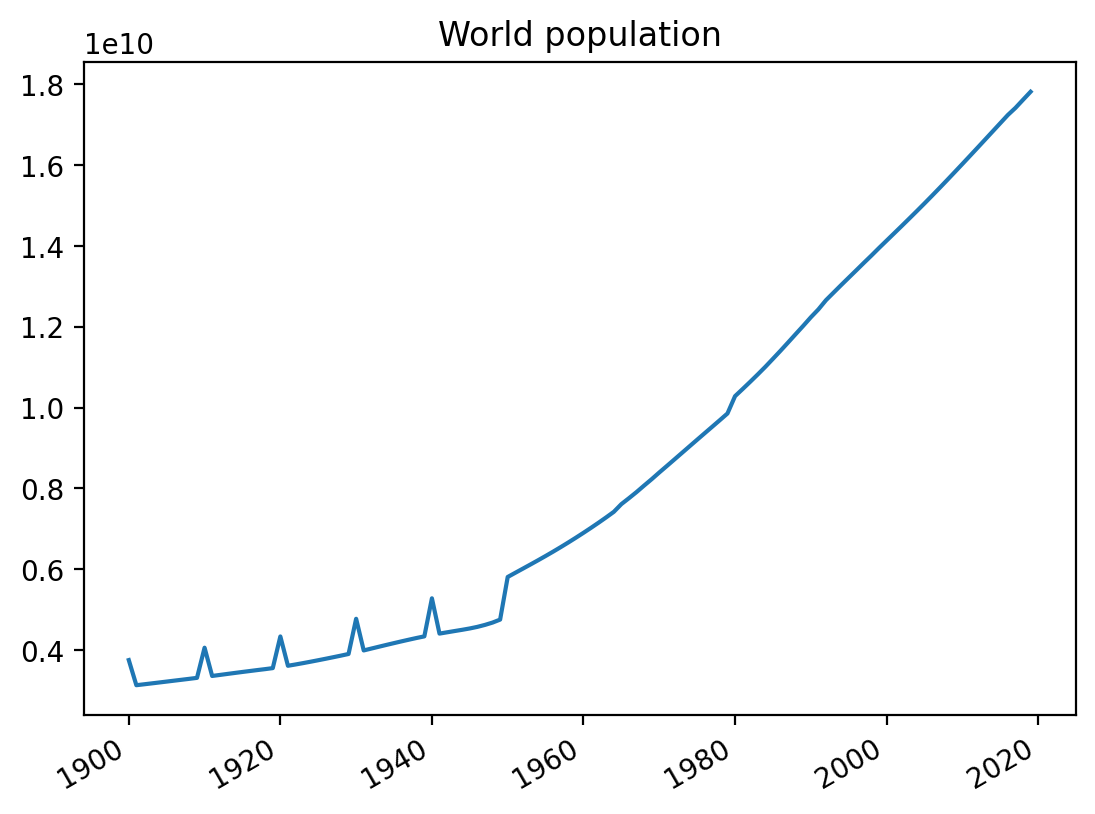

In [19]:
plt.plot(ts_sum['year'].head(ts_sum.shape[0] - 1), ts_sum['population'].head(ts_sum.shape[0] - 1))
plt.title("World population")
plt.gcf().autofmt_xdate()

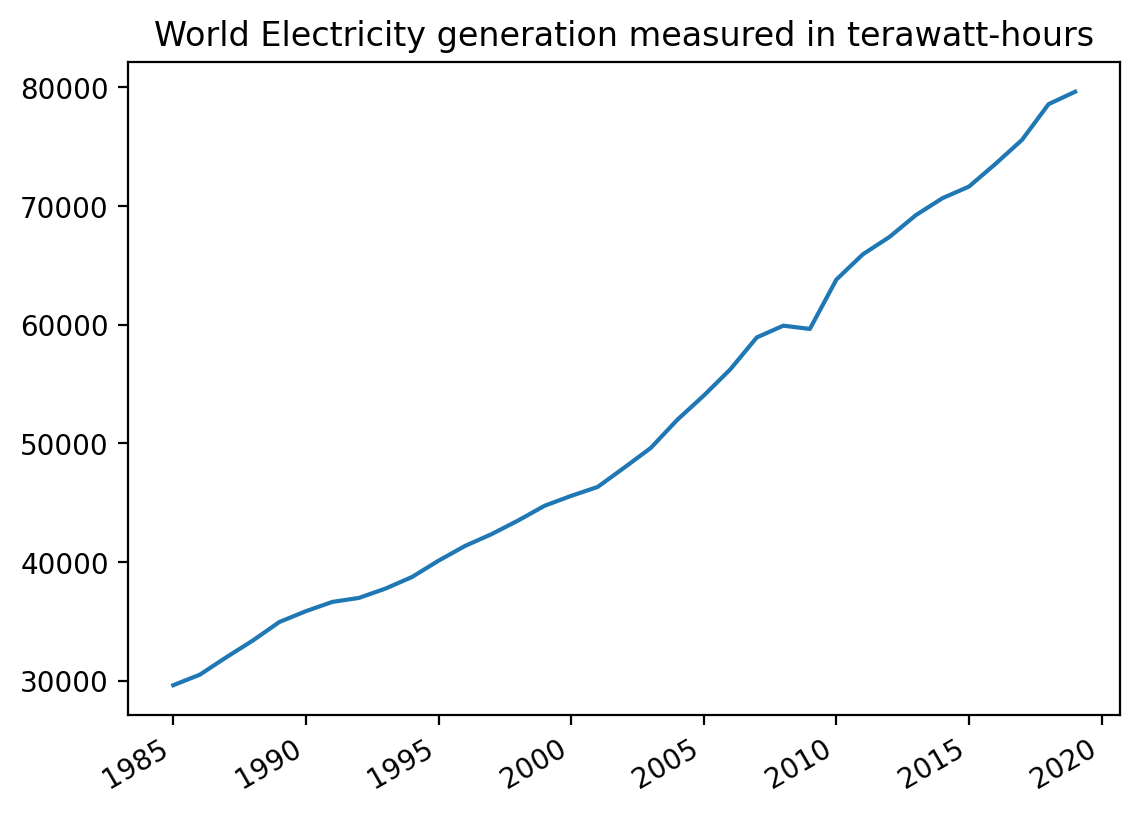

In [20]:
temp_df = ts_sum
temp_df = temp_df.loc[temp_df.electricity_generation > 0, ['year', 'electricity_generation']]
plt.plot(temp_df.year.head(temp_df.shape[0] - 1), 
         temp_df.electricity_generation.head(temp_df.shape[0] - 1))
plt.title("World Electricity generation measured in terawatt-hours")
plt.gcf().autofmt_xdate()

In [95]:
plt.plot(ts_sum.loc[ts_sum.gas_consumption > 0, ['year']], 
         ts_sum.loc[ts_sum.gas_consumption > 0, ['gas_consumption']])
plt.title("World gas consumptionn measured in terawatt-hours")
plt.gcf().autofmt_xdate()

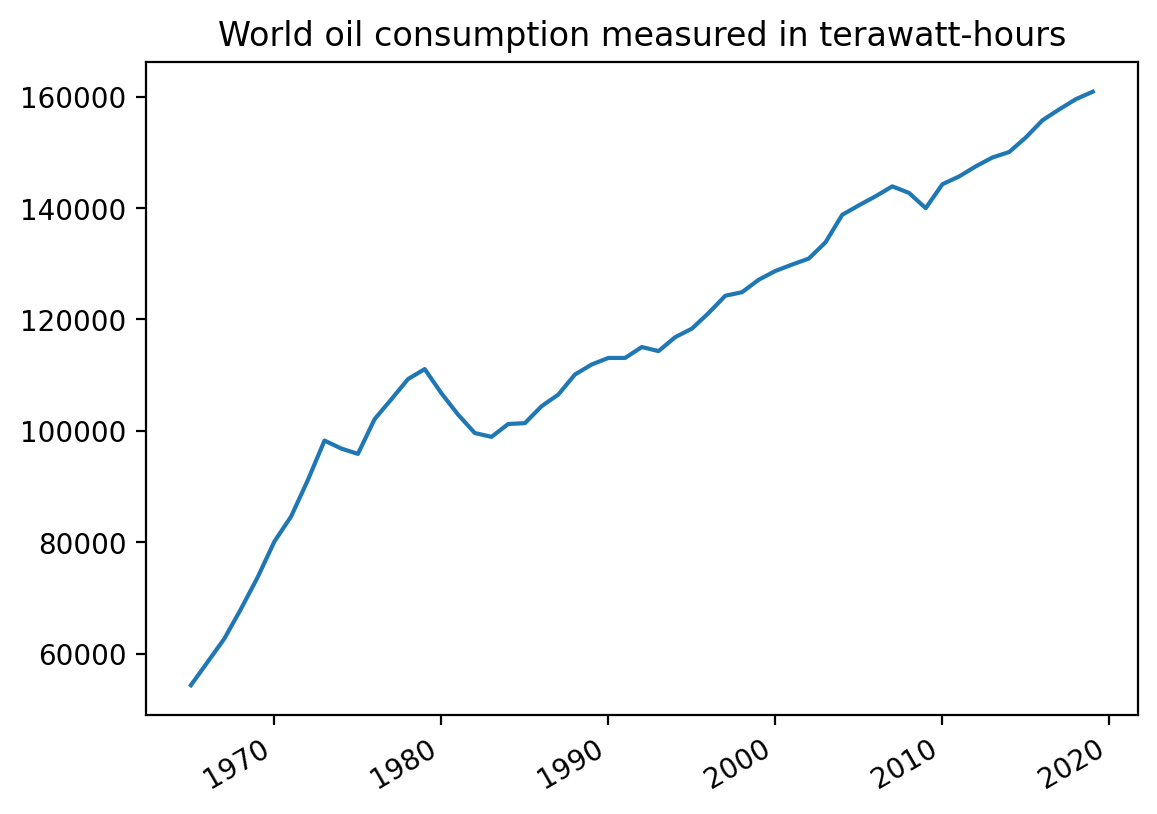

In [21]:

plt.plot(ts_sum.loc[ts_sum.oil_consumption > 0, ['year']], 
         ts_sum.loc[ts_sum.oil_consumption > 0, ['oil_consumption']])
plt.title("World oil consumption measured in terawatt-hours")
plt.gcf().autofmt_xdate()

# Correlations

## All variables

In [9]:
import seaborn as sns


def corr_plot(df):
    dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
    return dataplot

Let's graph the variables despite having so many null values

In [19]:
df_corr = df
df_corr = df_corr[df_corr.columns.difference(['year', 'country', 'gdp', 'gdp_per_capita'])]
columns_names = df_corr.columns.tolist()

In [25]:
corr_plot_dat = corr_plot(df_corr)
plt.show()

In [20]:
plt.hist(df_corr.corr()['gdp_b'].values, 50)
plt.title("GDP corelations histogram")
plt.show()

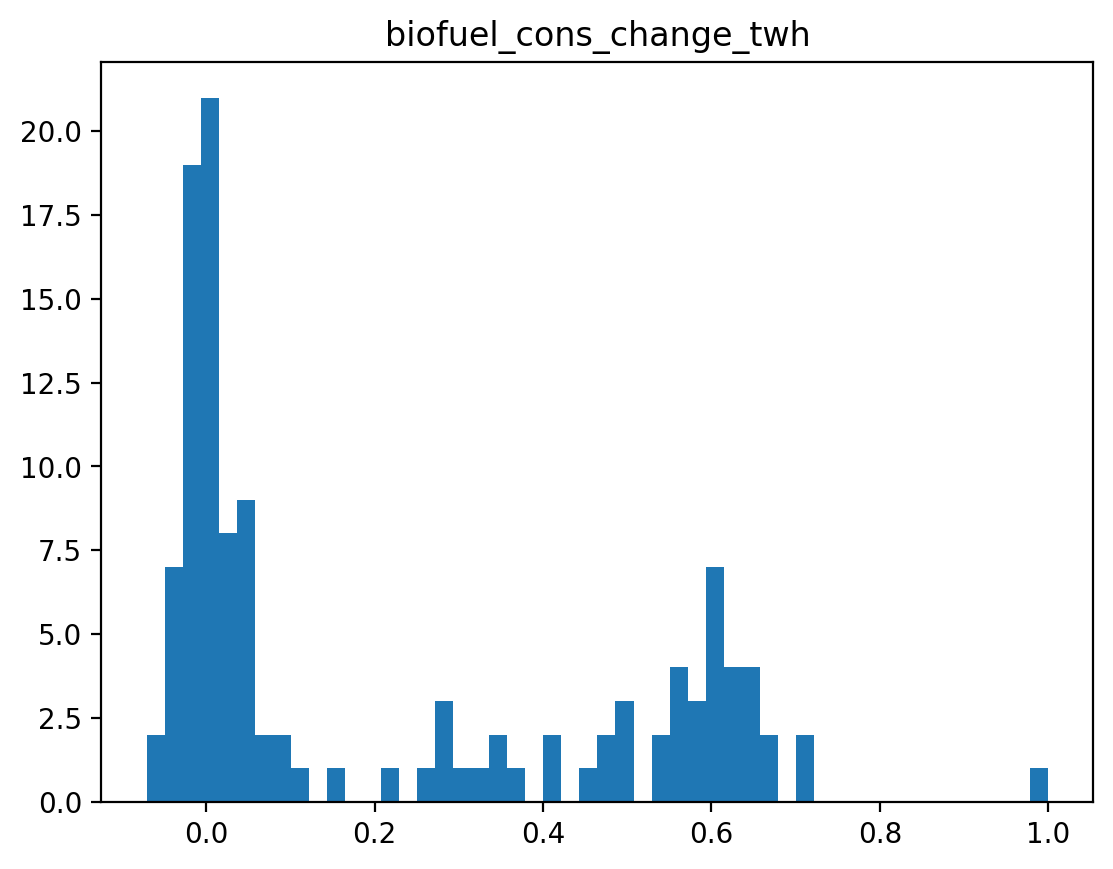

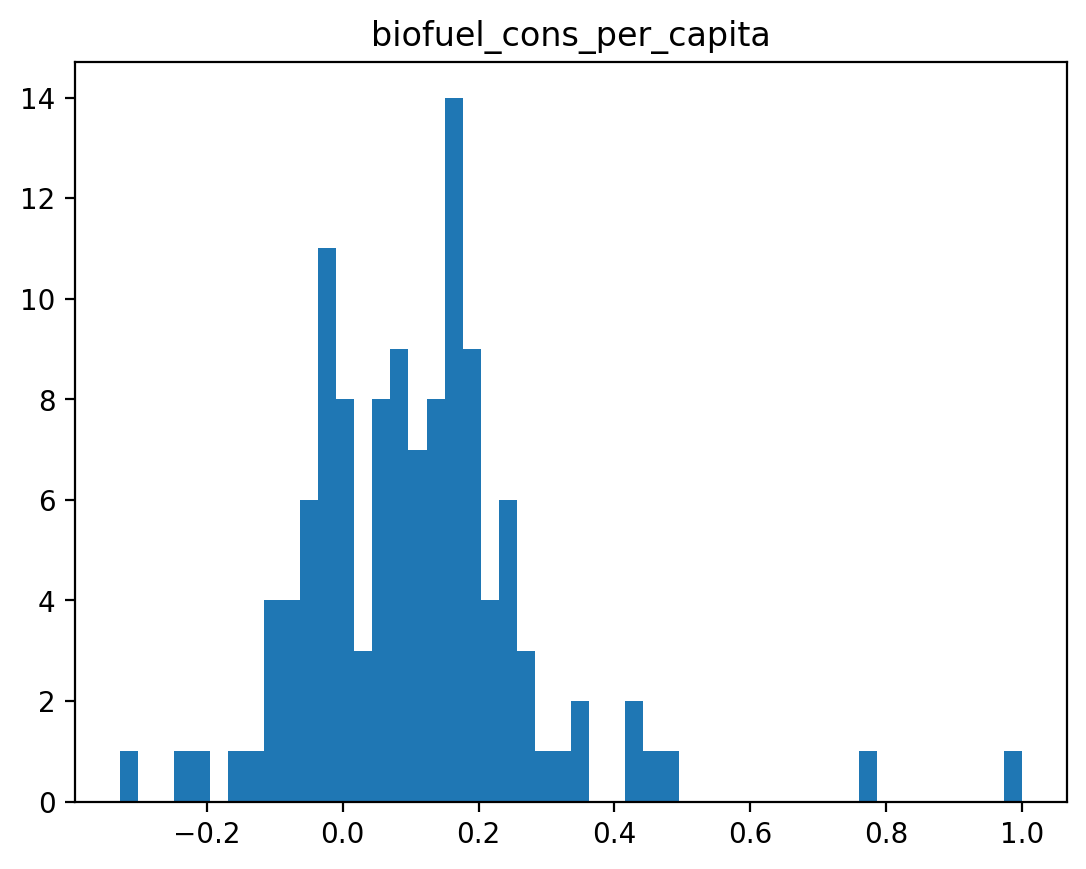

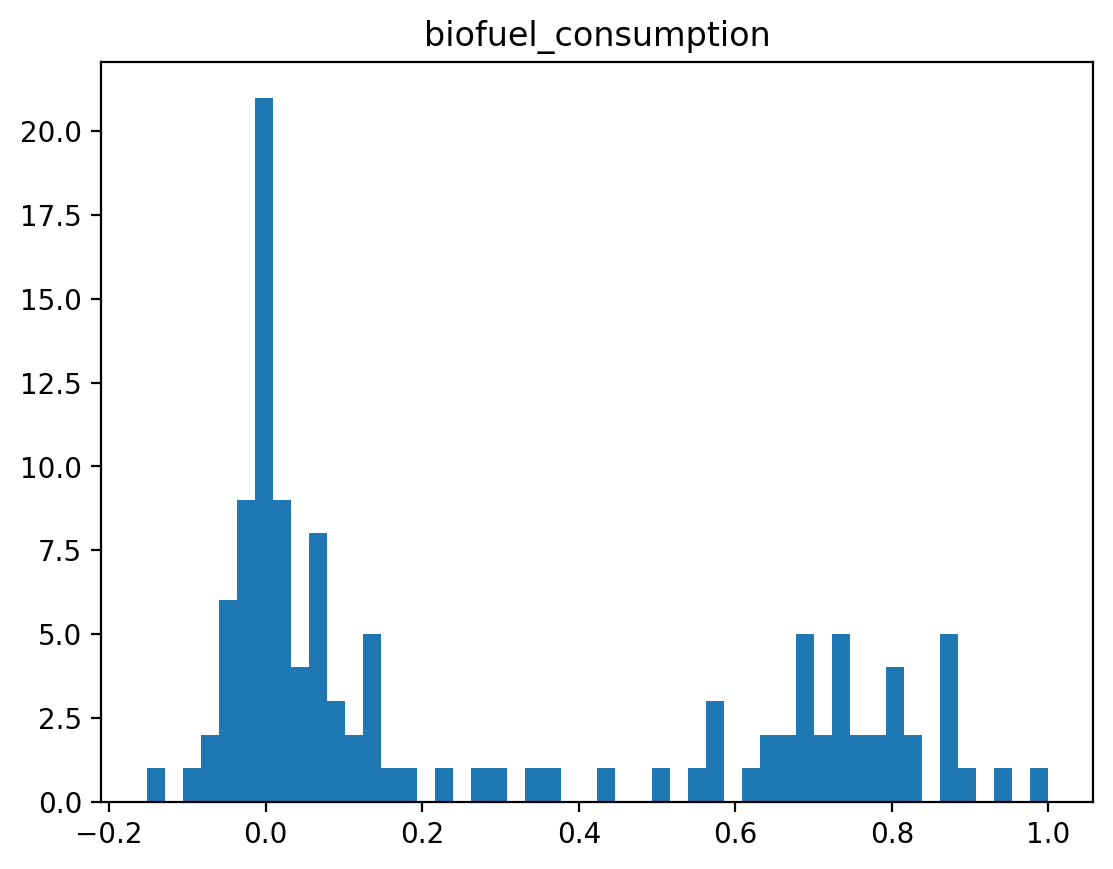

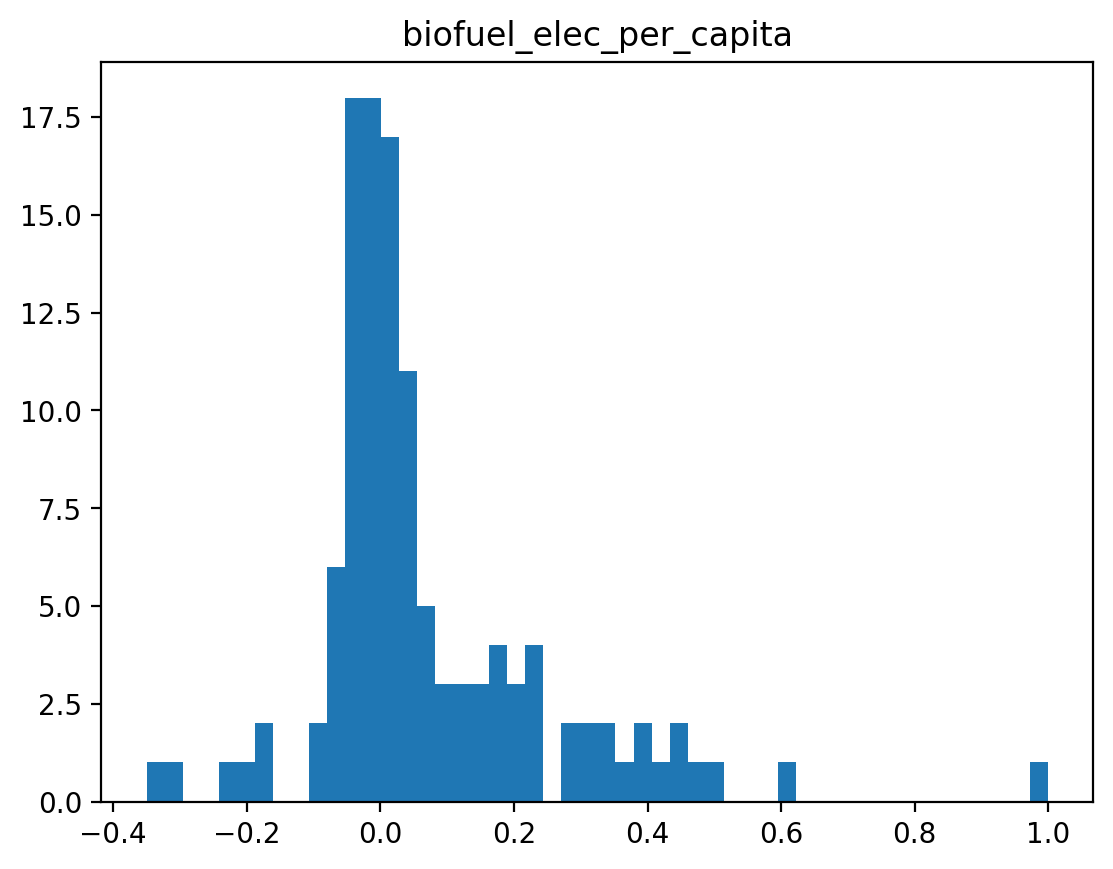

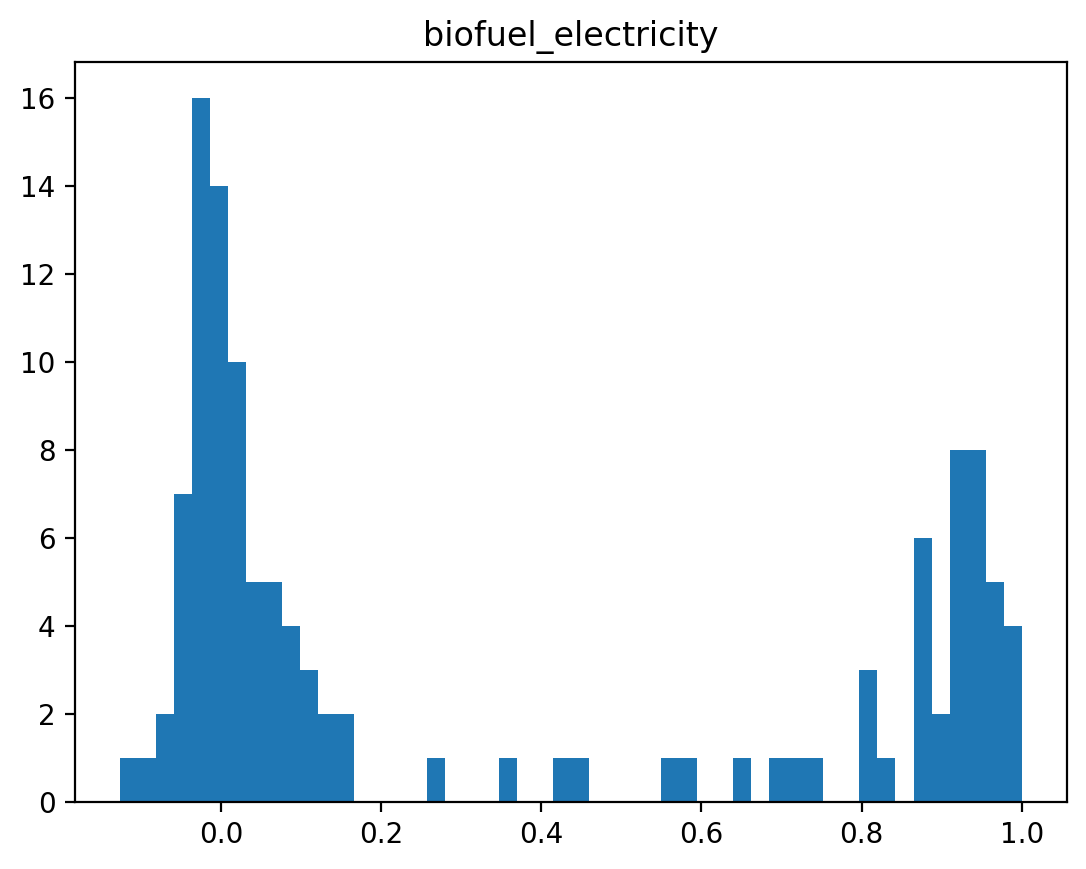

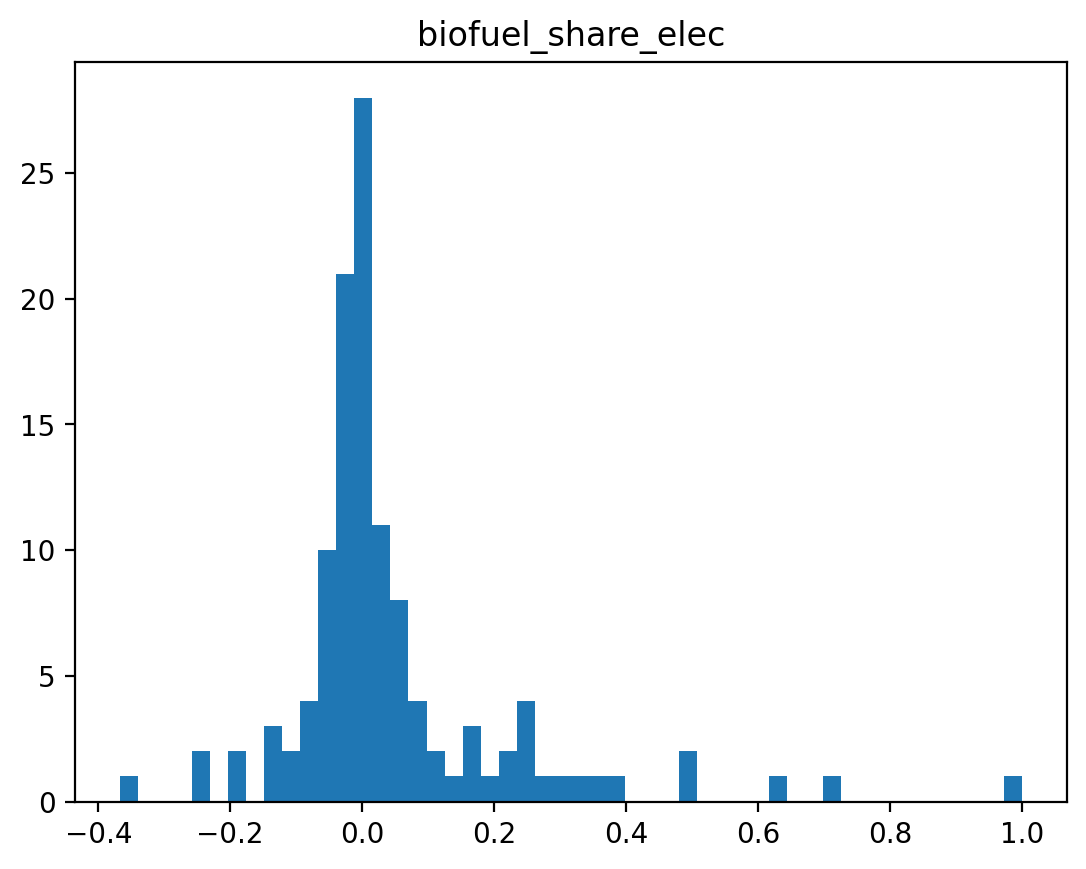

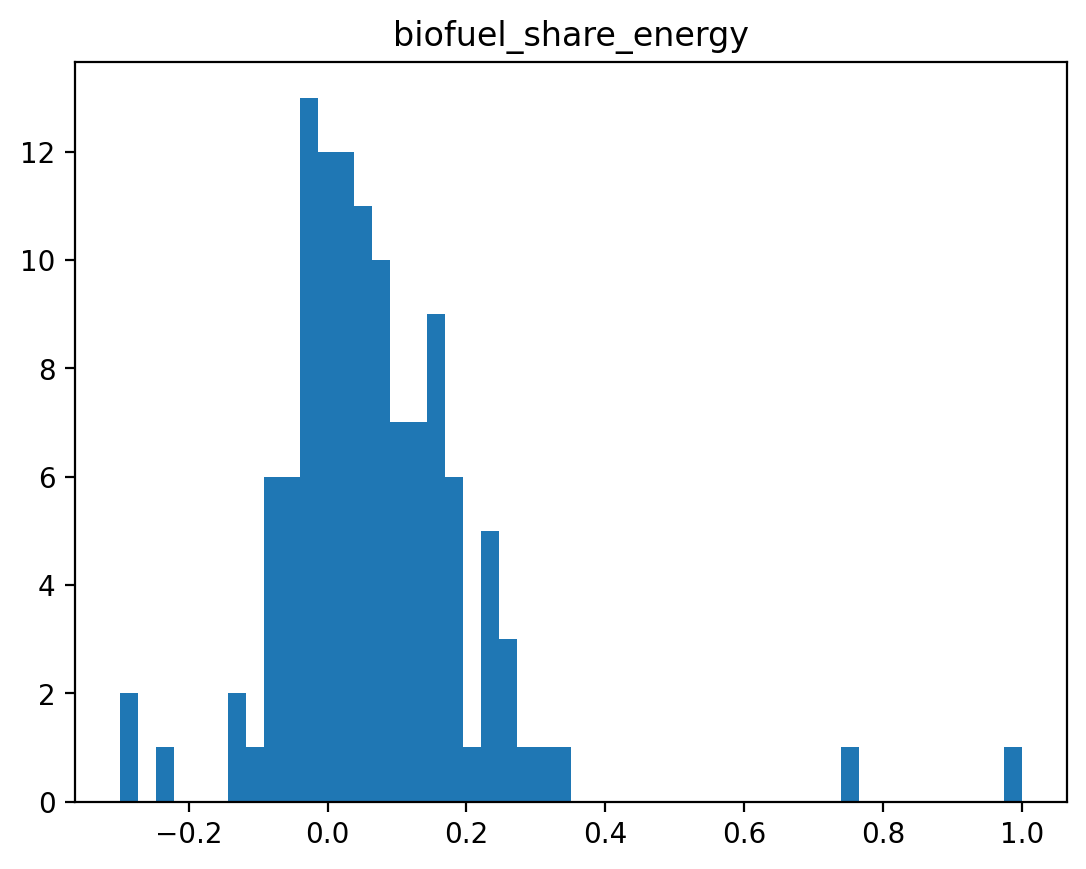

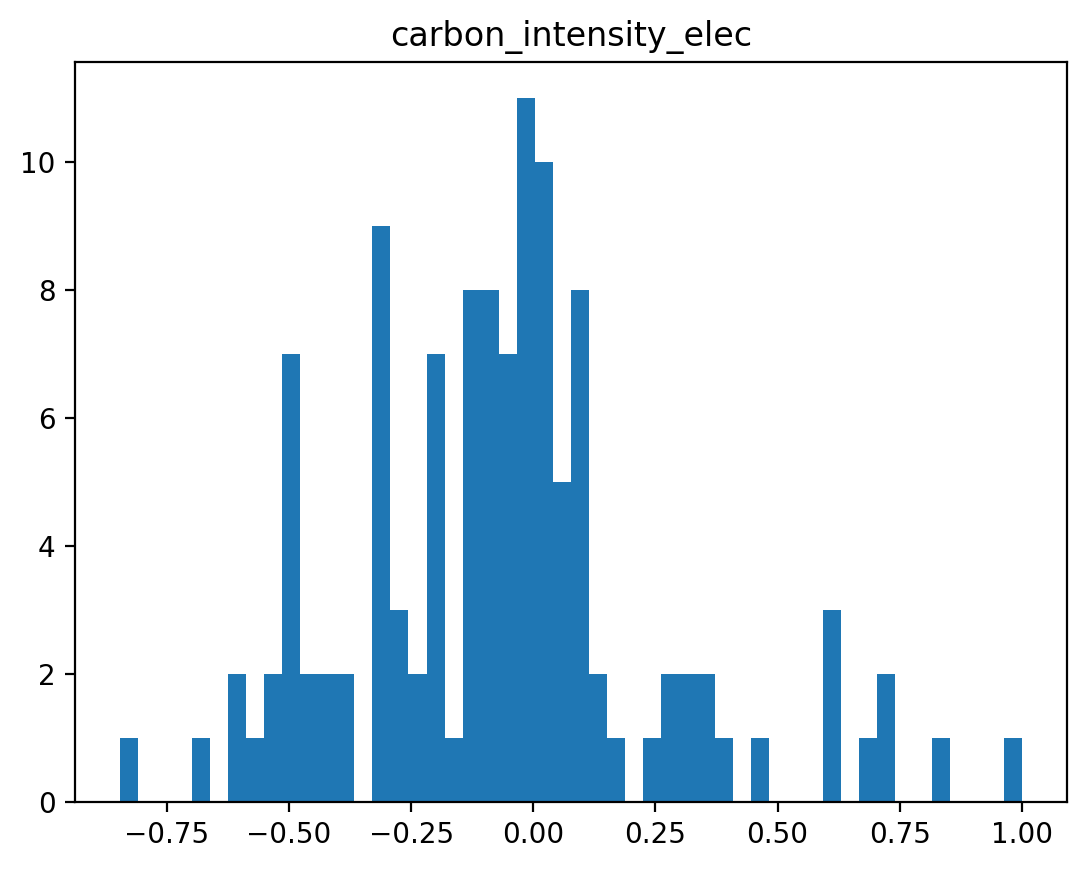

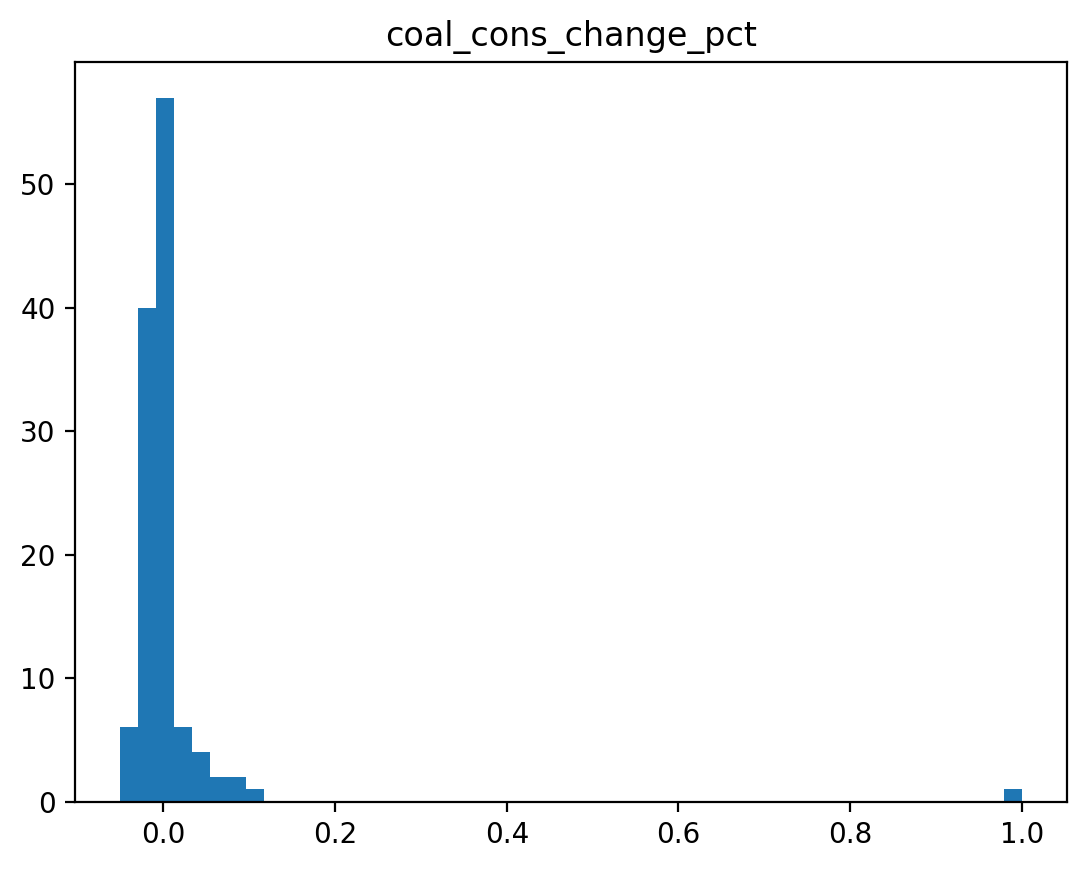

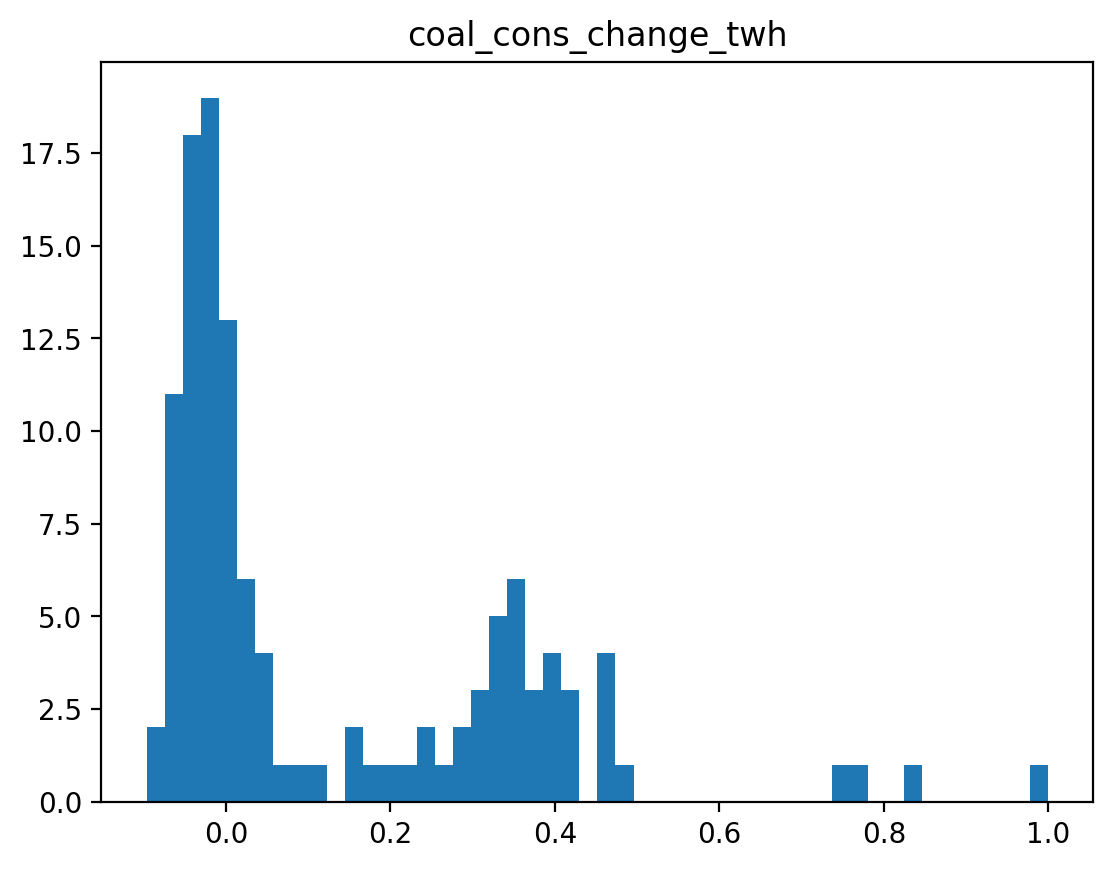

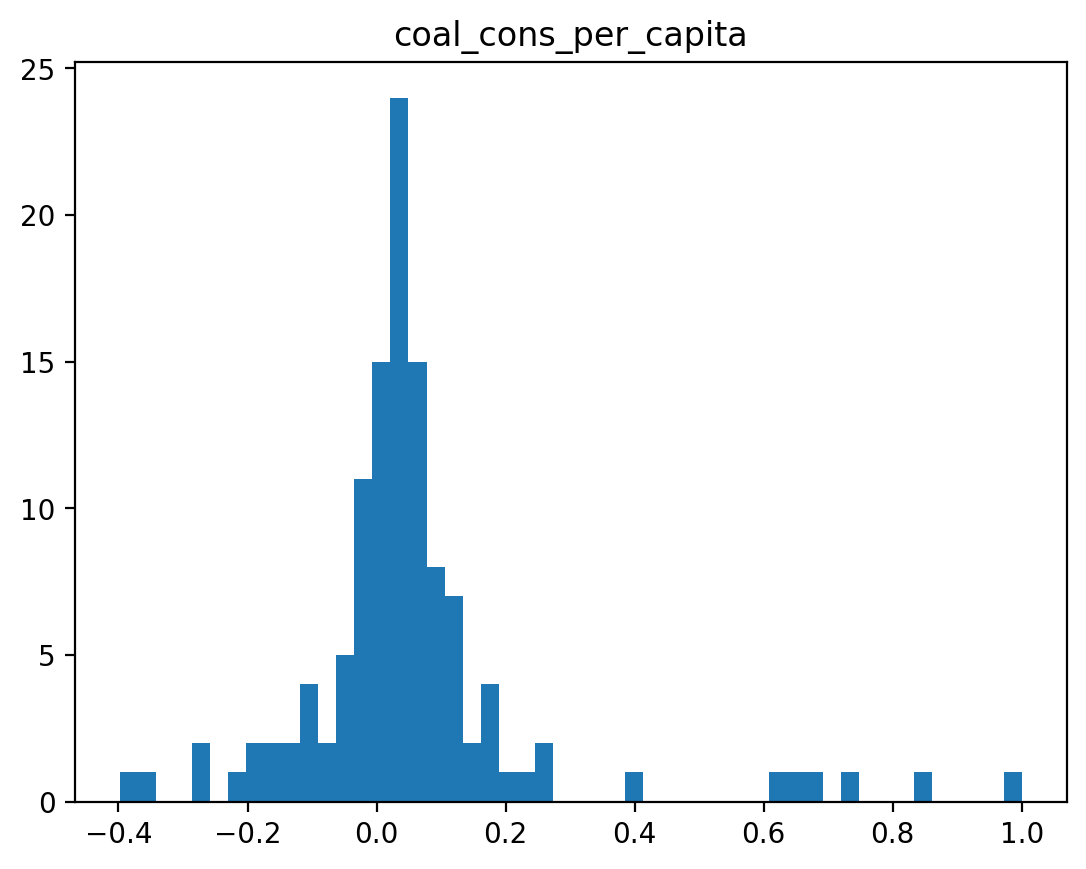

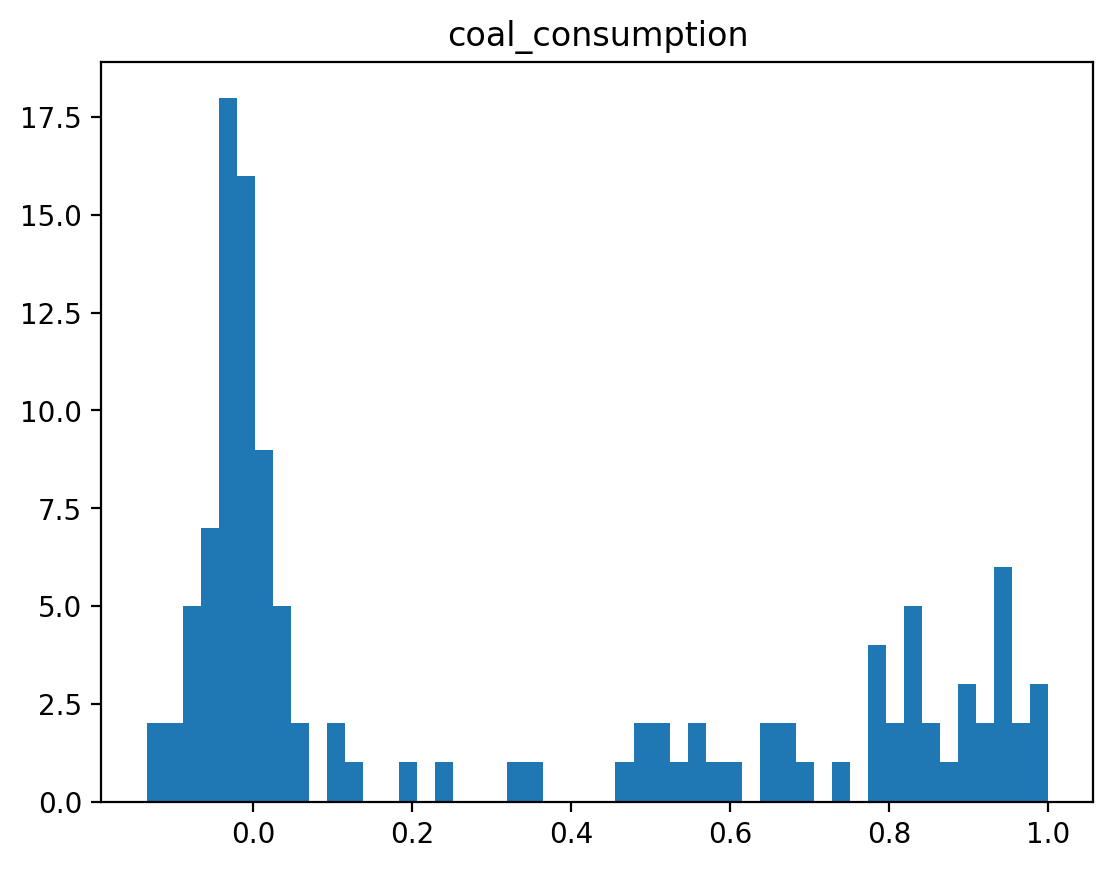

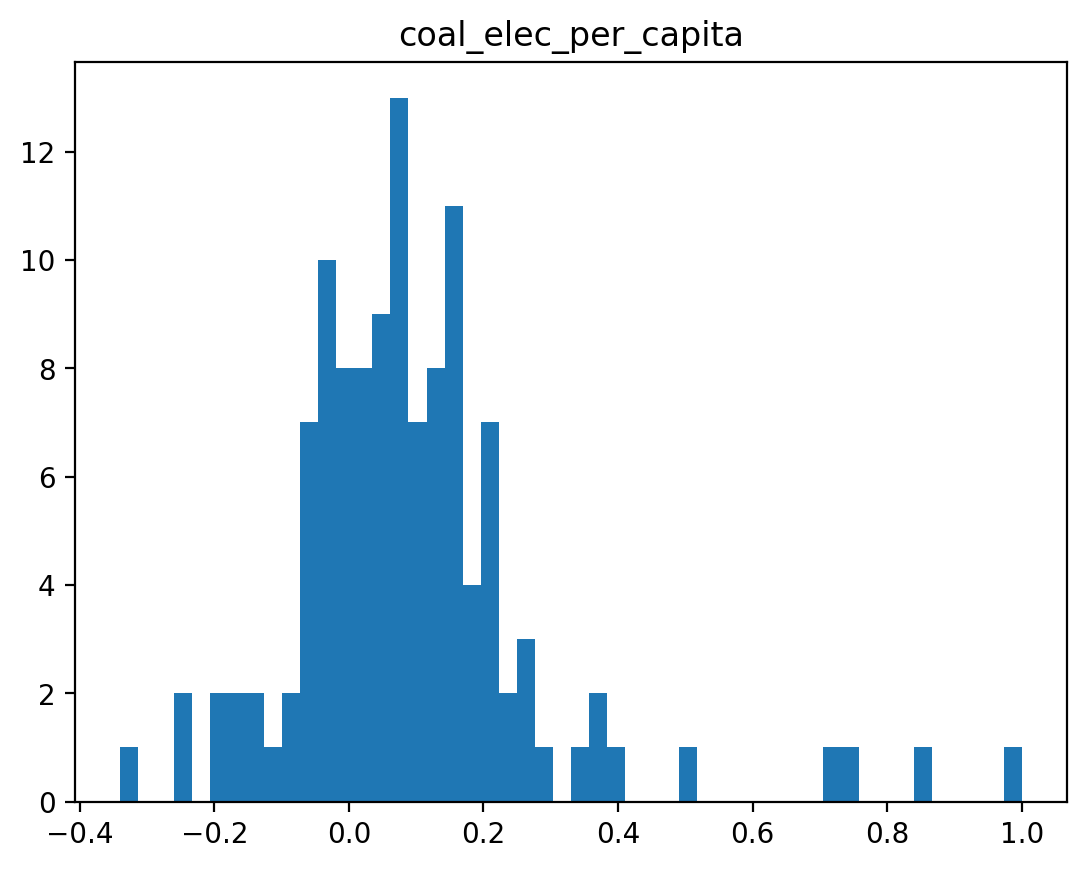

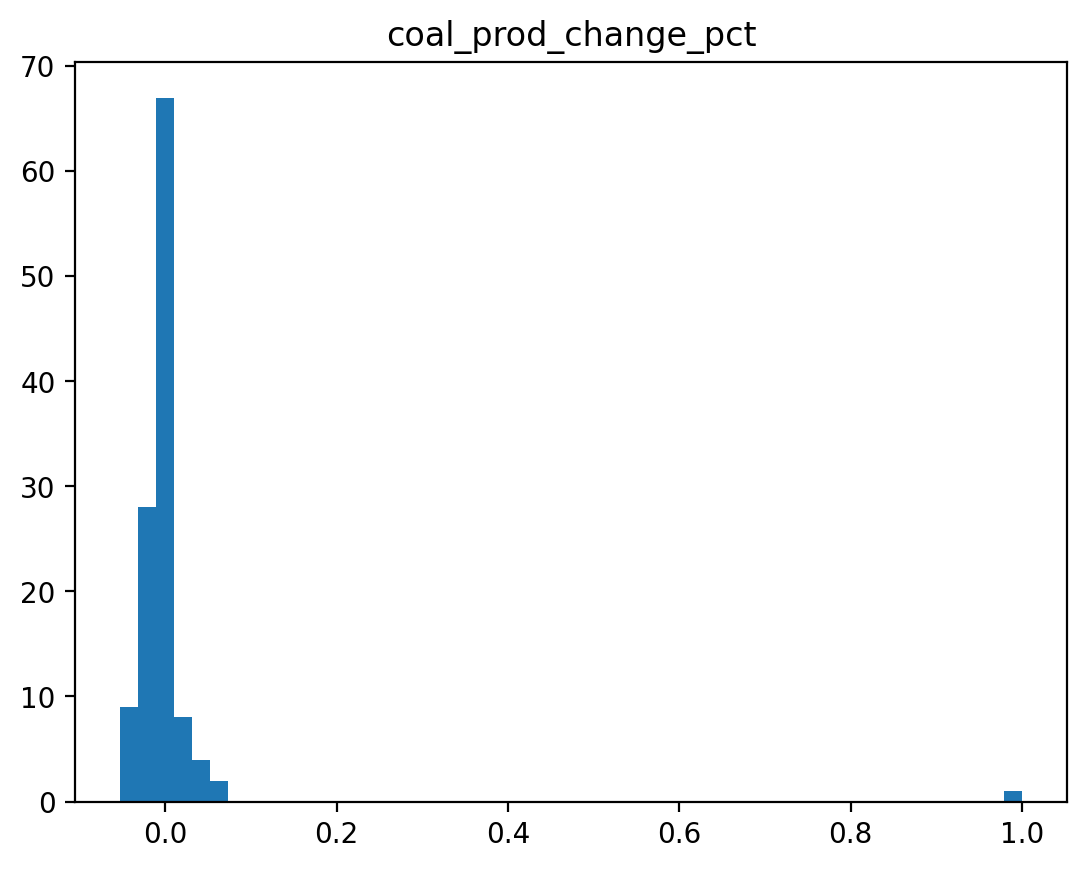

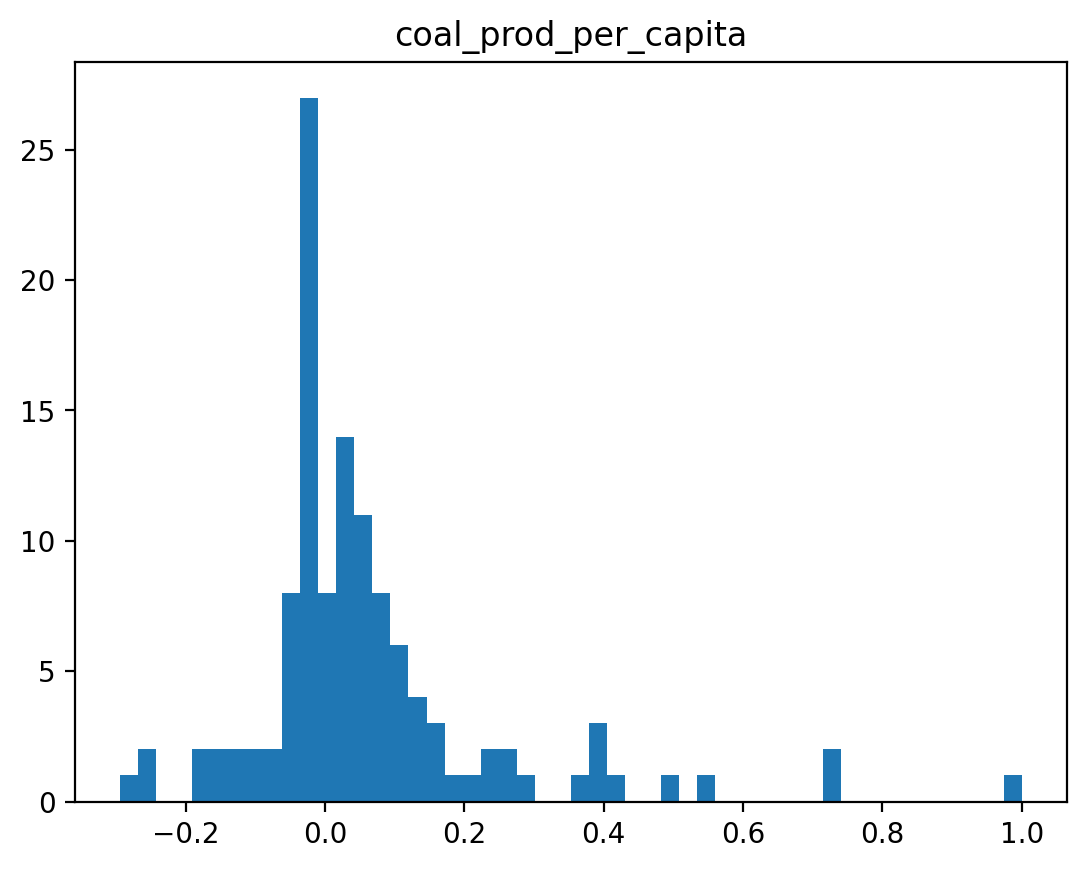

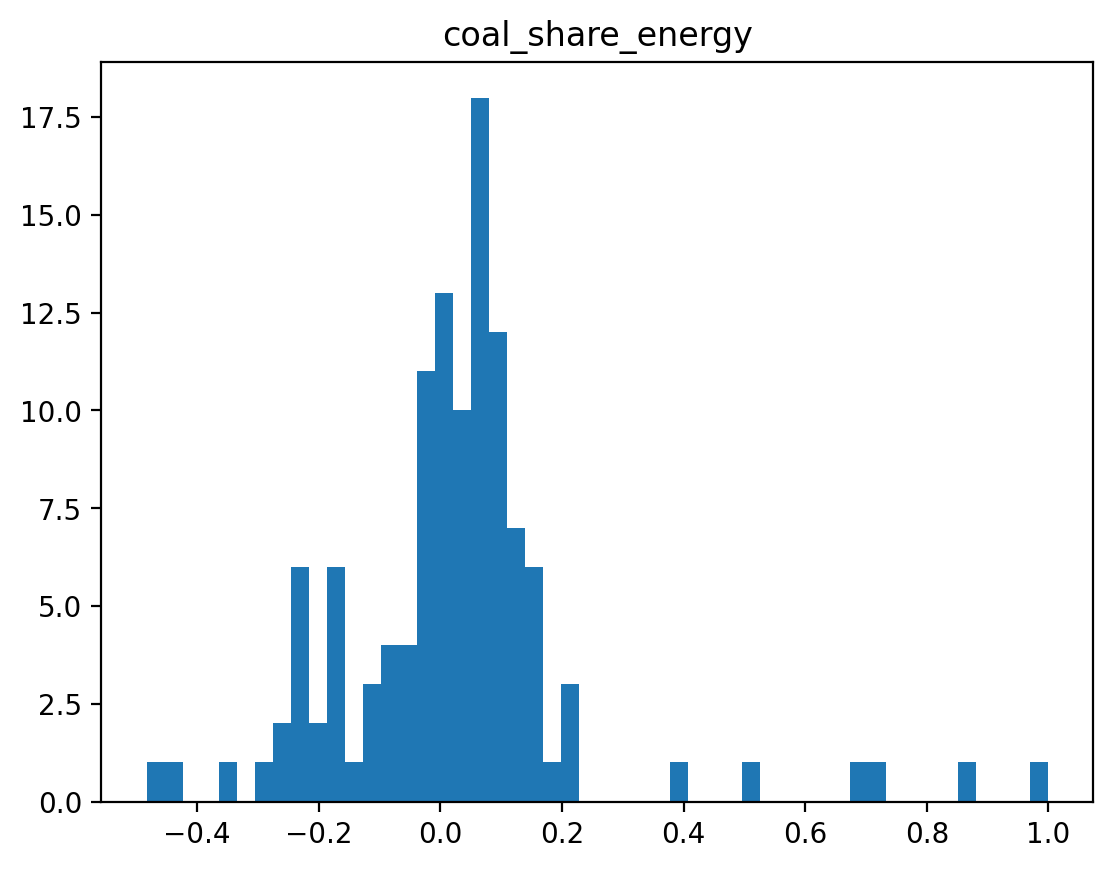

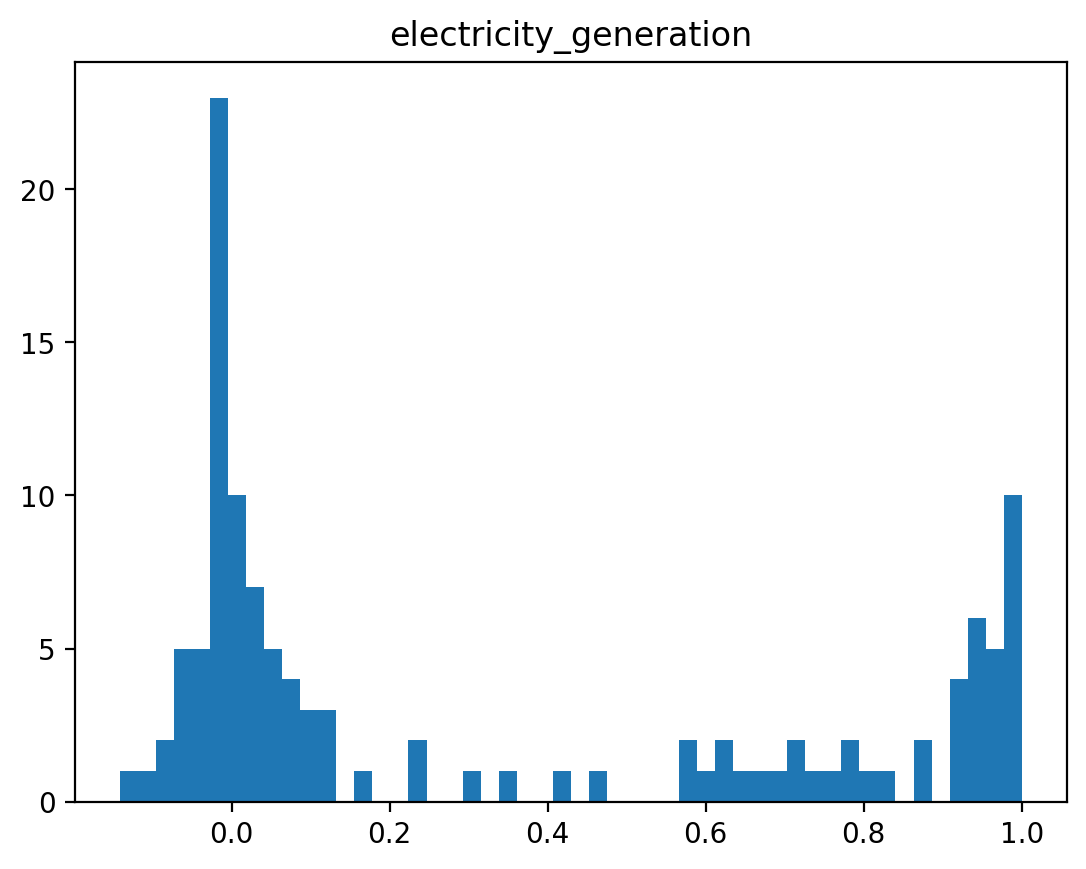

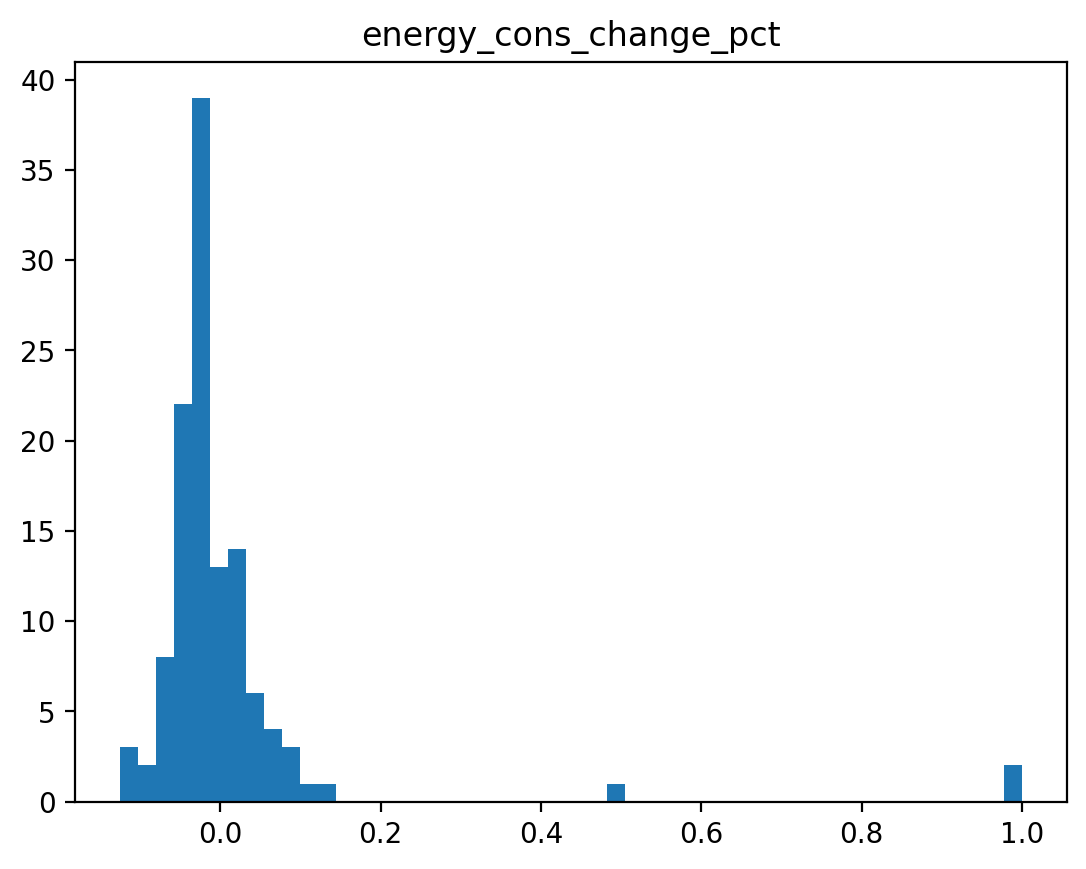

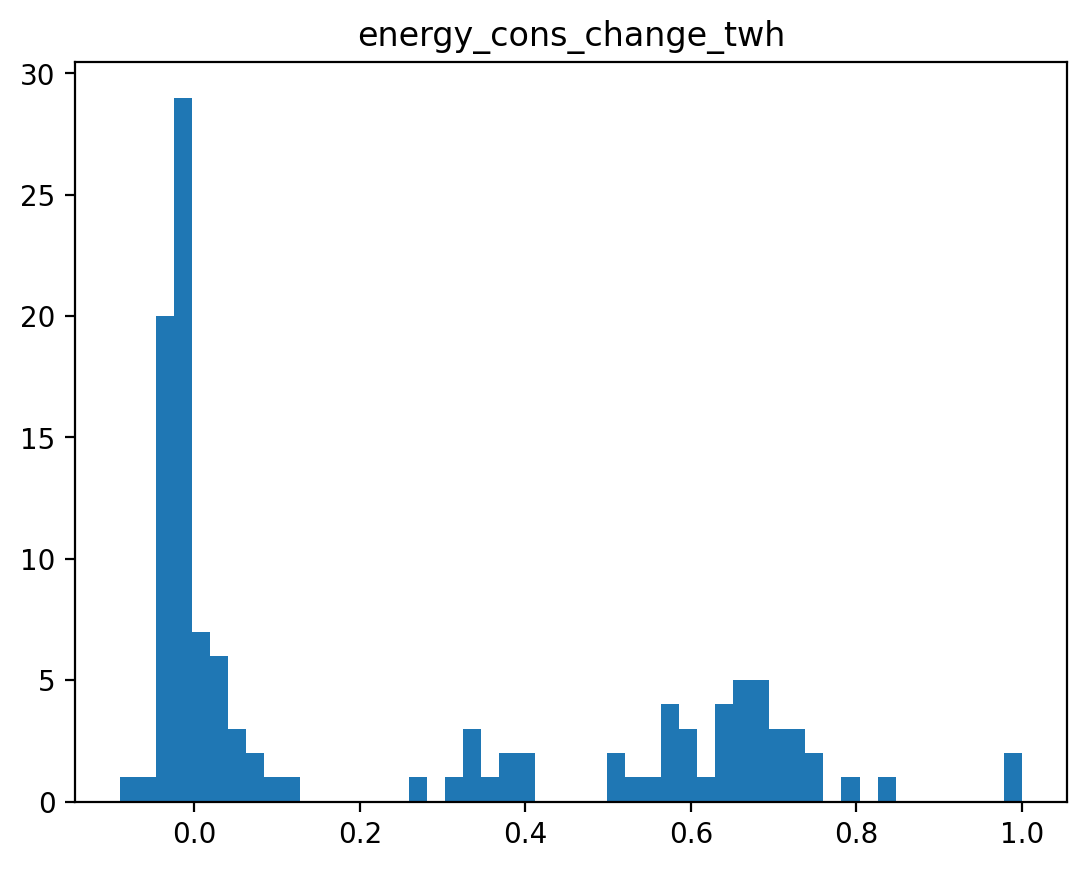

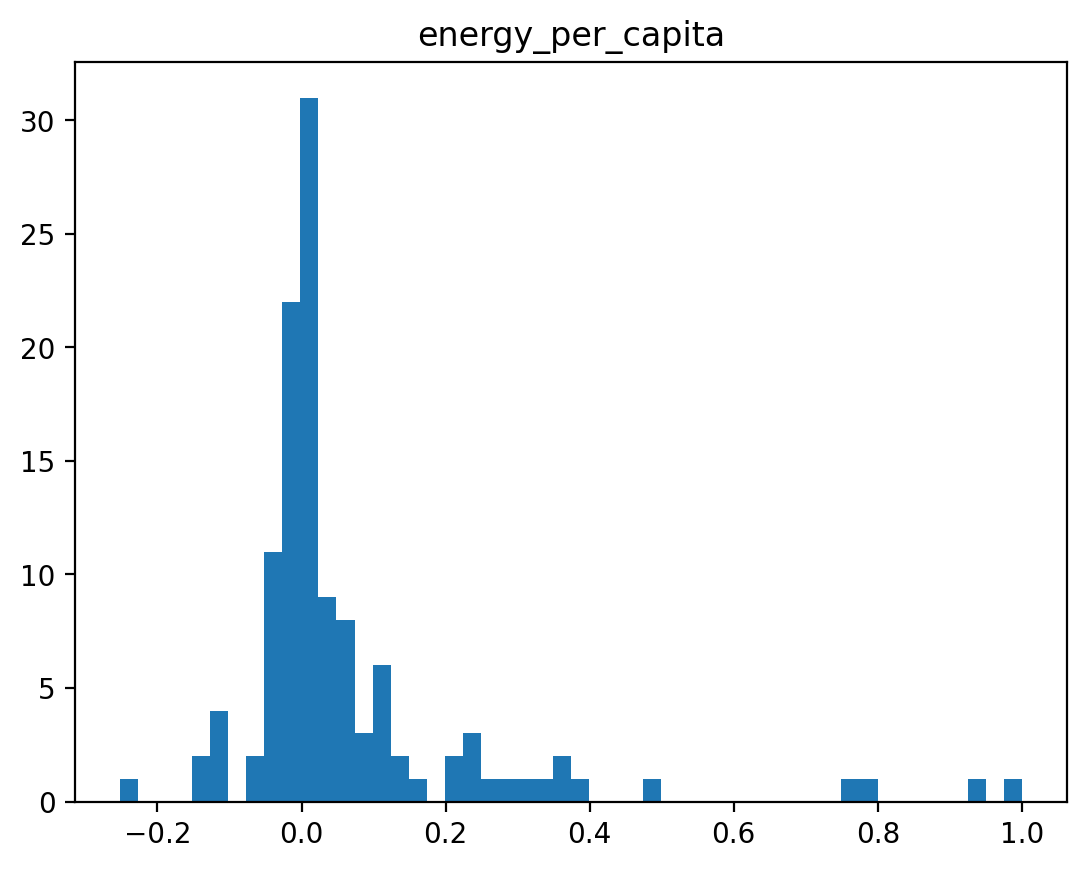

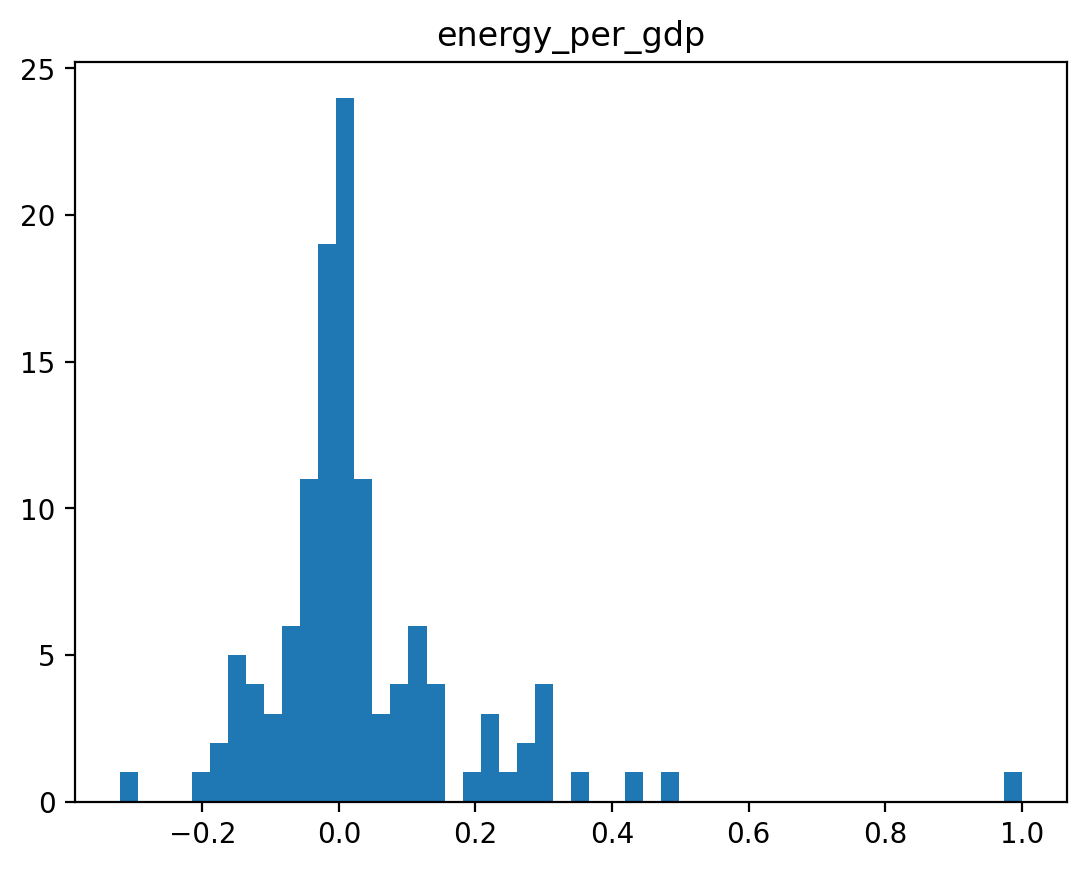

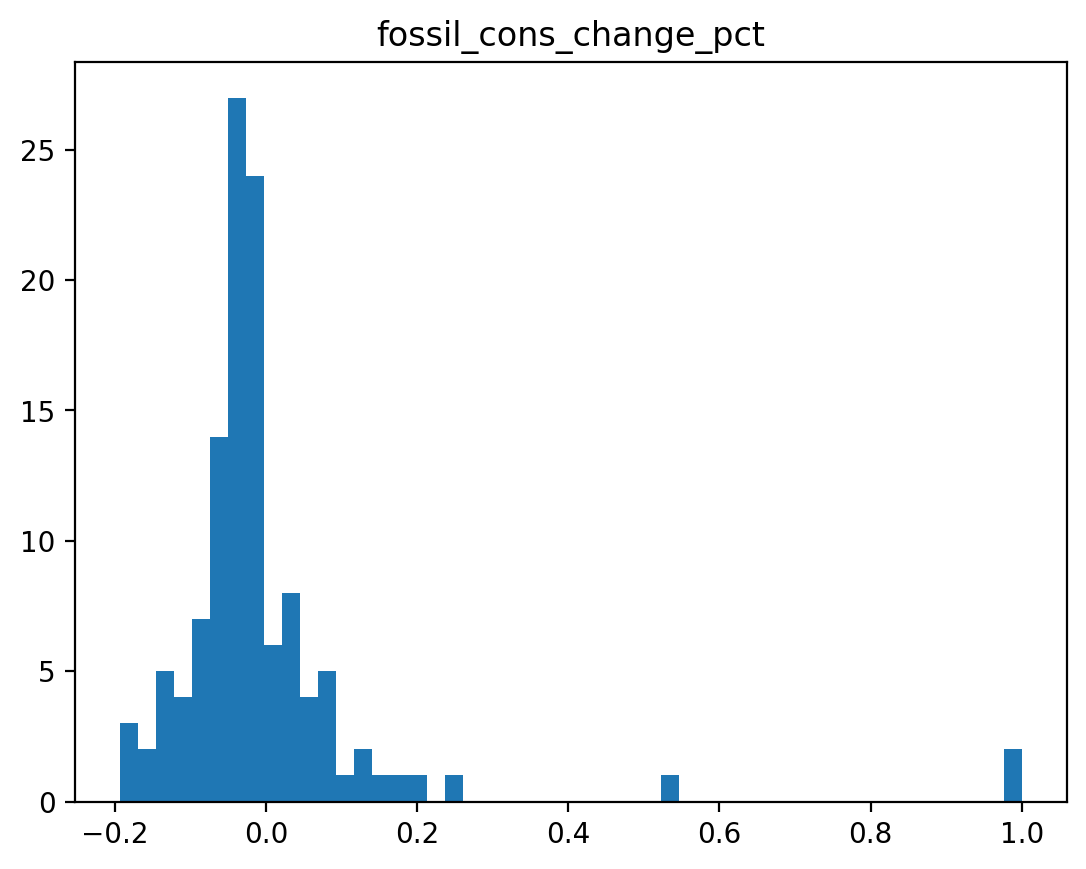

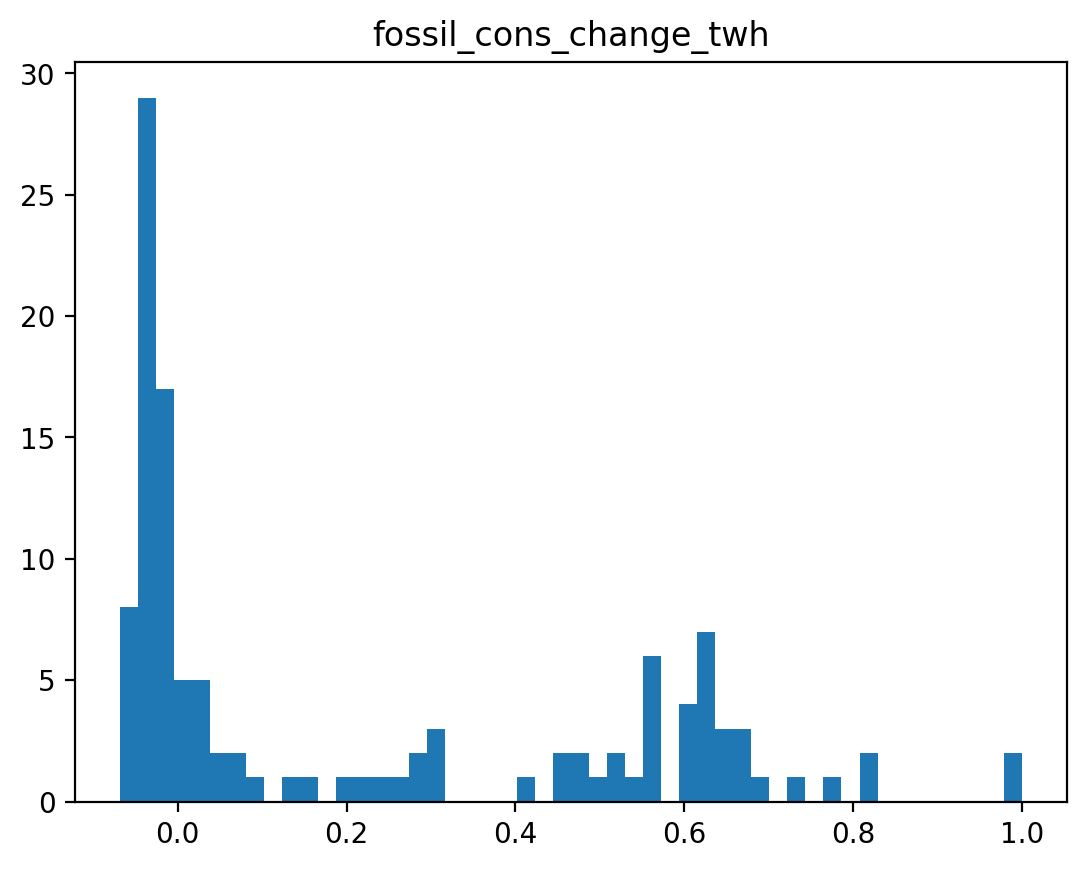

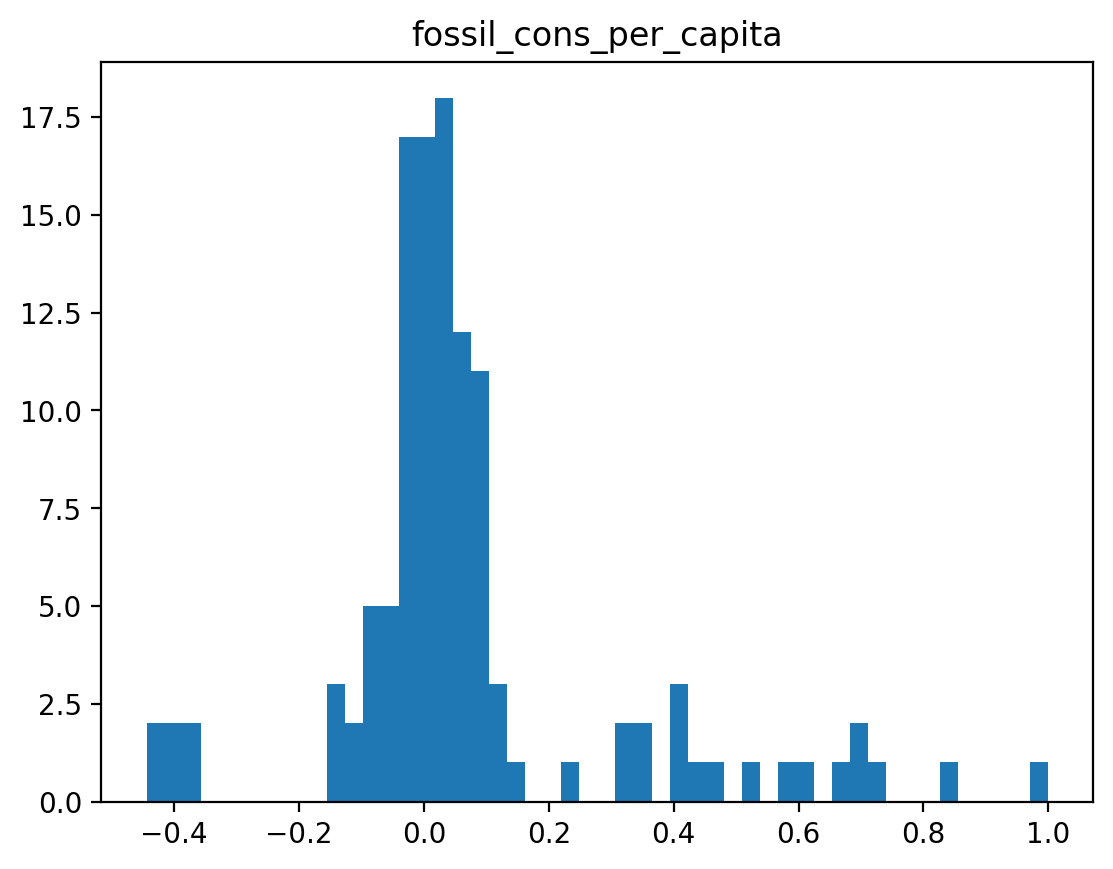

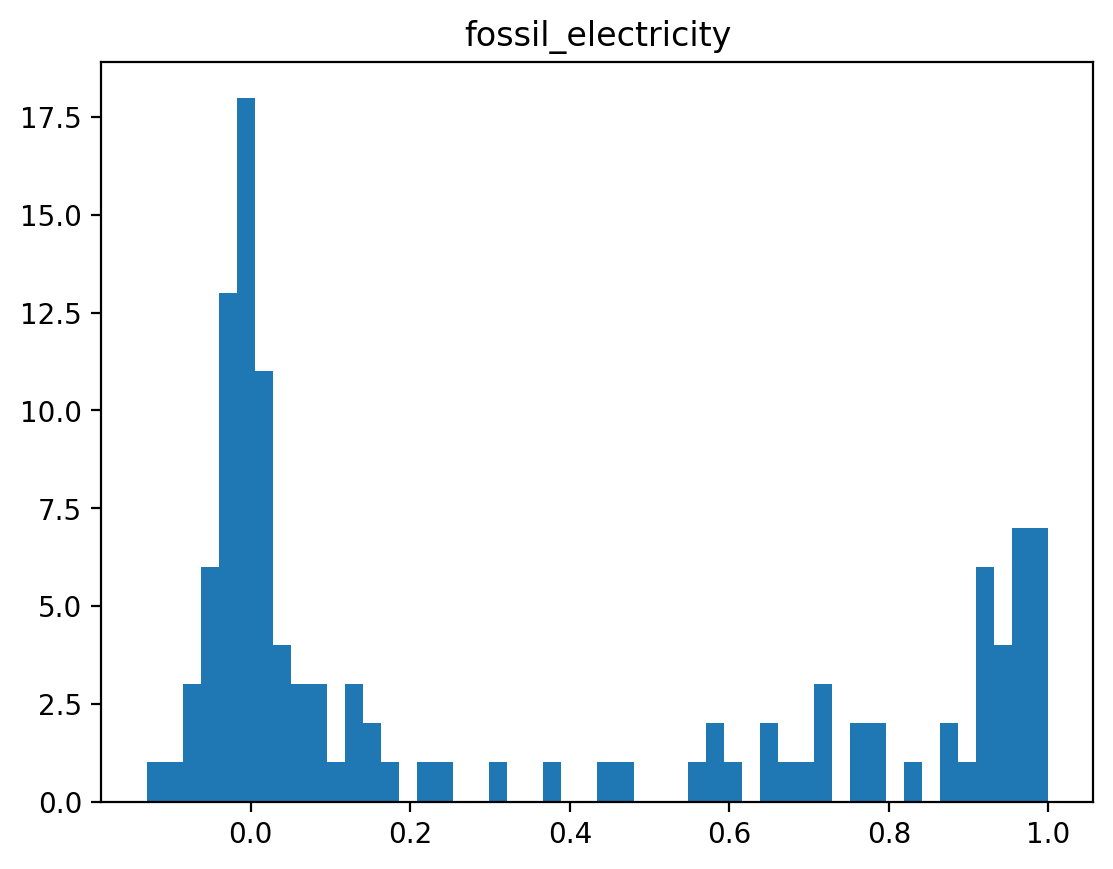

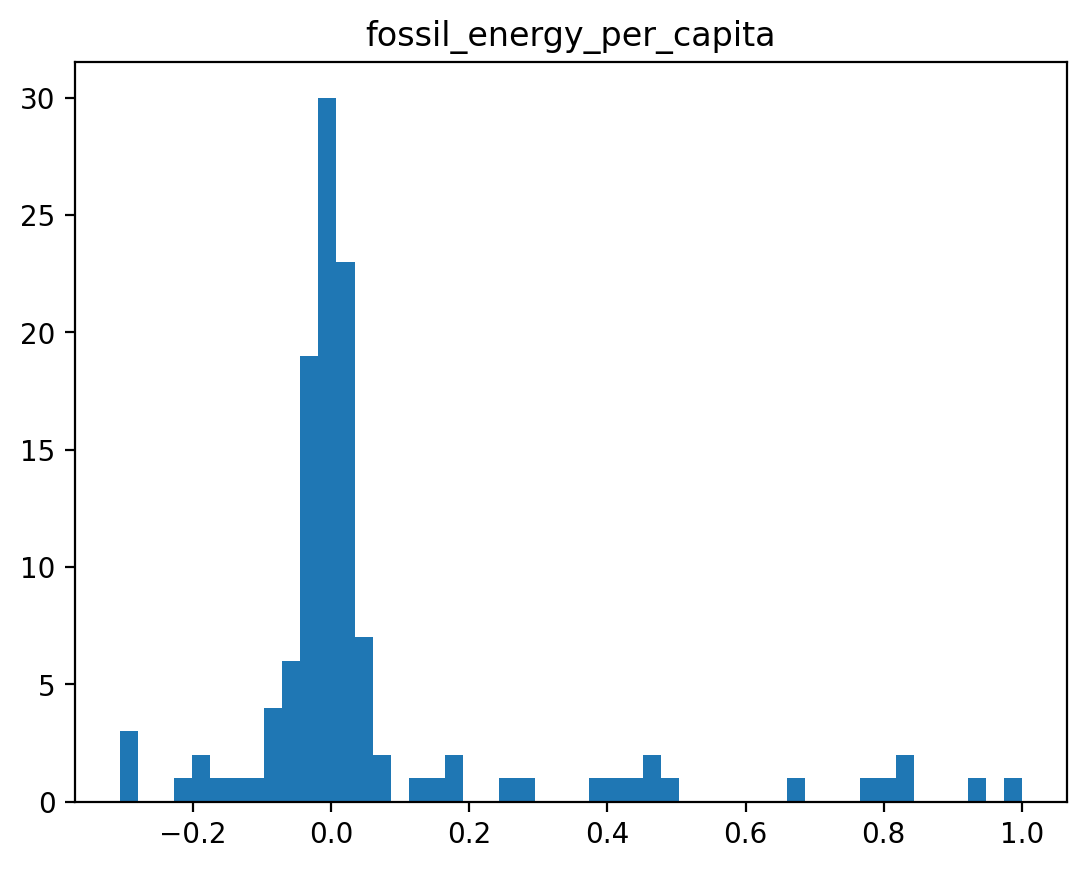

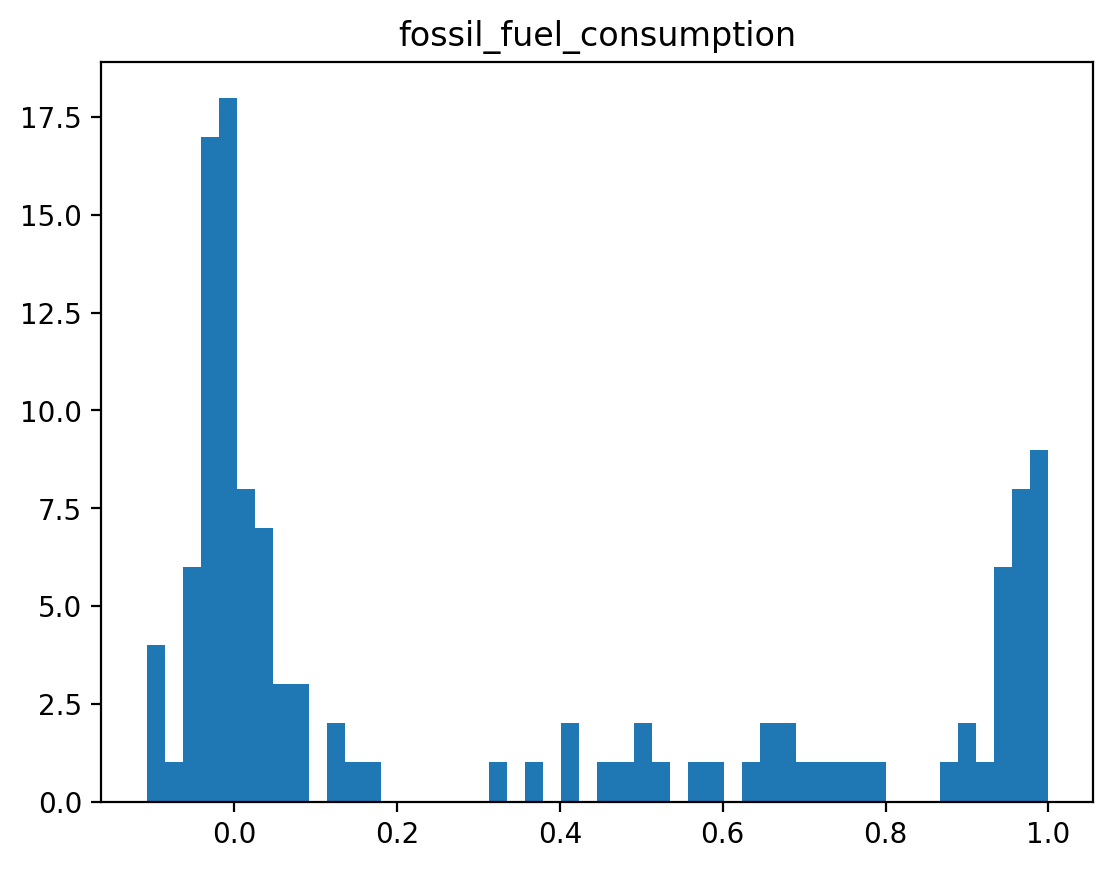

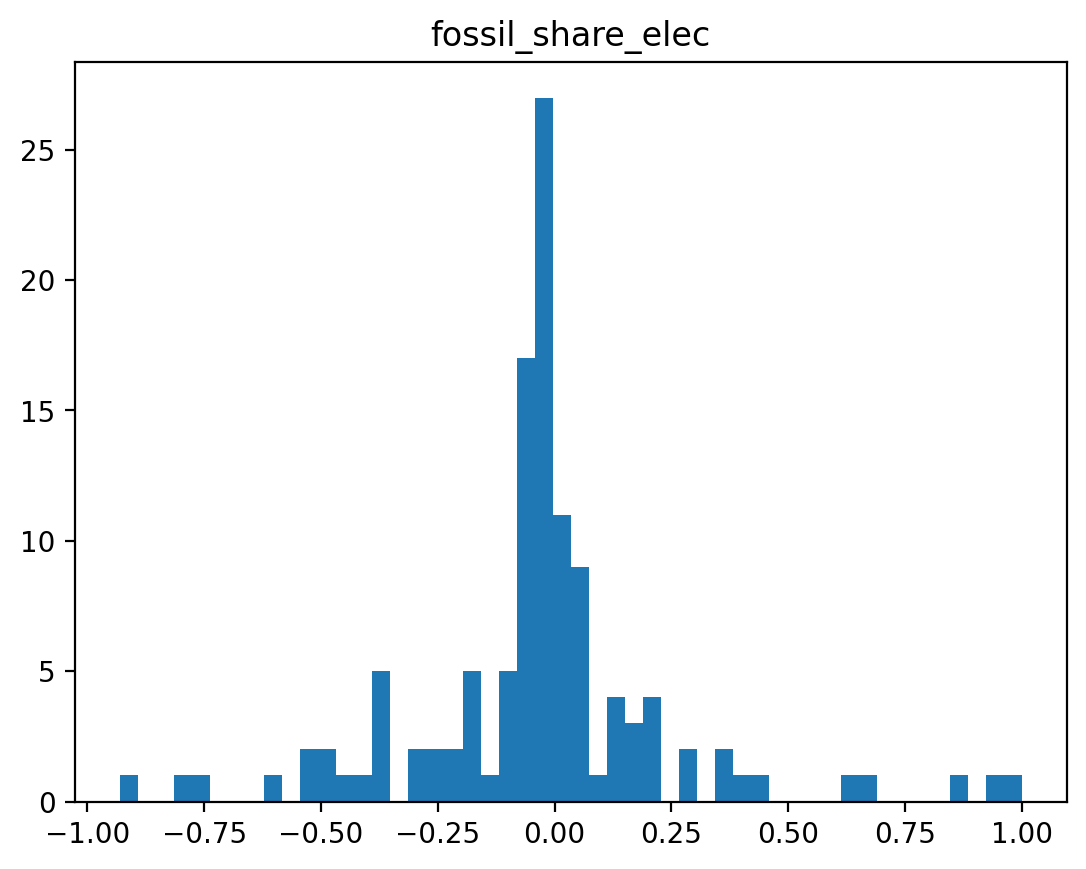

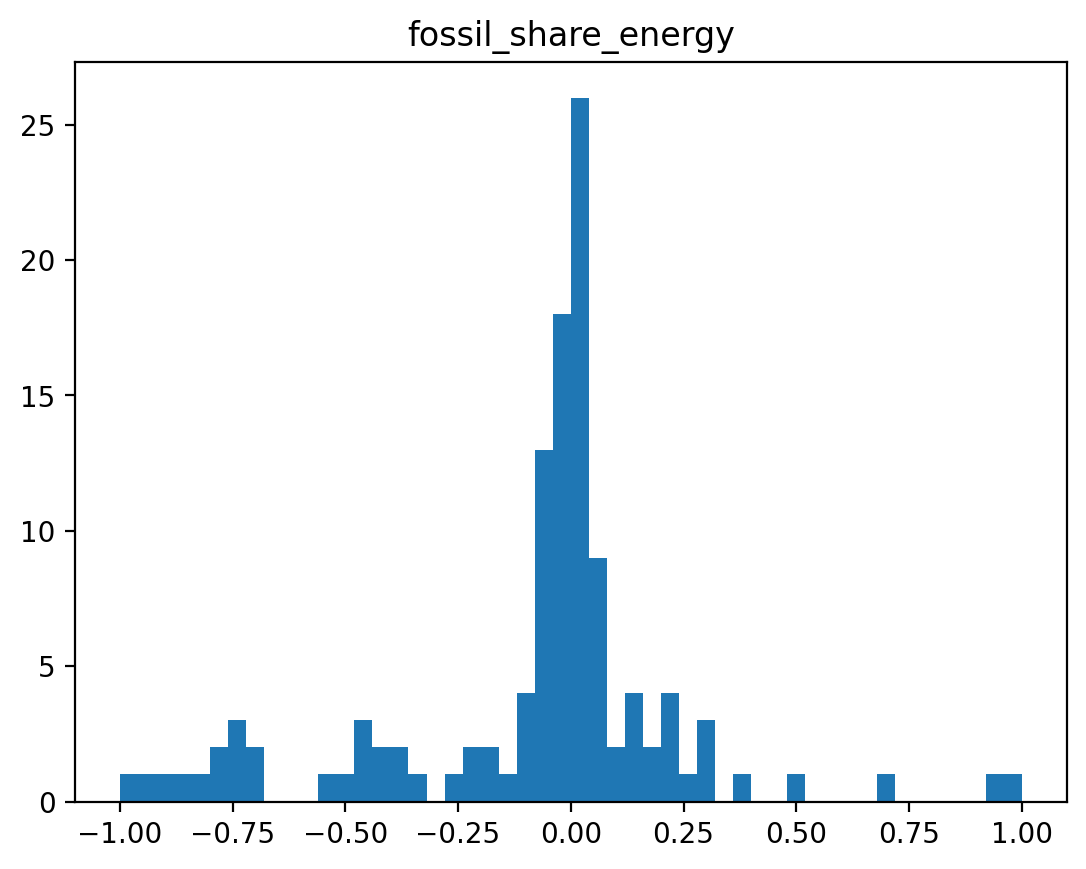

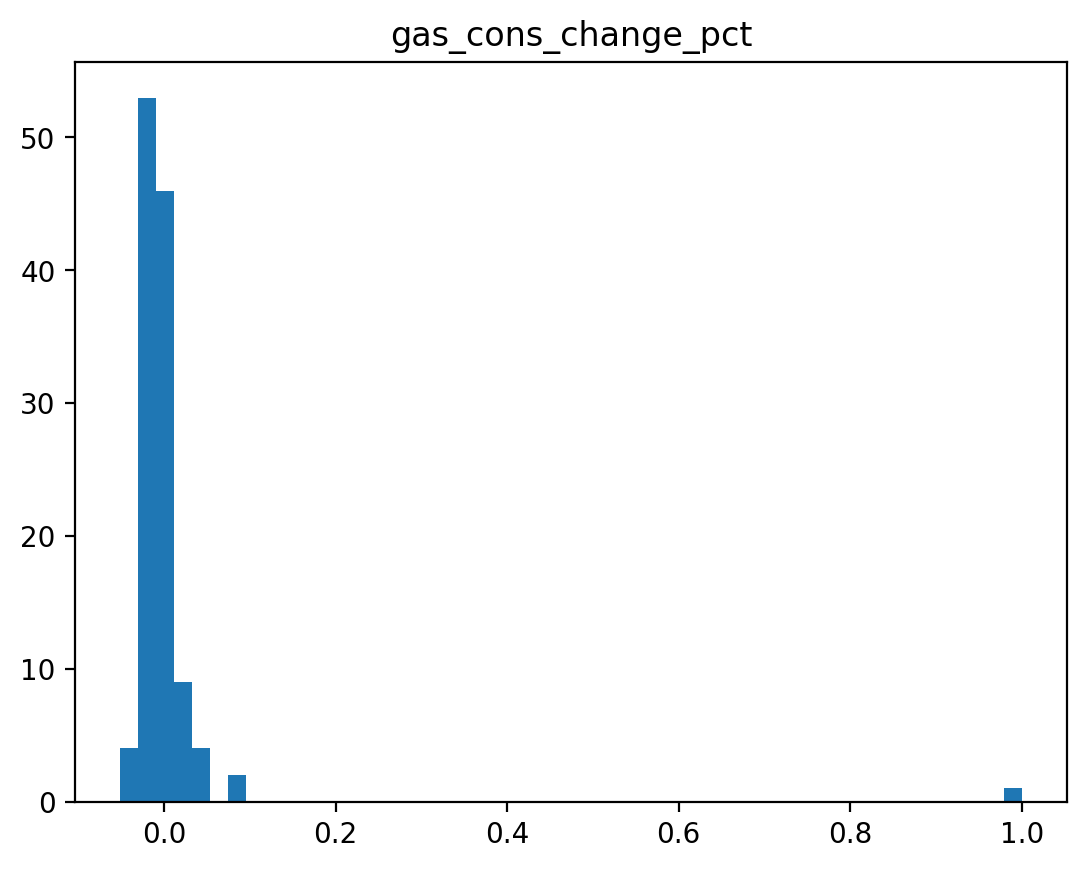

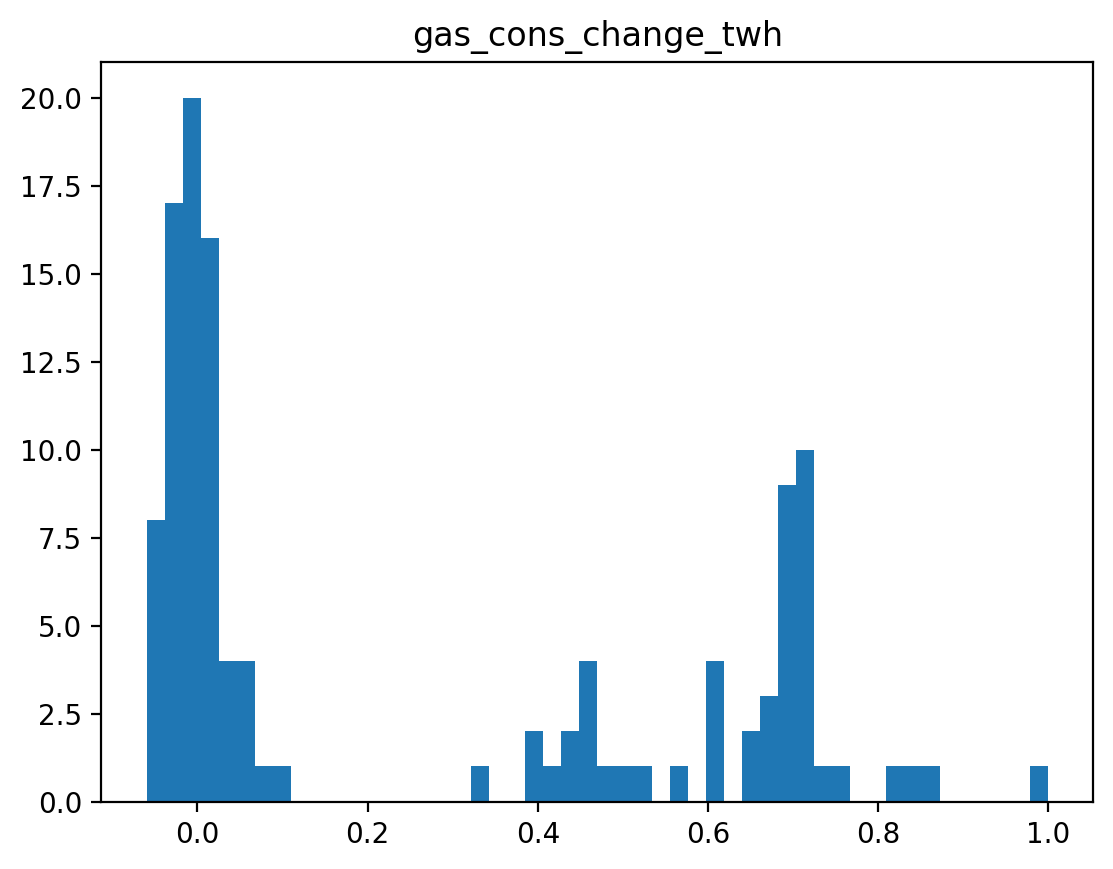

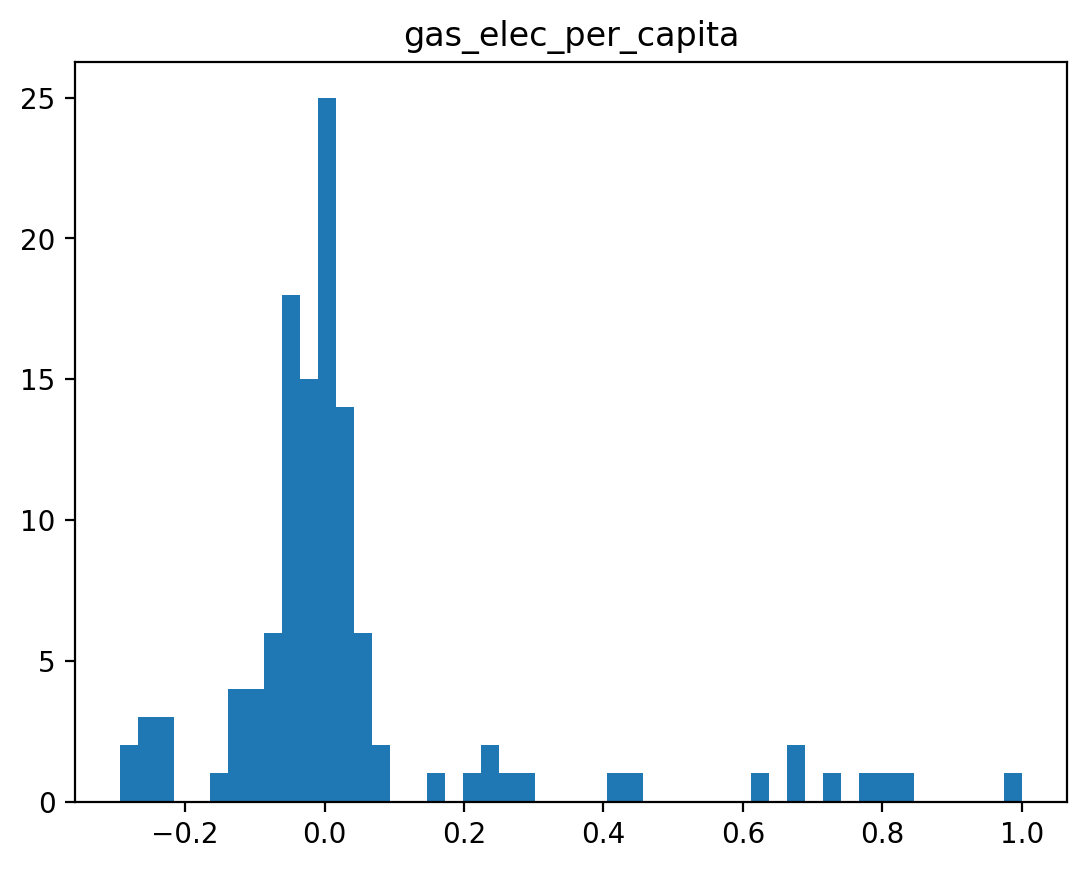

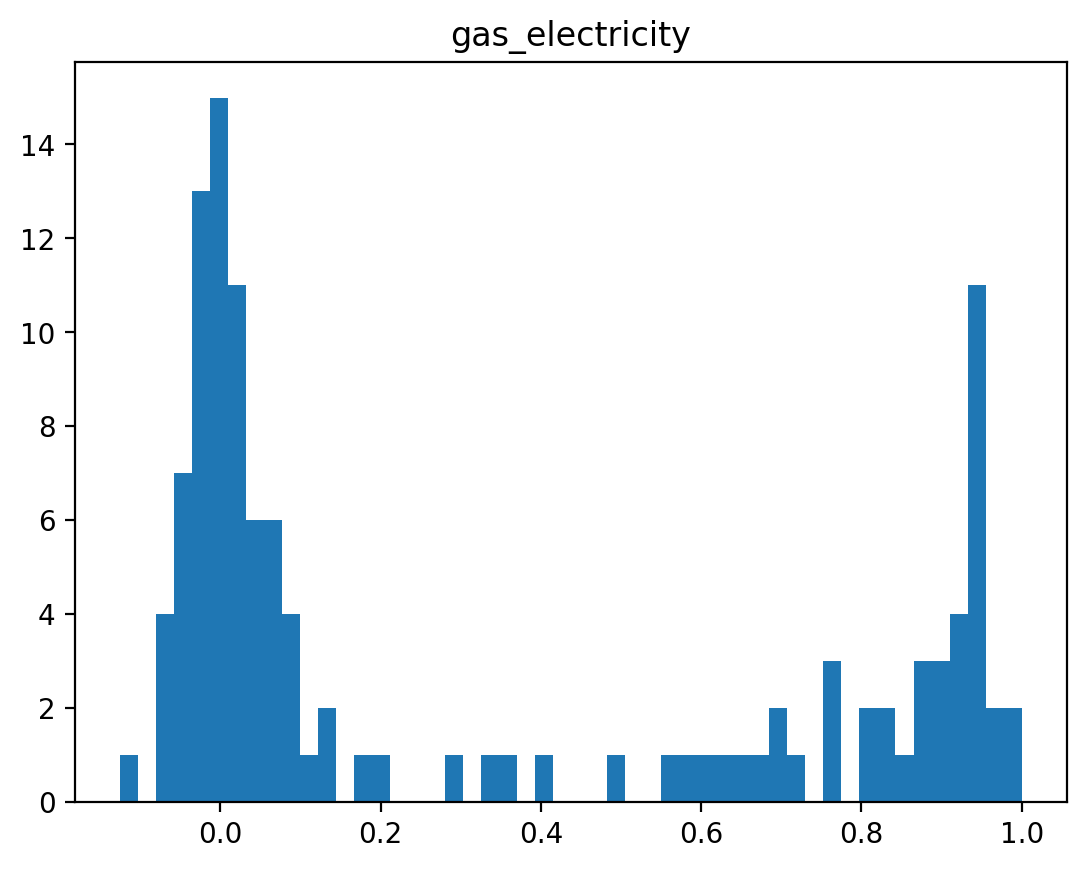

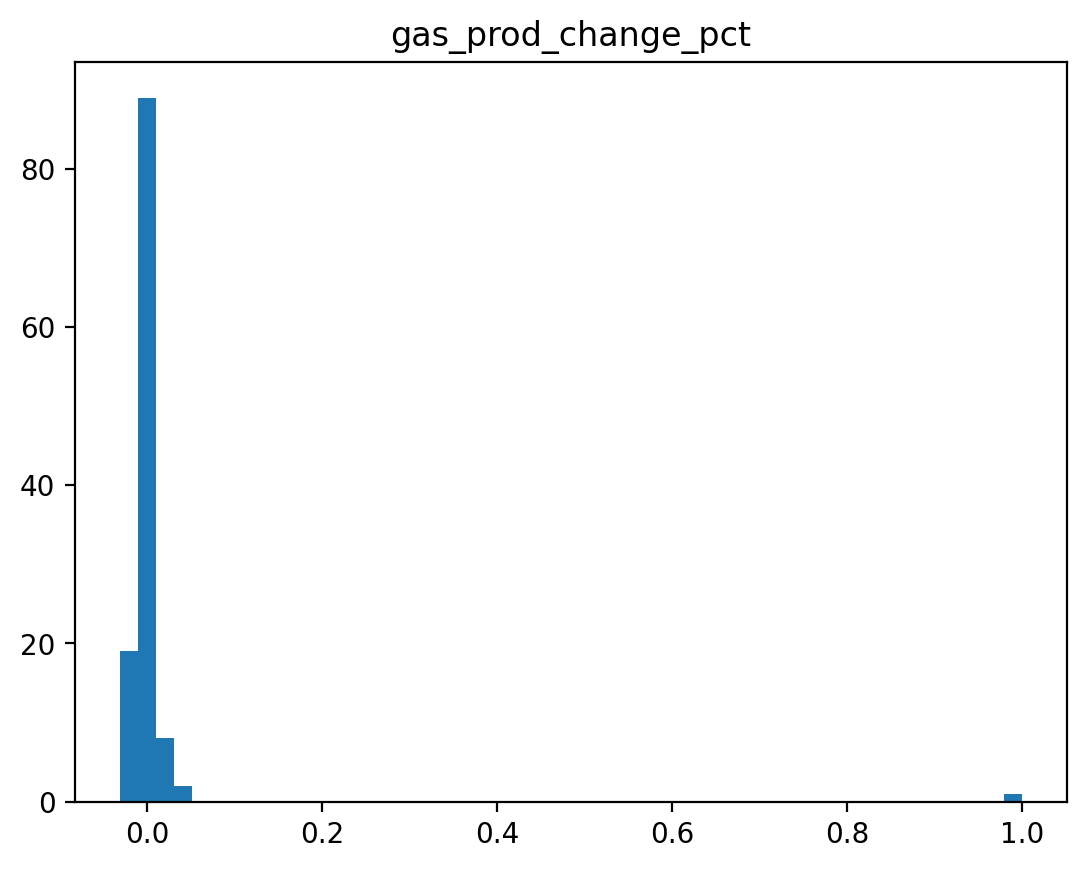

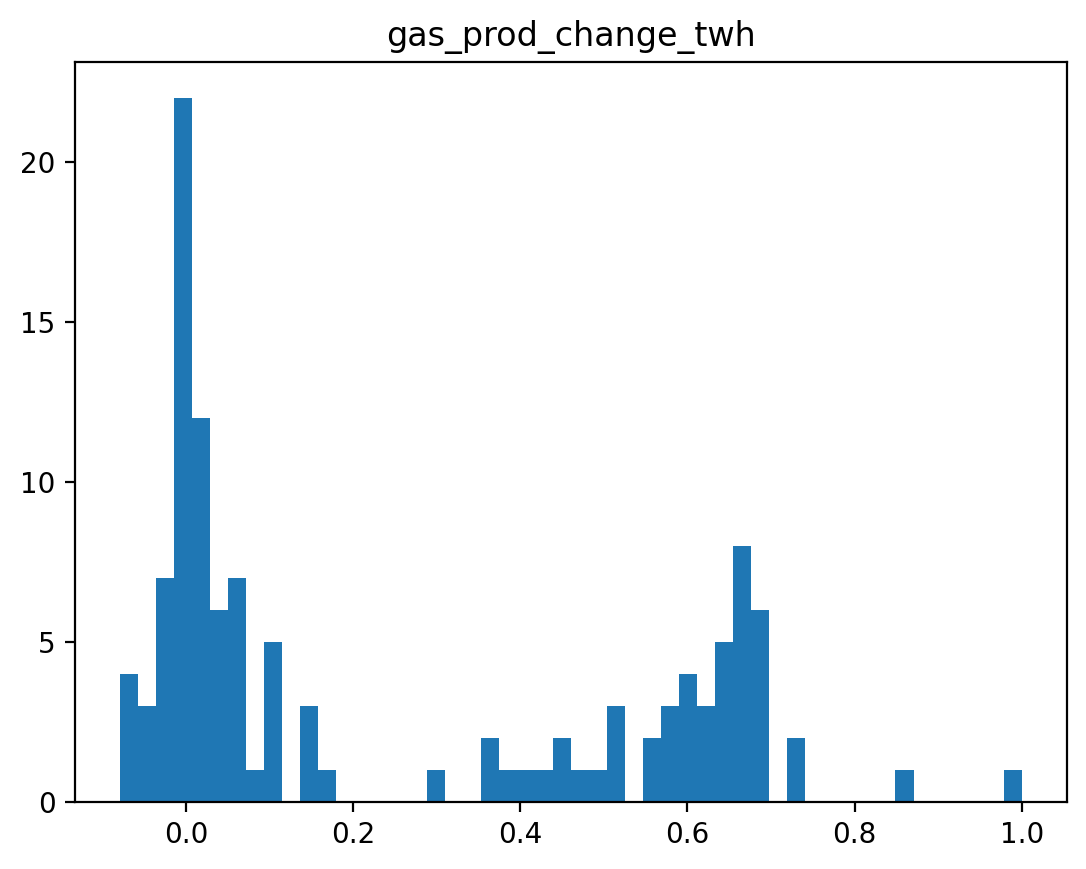

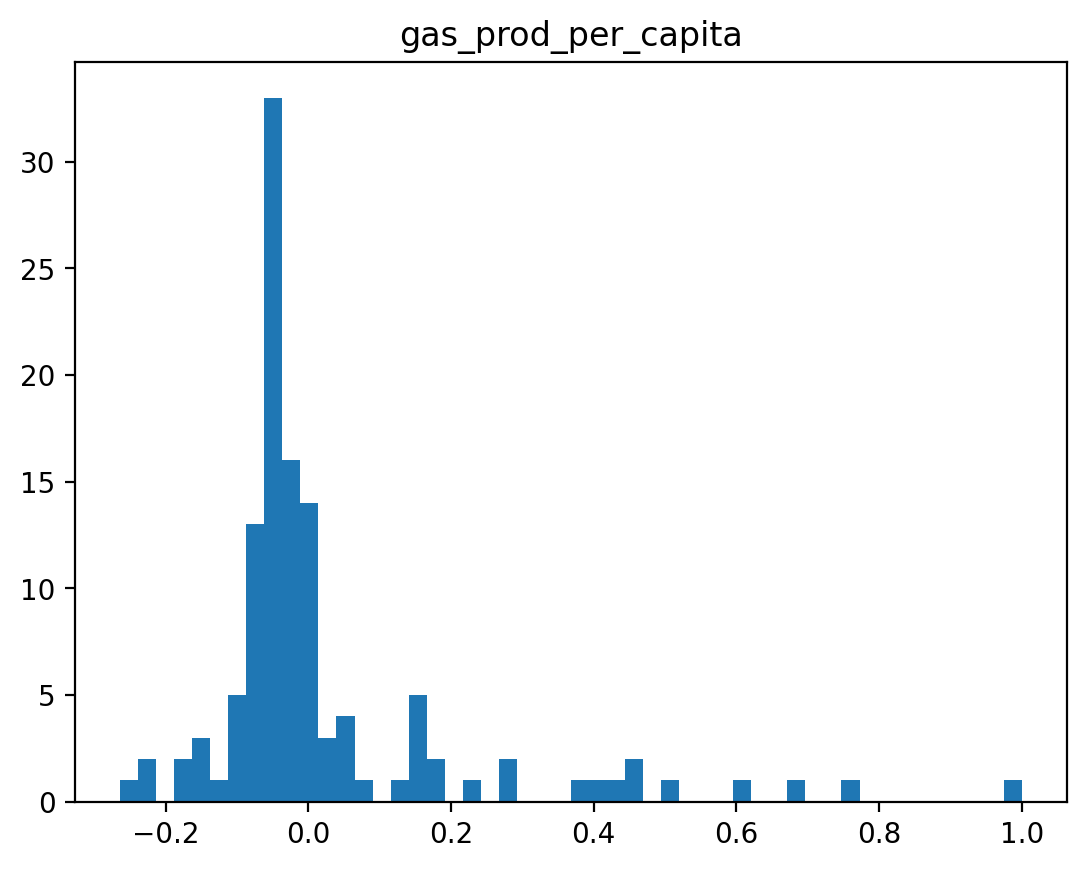

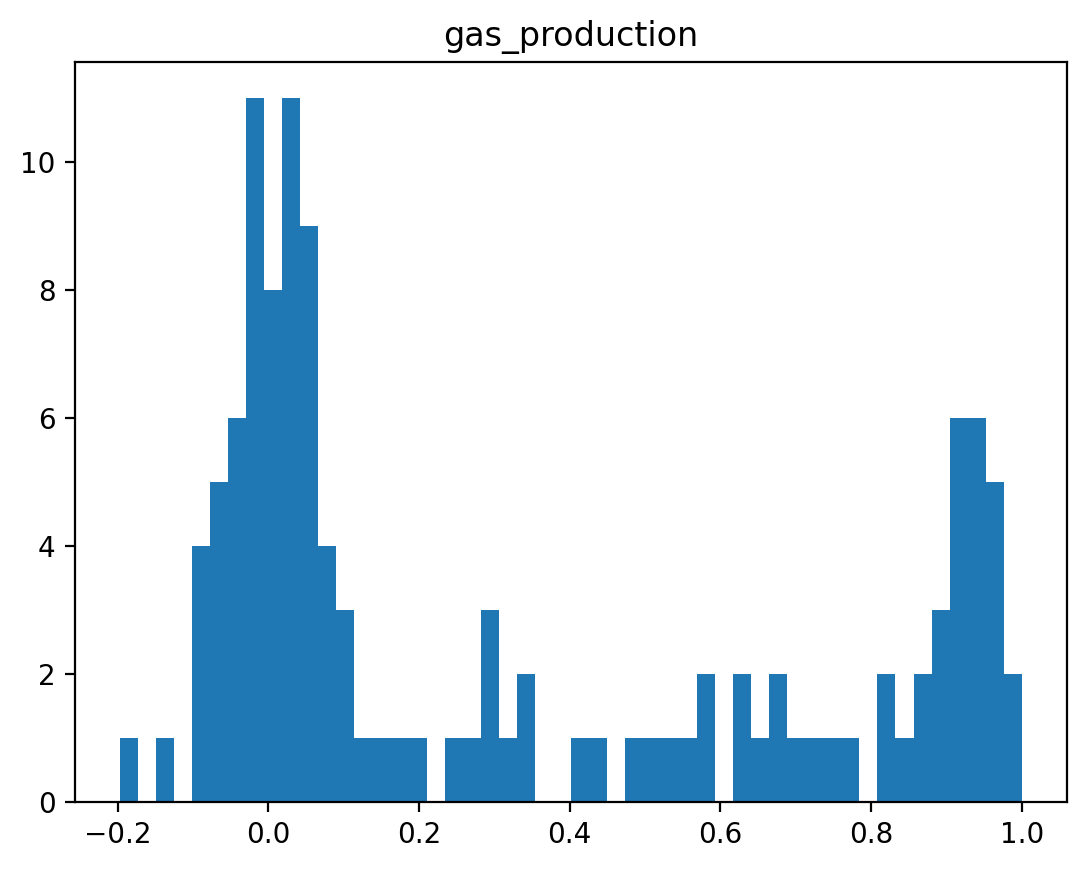

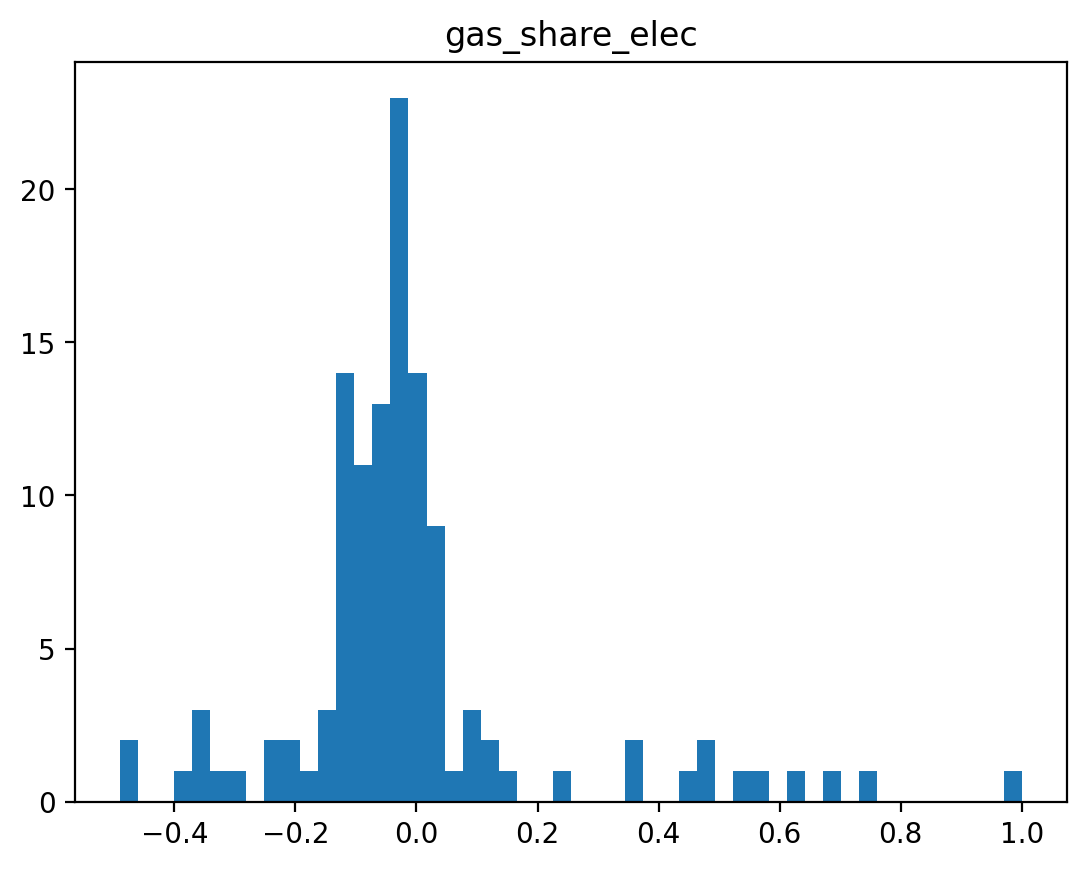

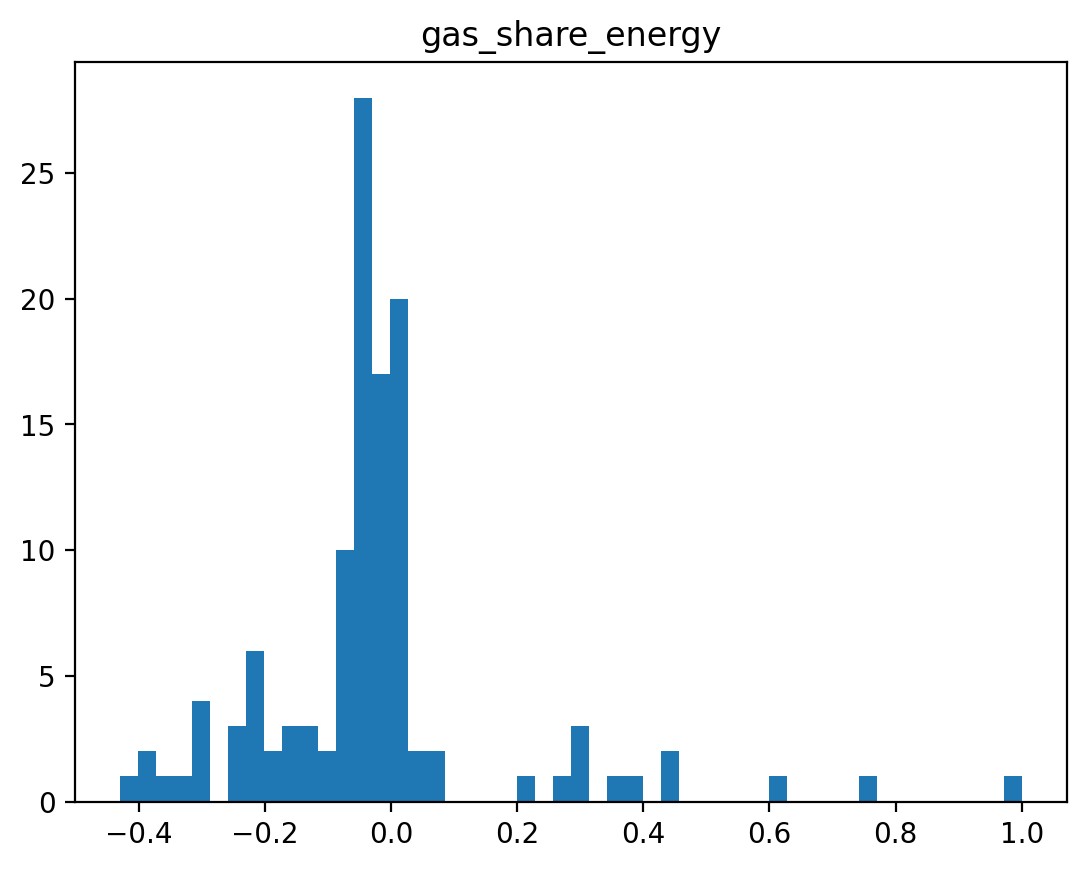

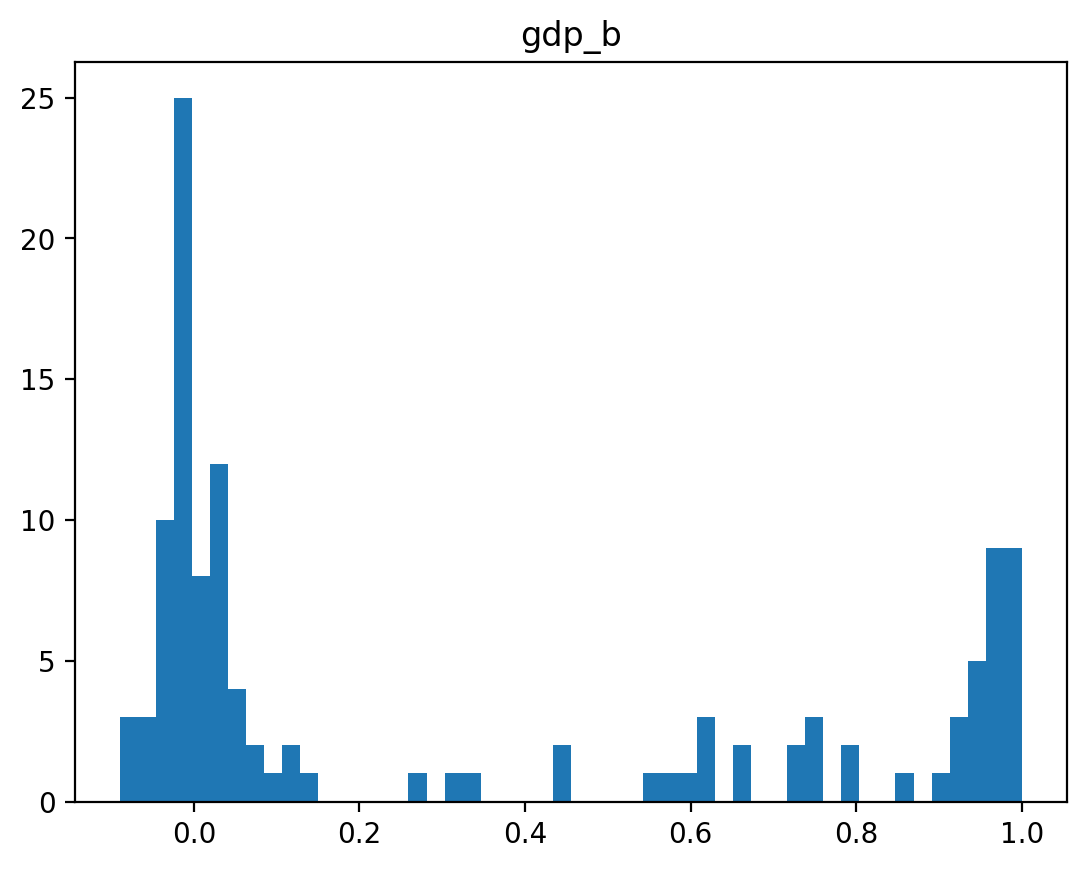

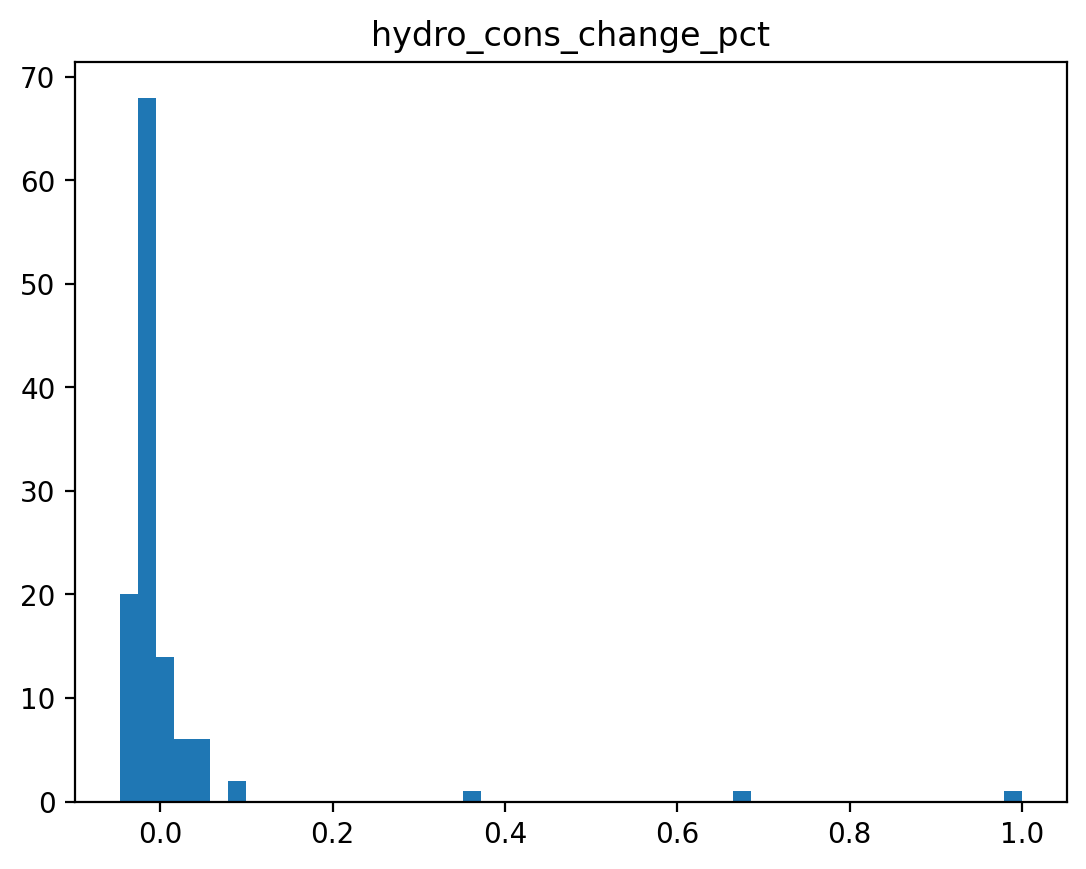

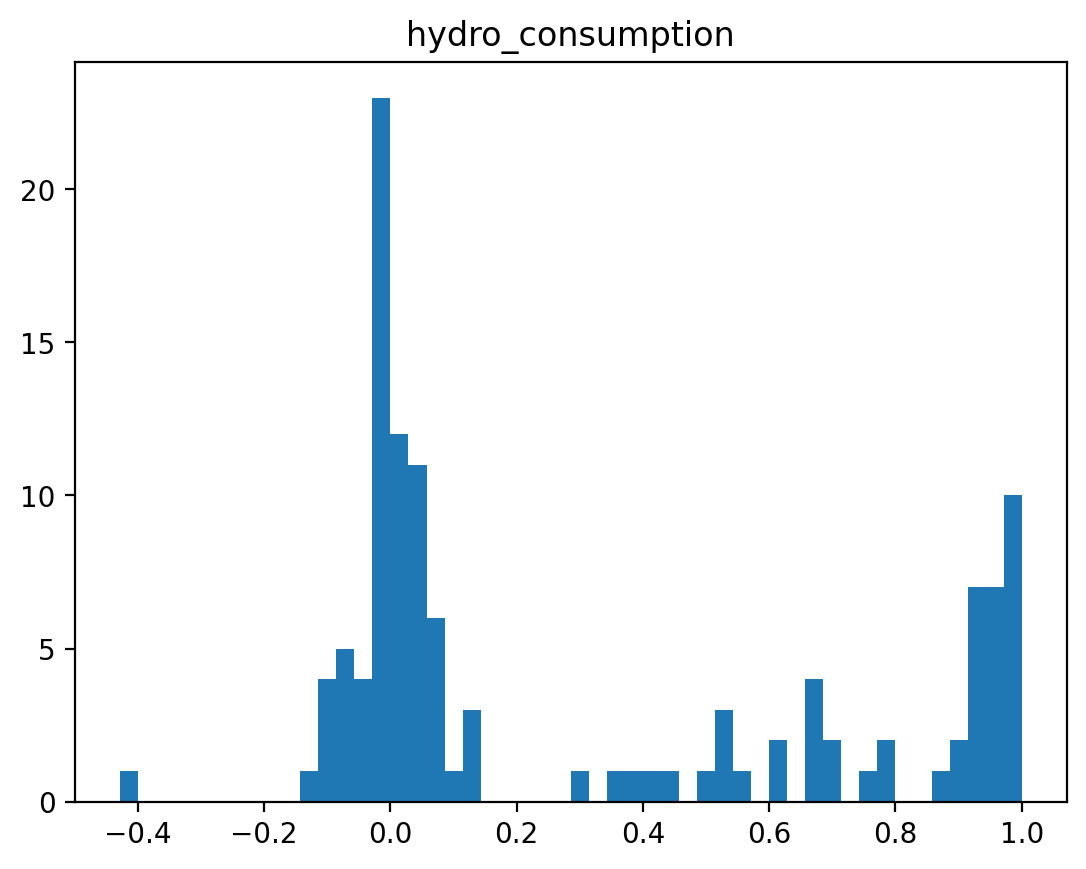

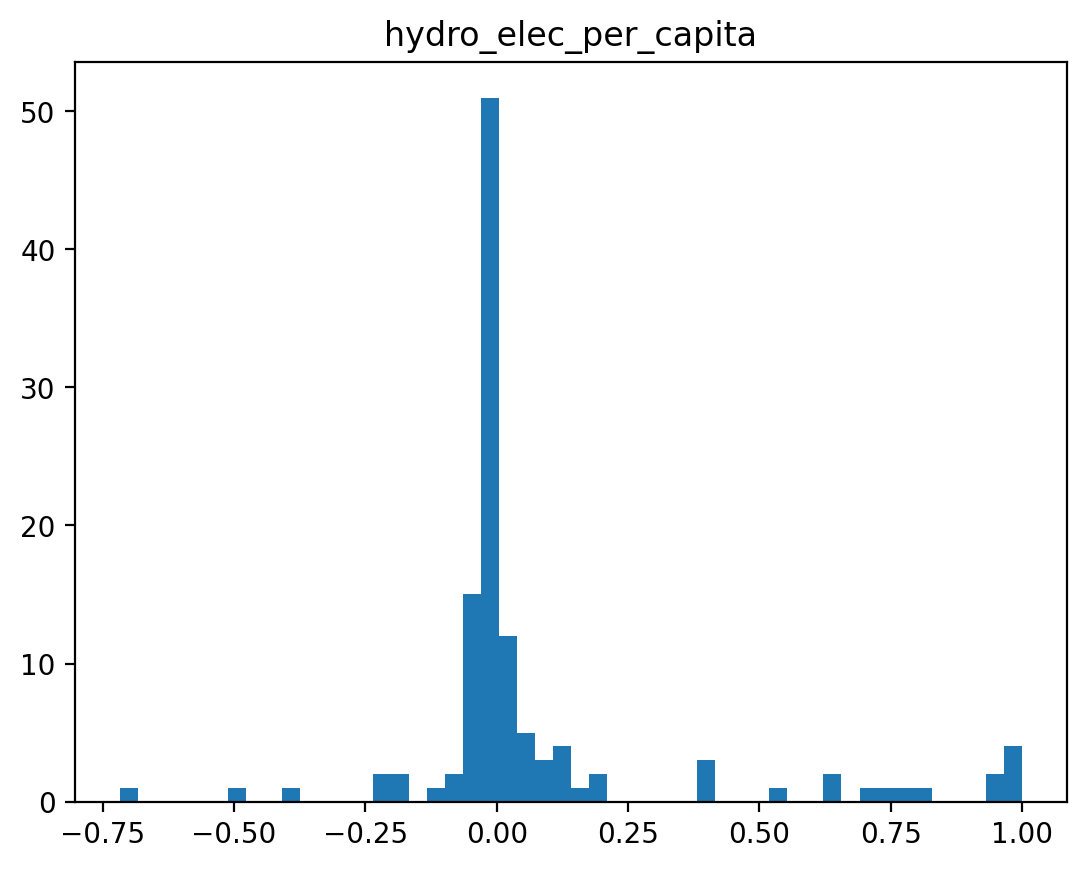

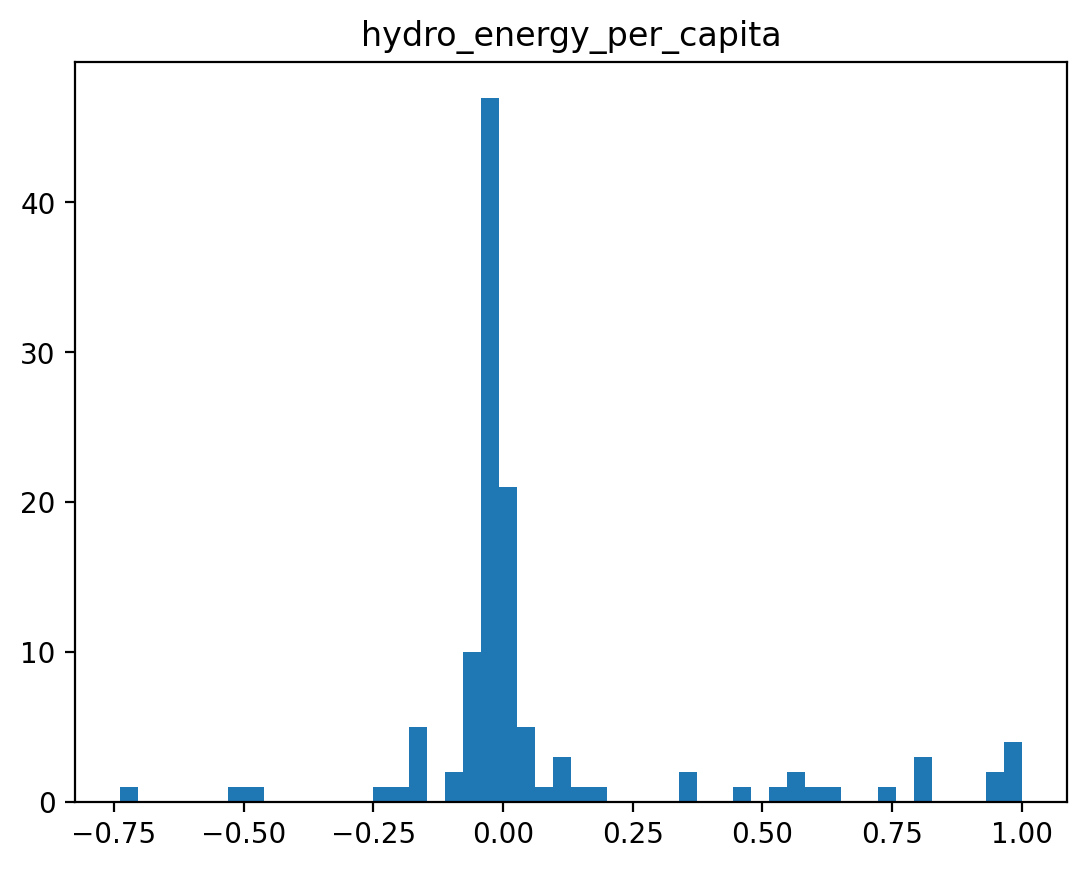

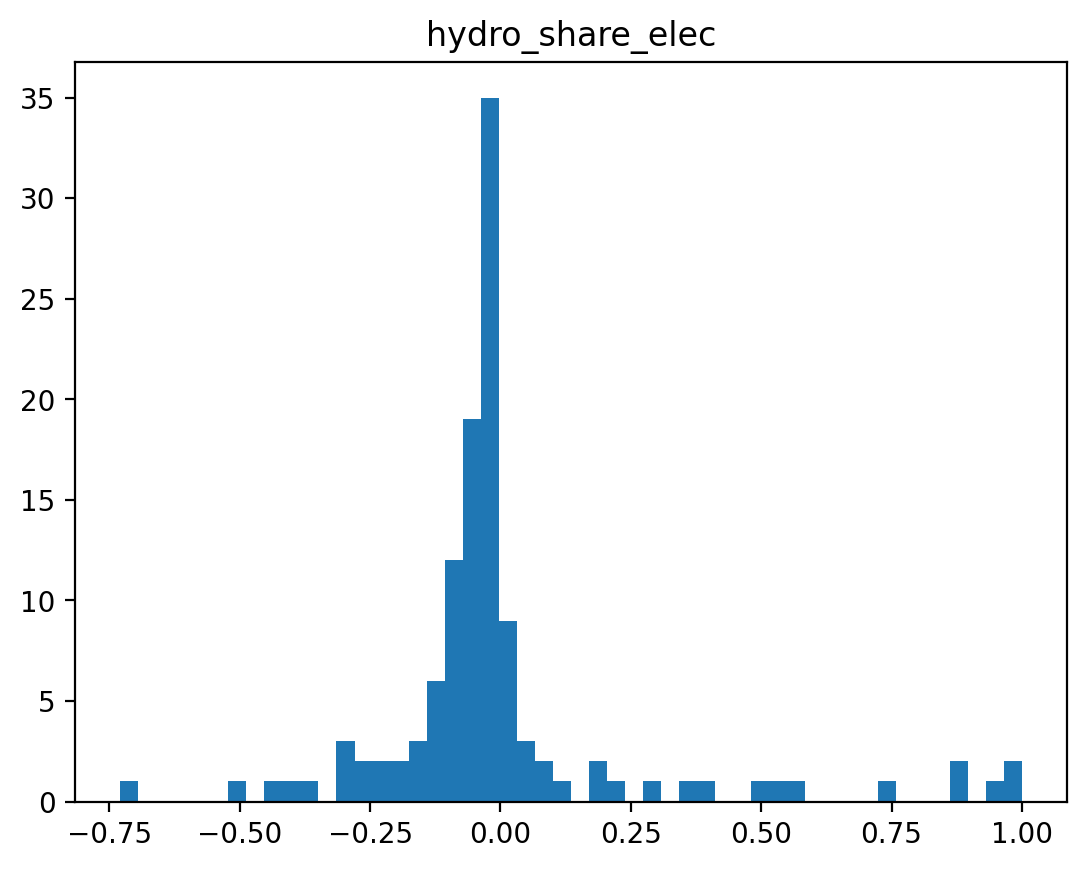

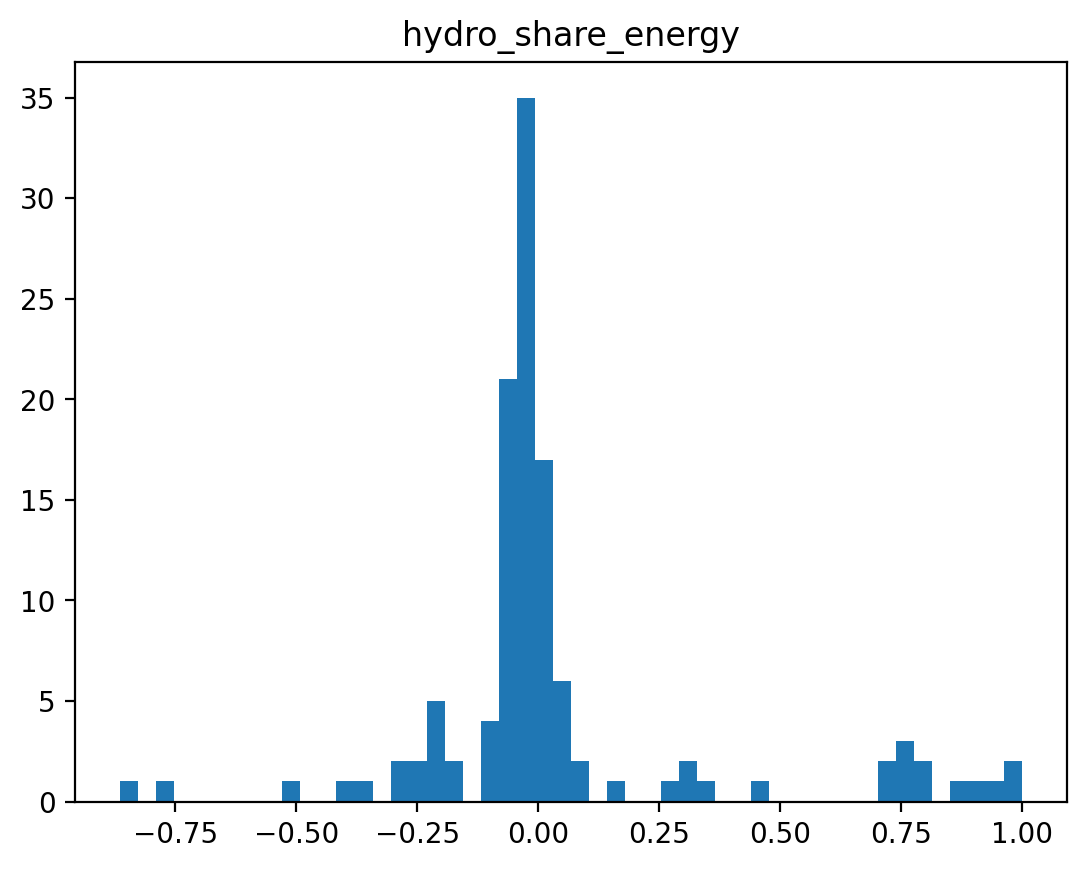

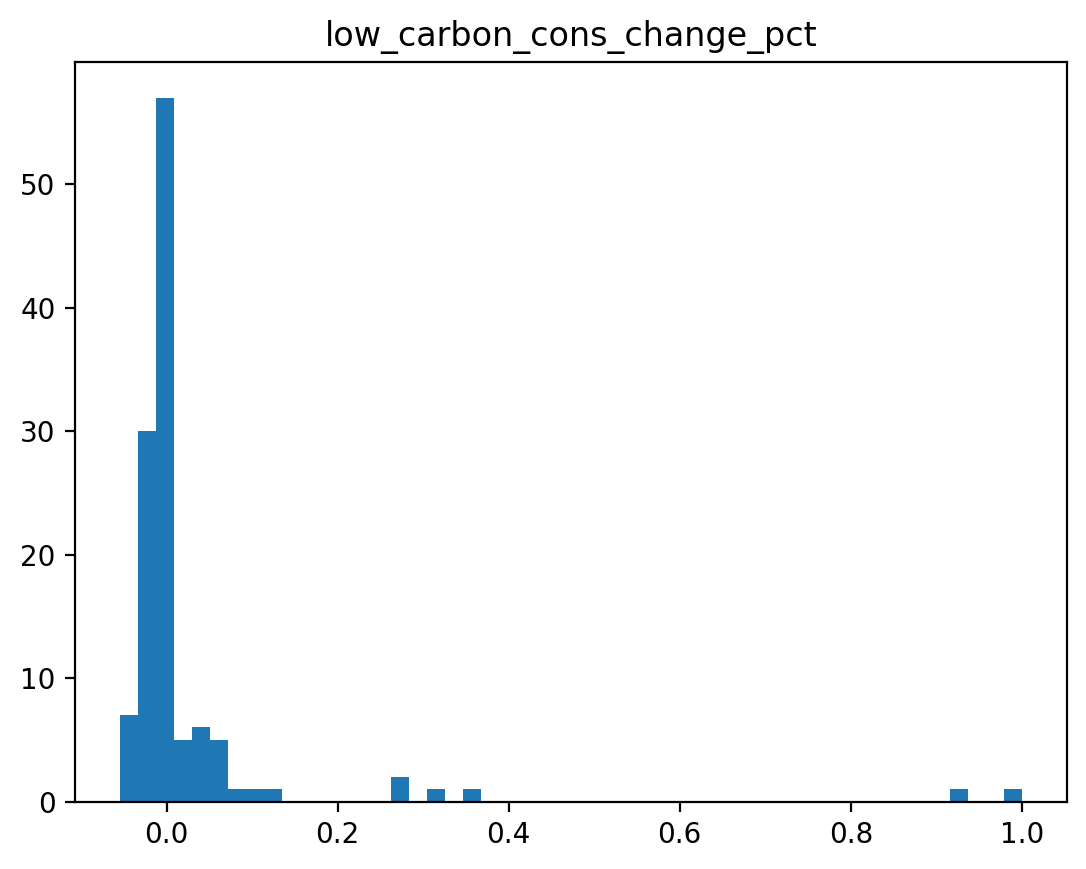

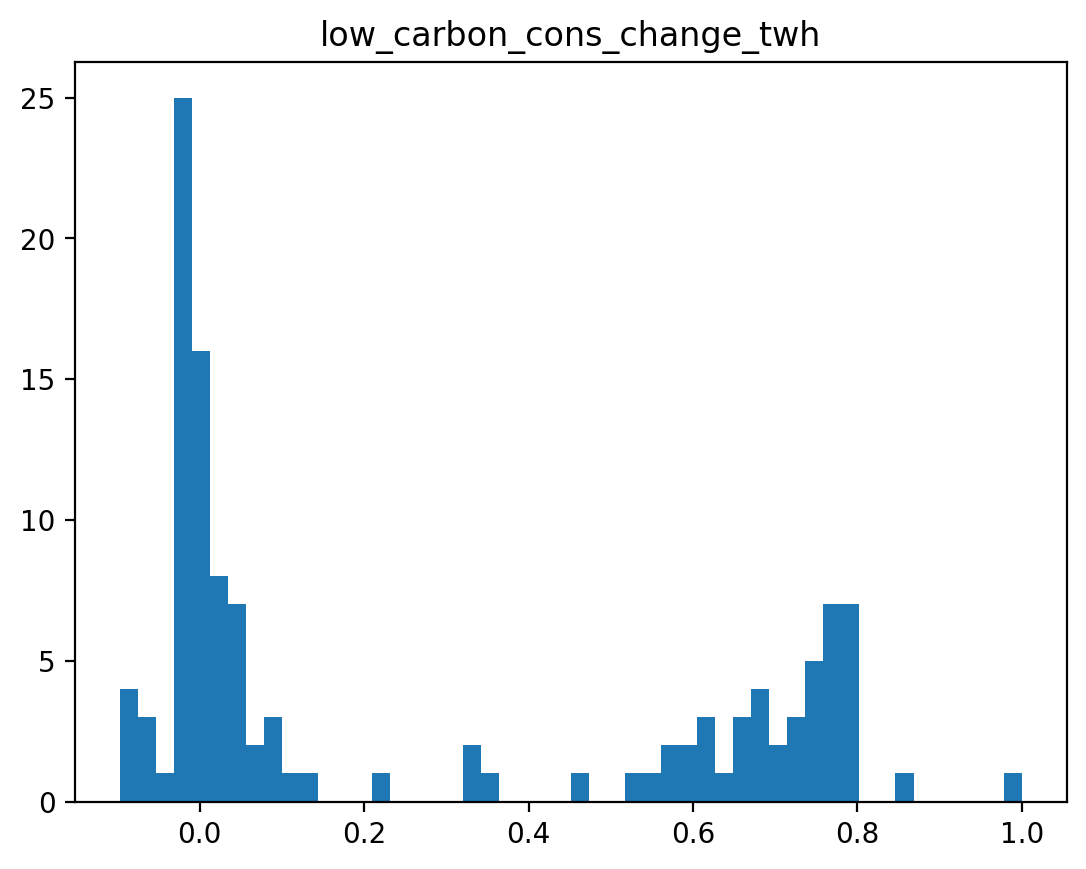

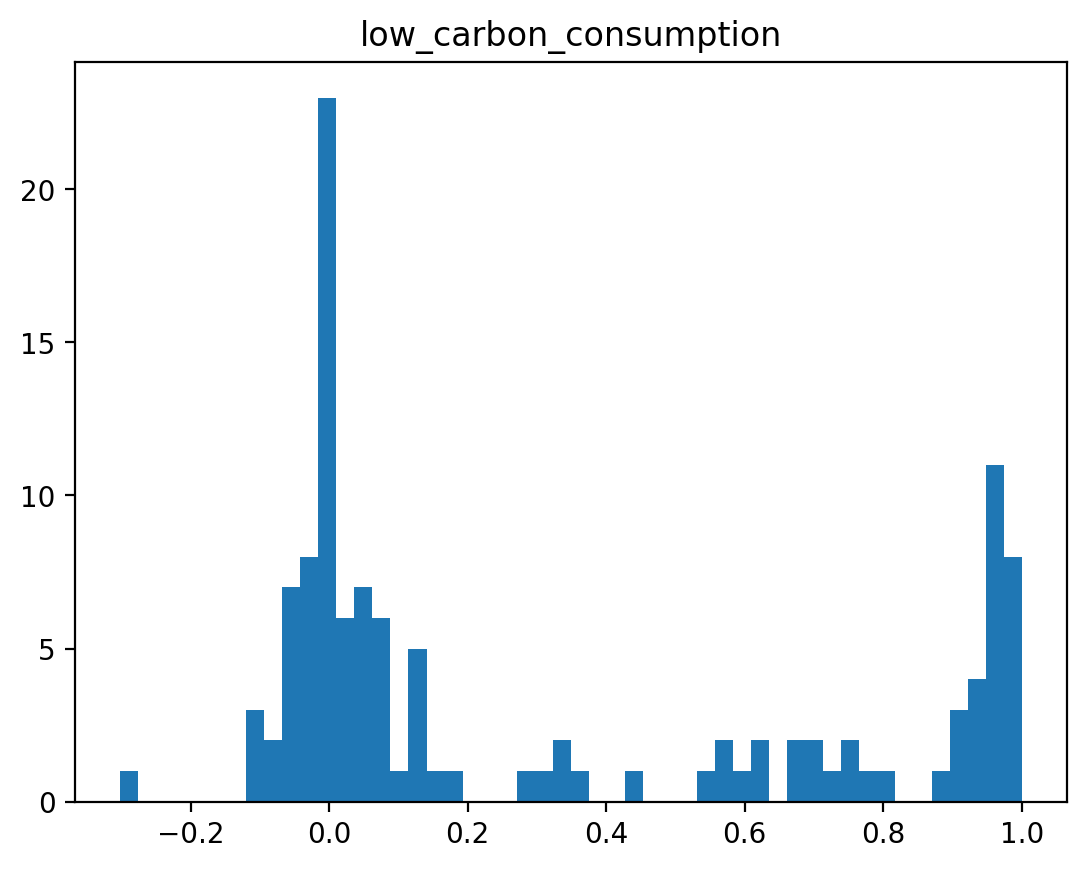

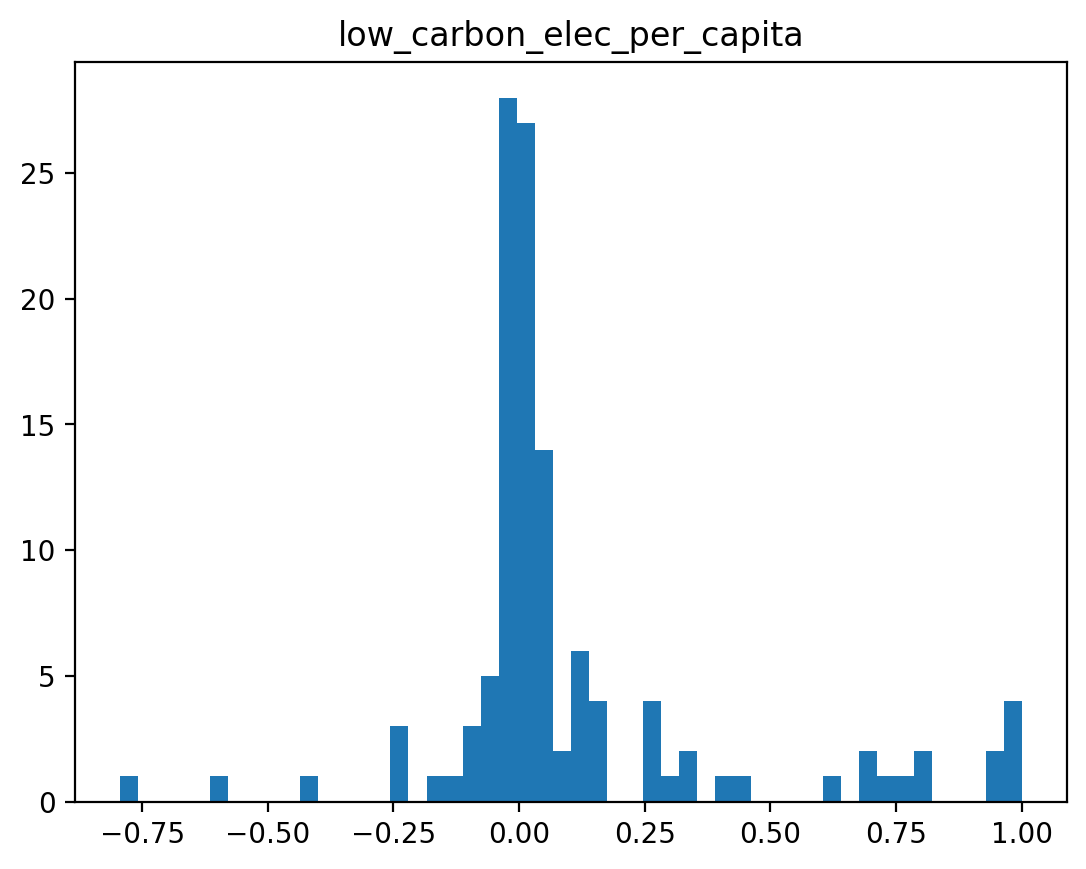

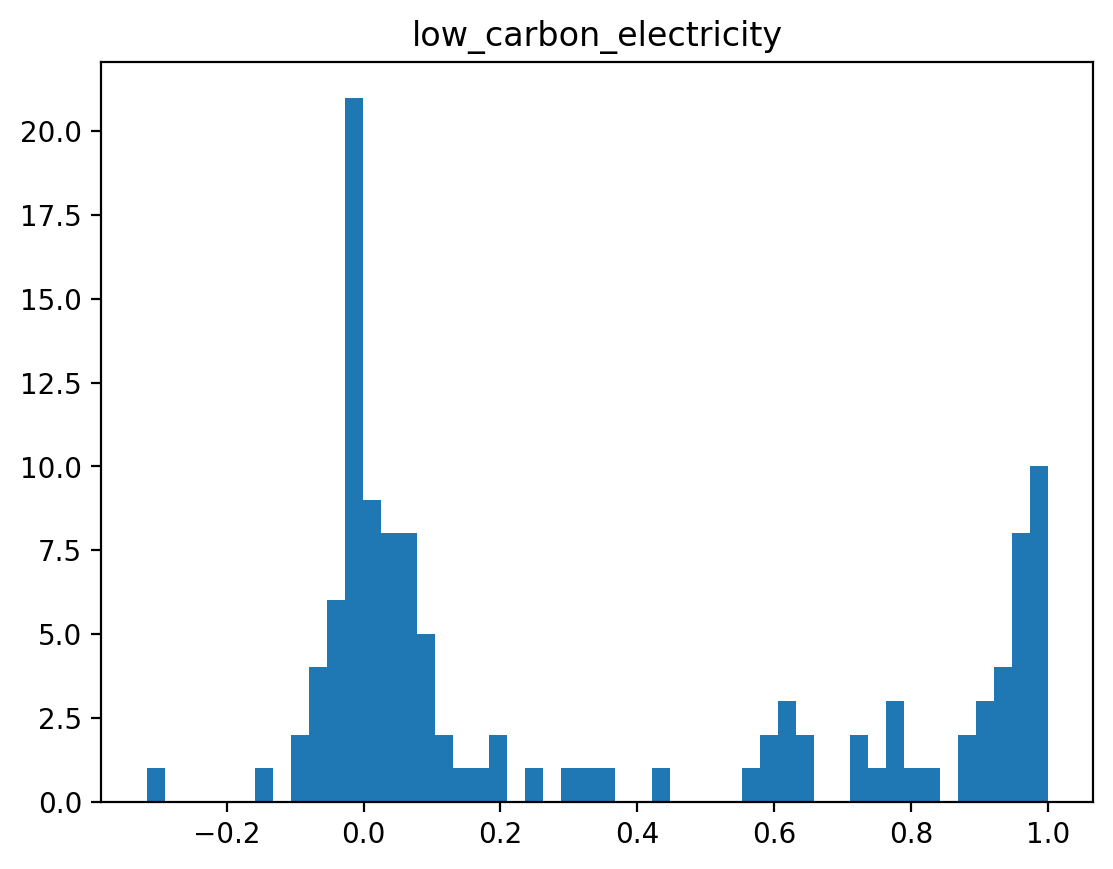

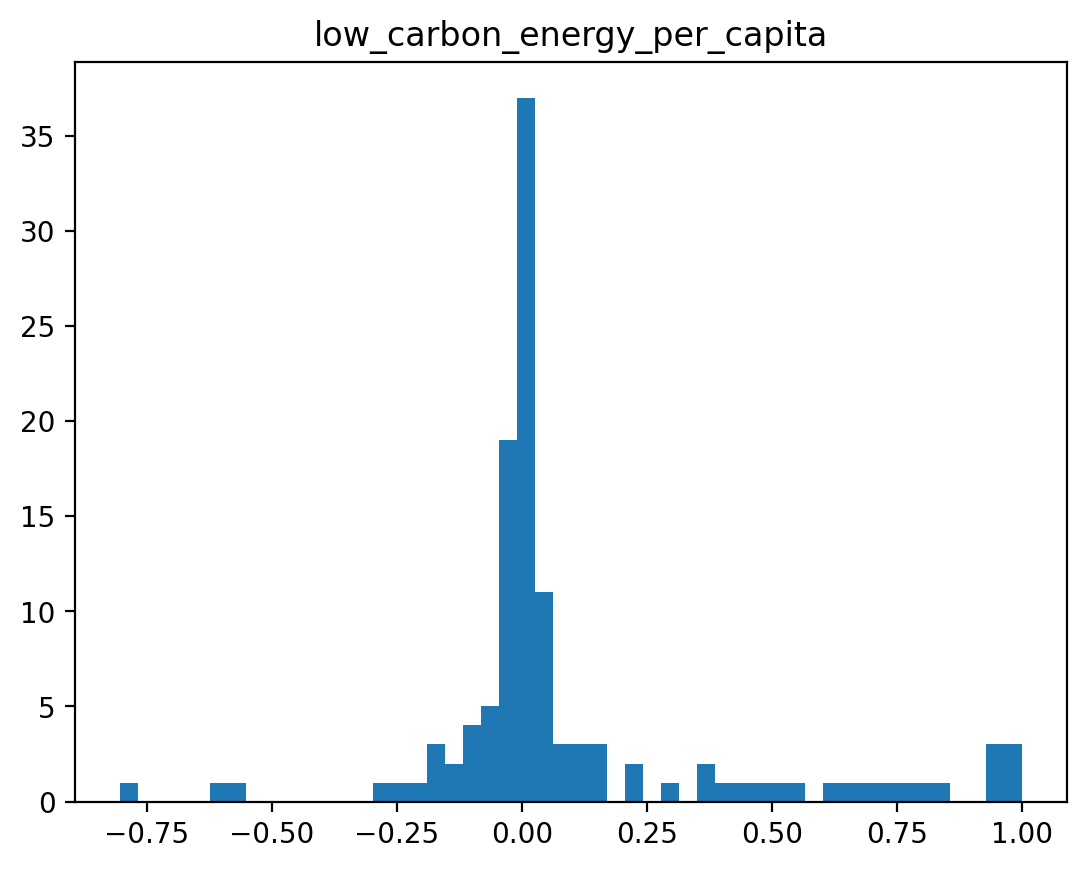

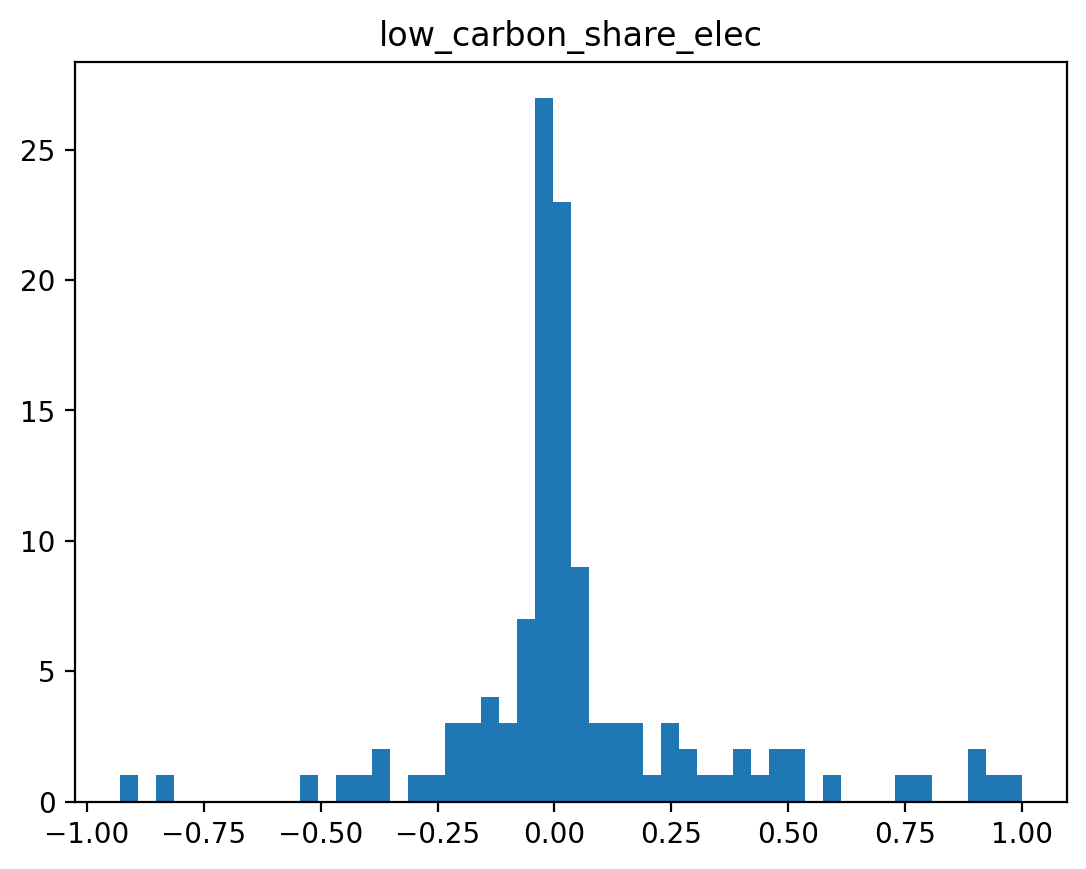

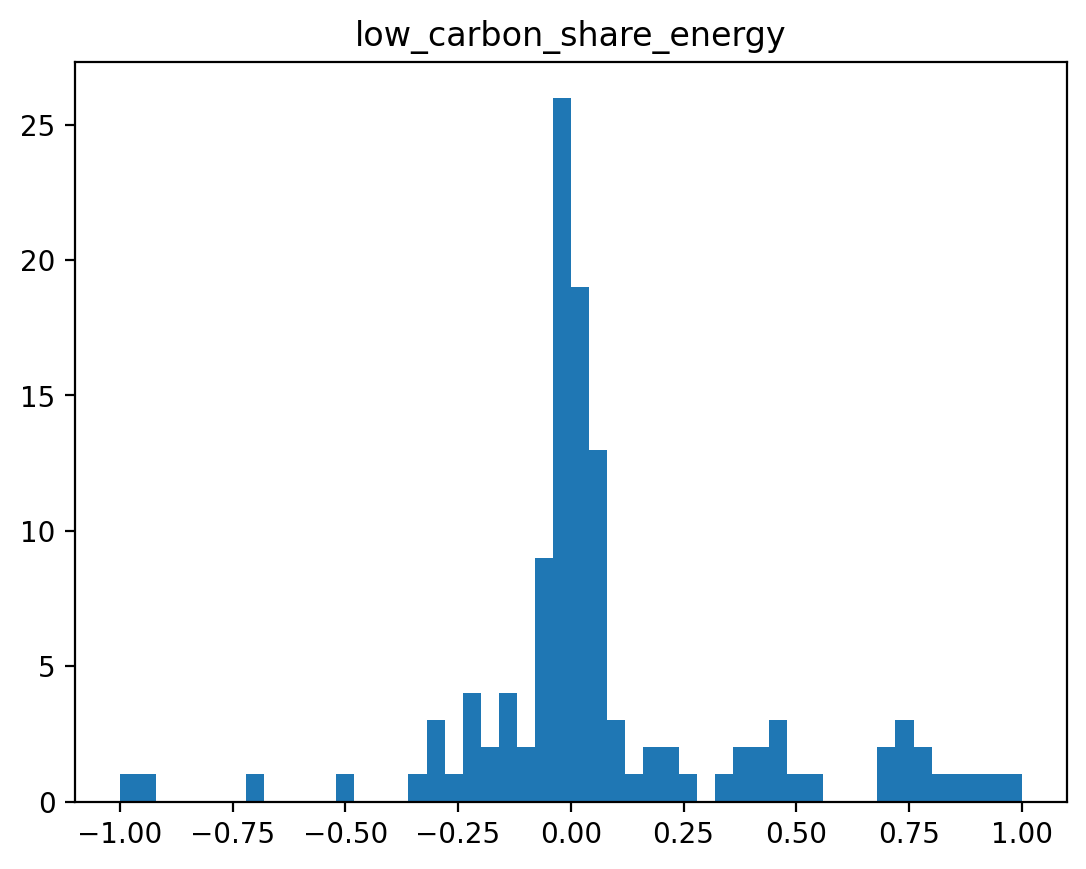

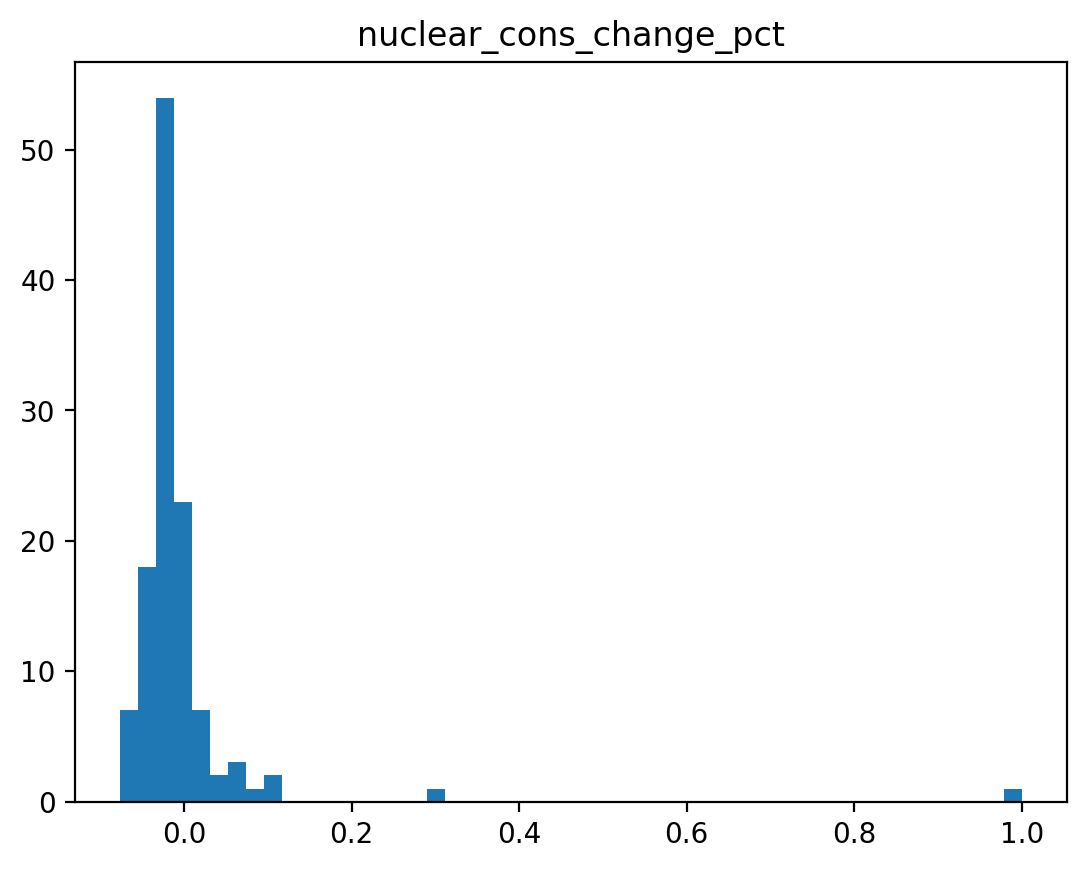

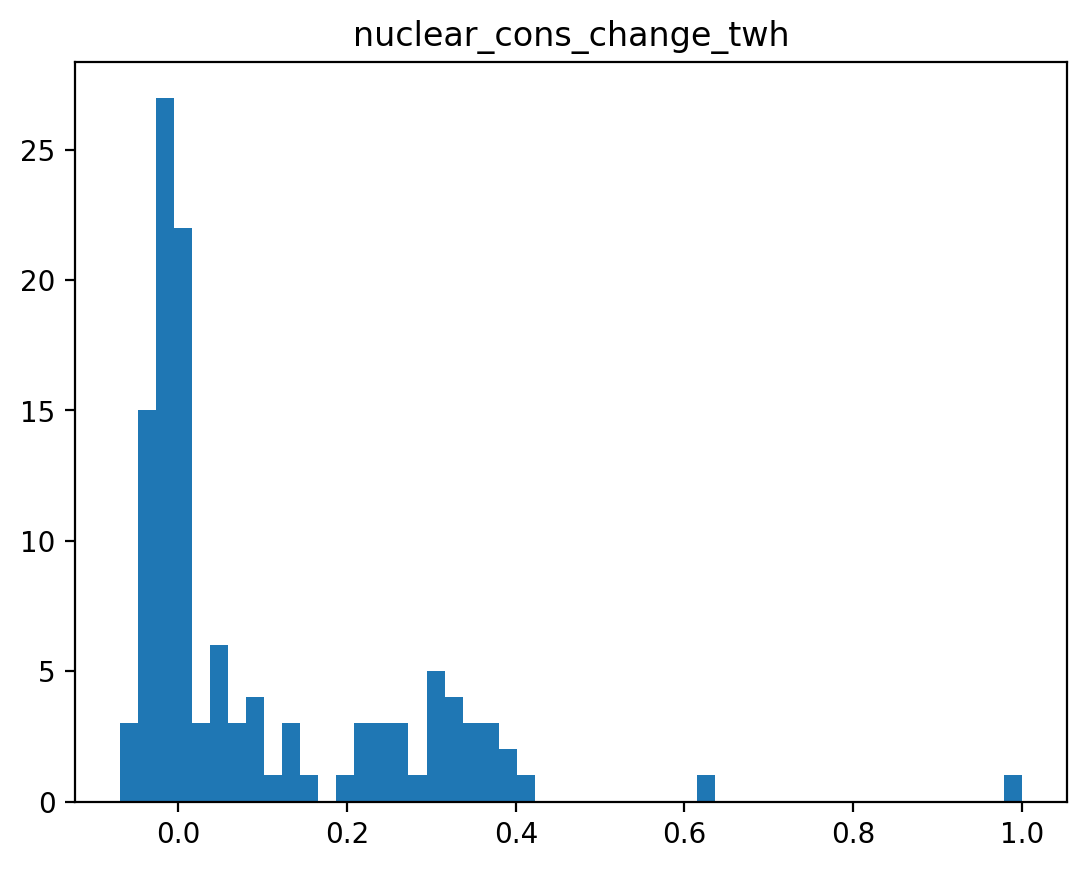

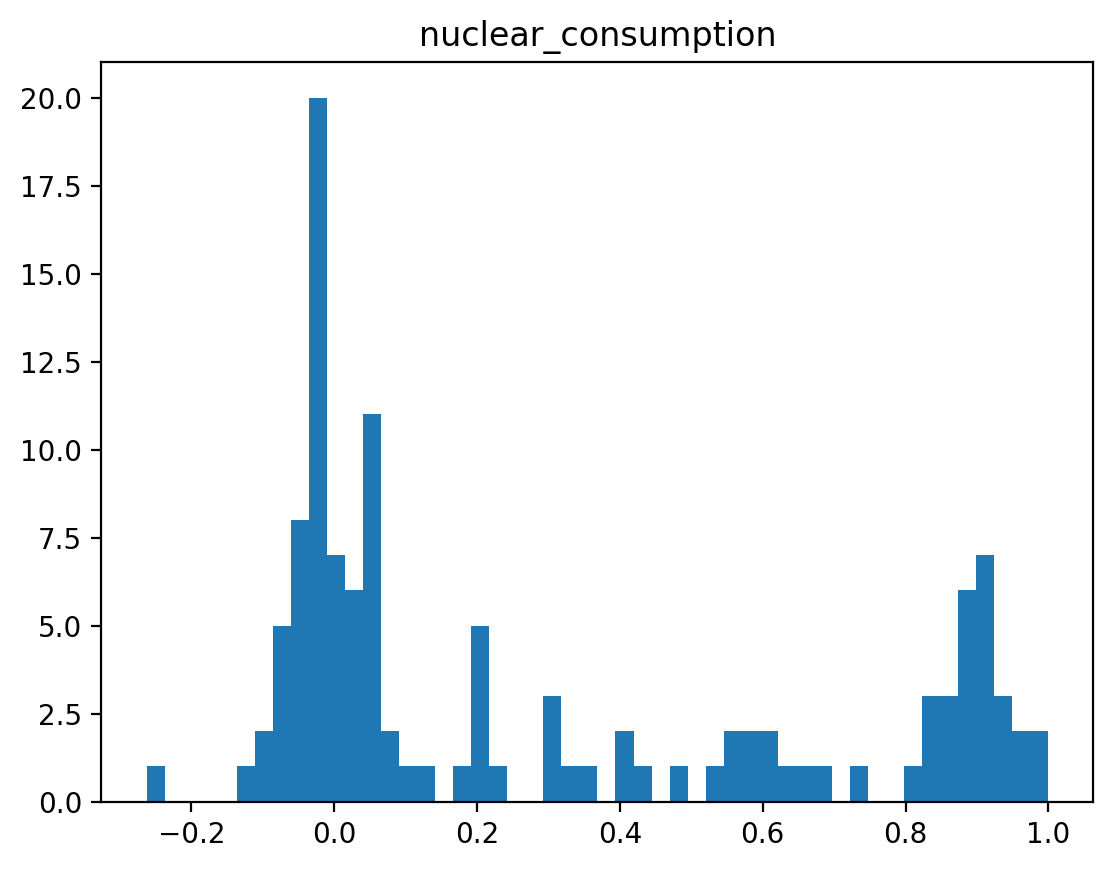

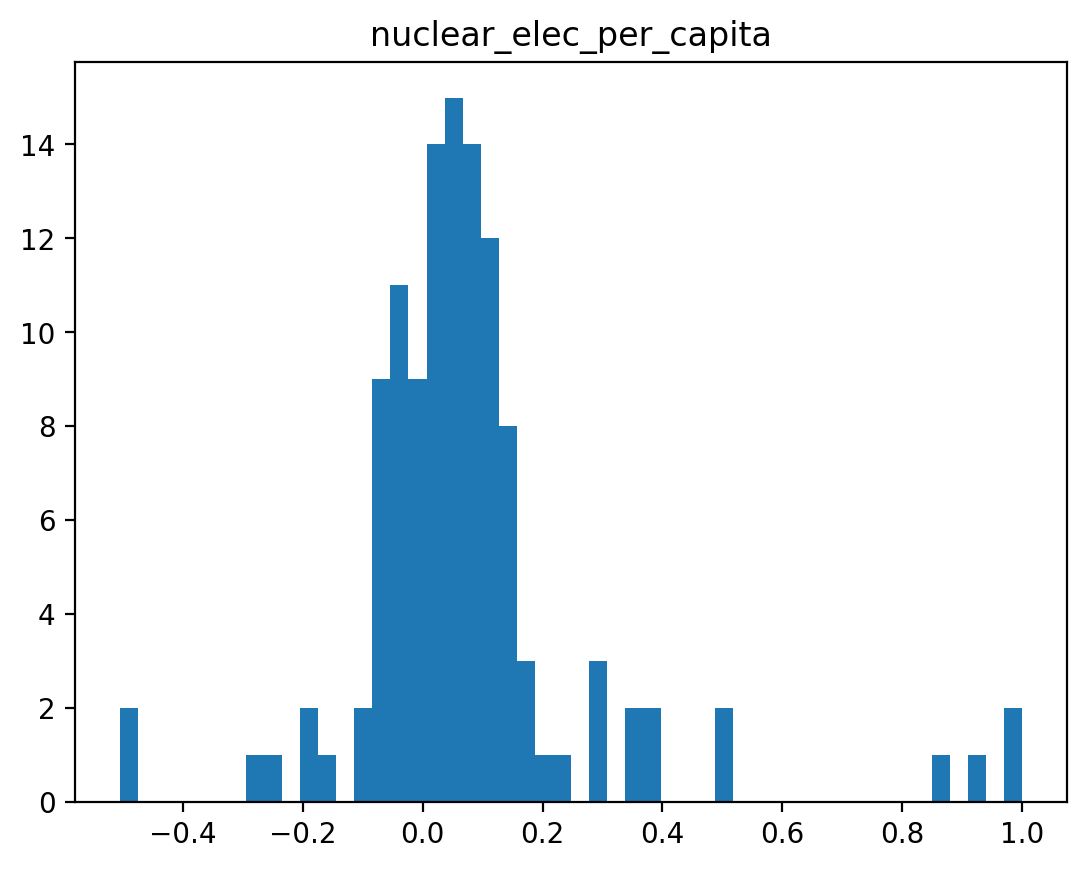

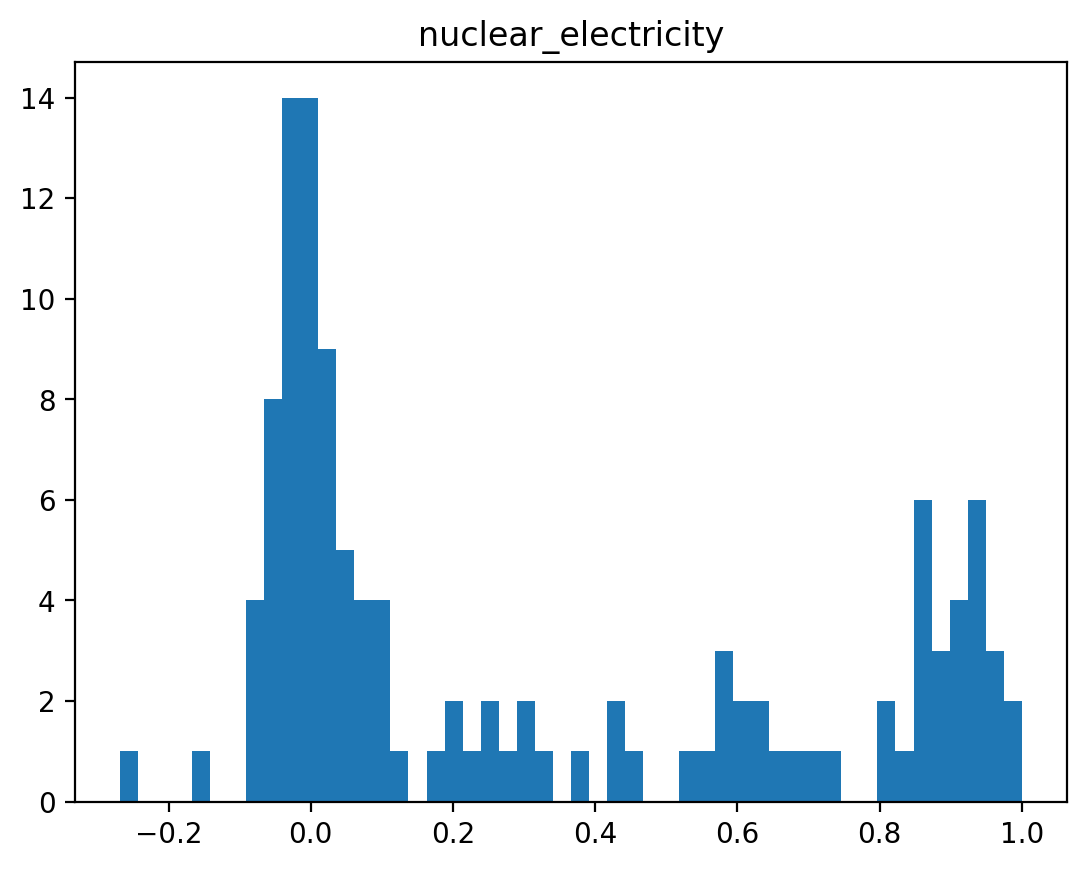

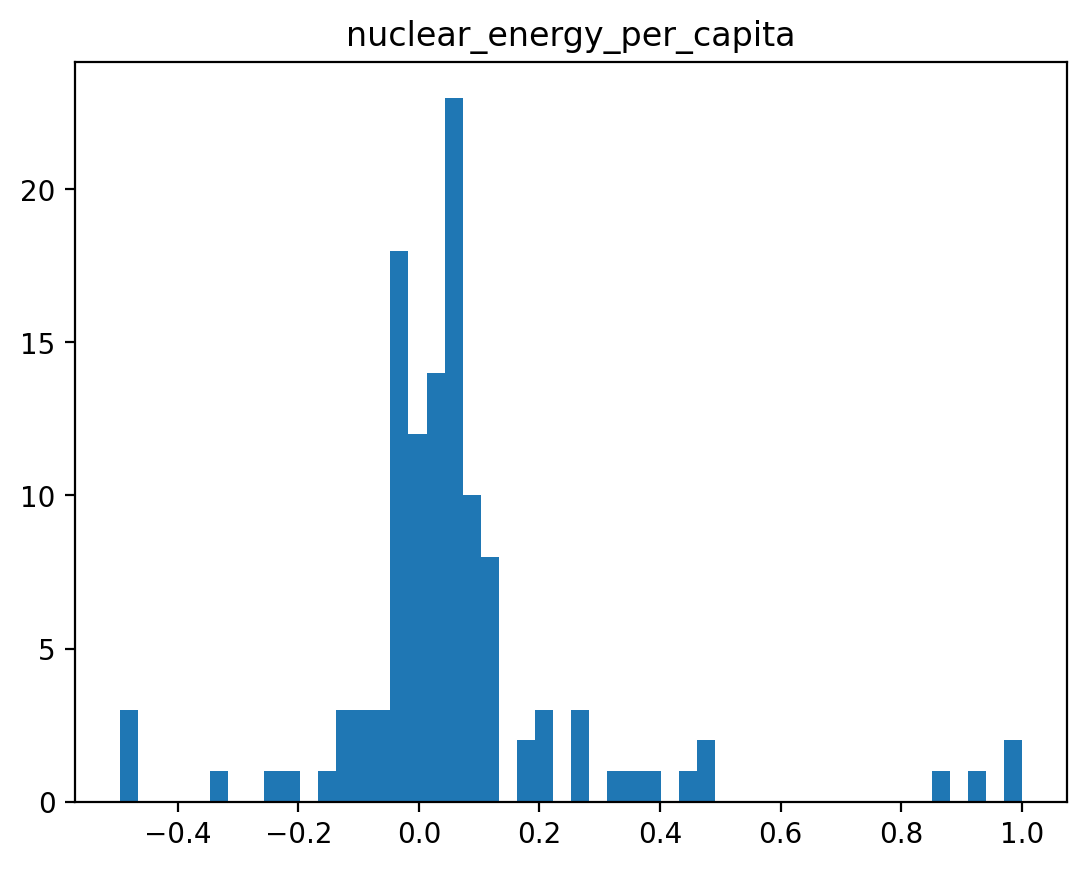

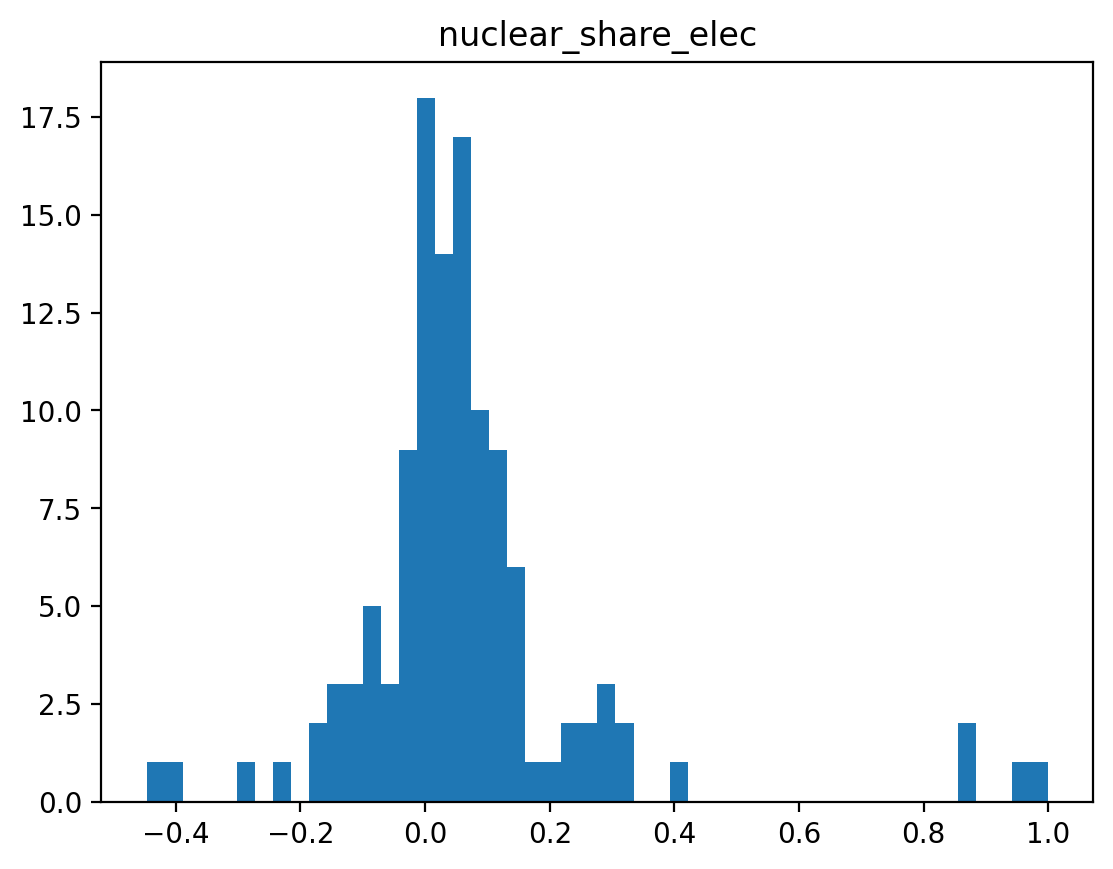

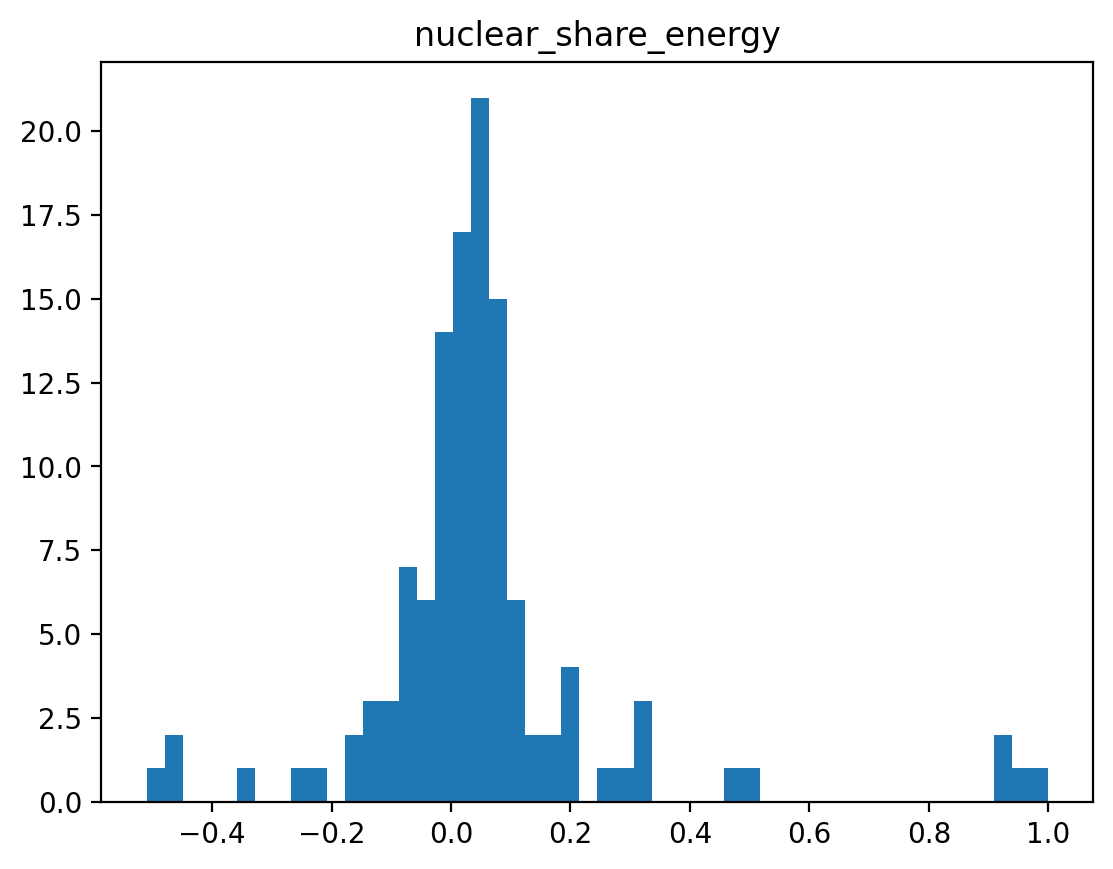

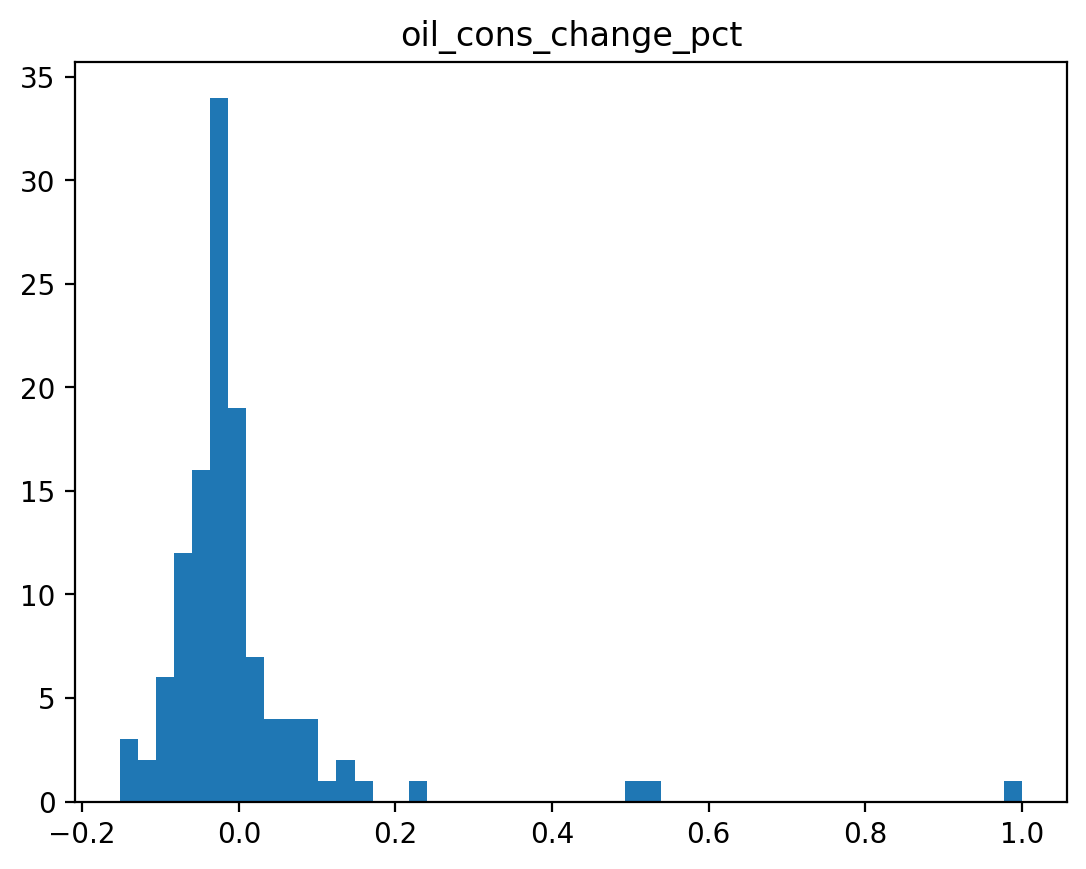

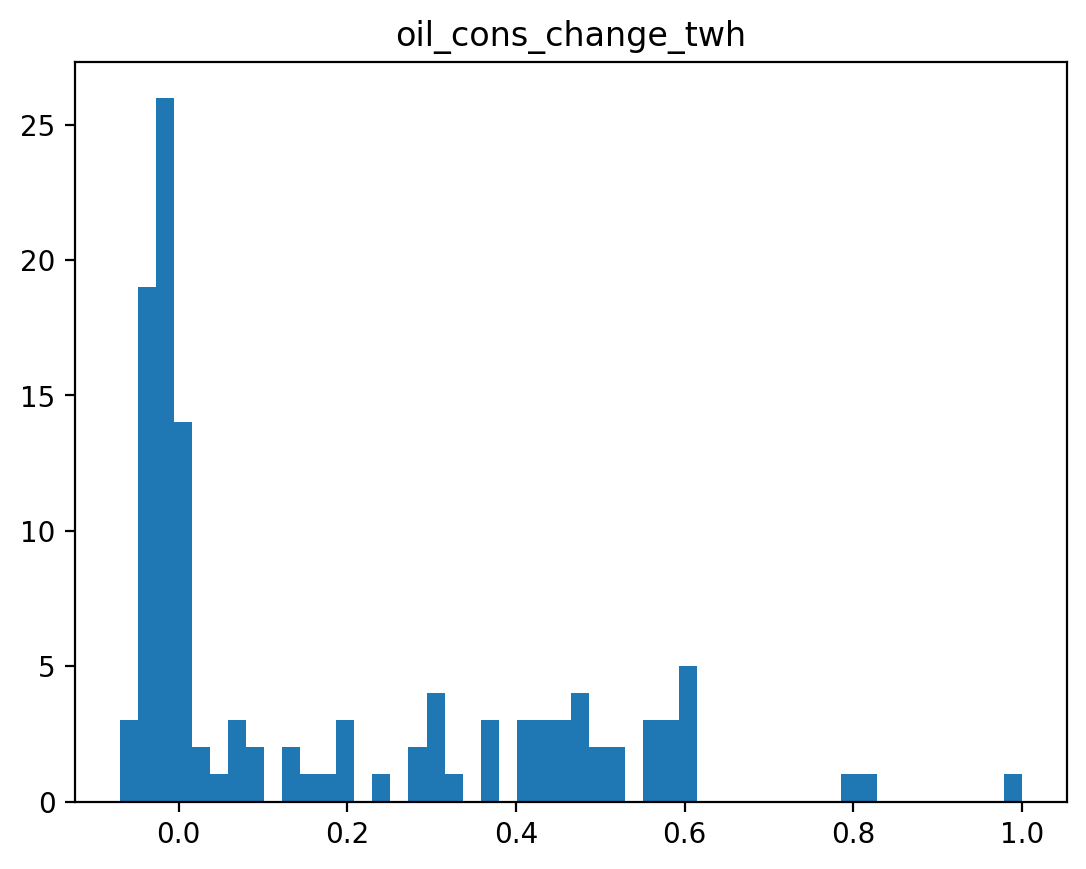

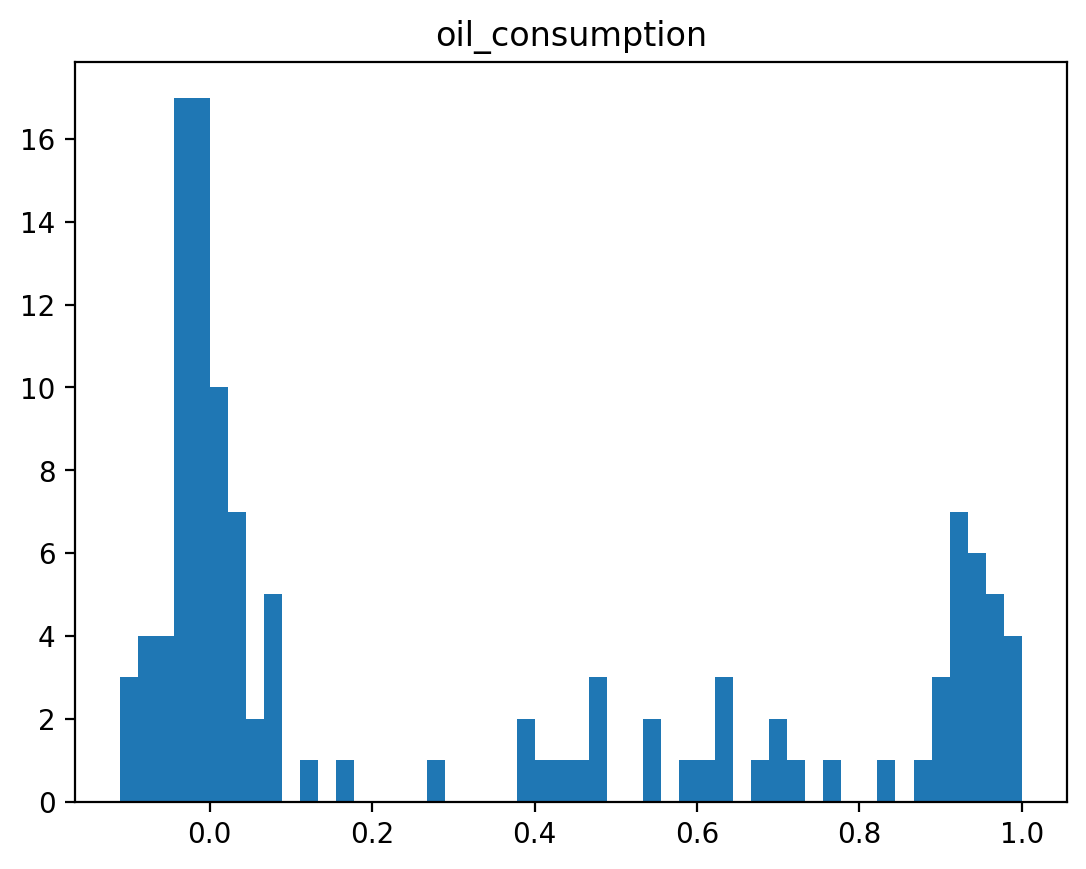

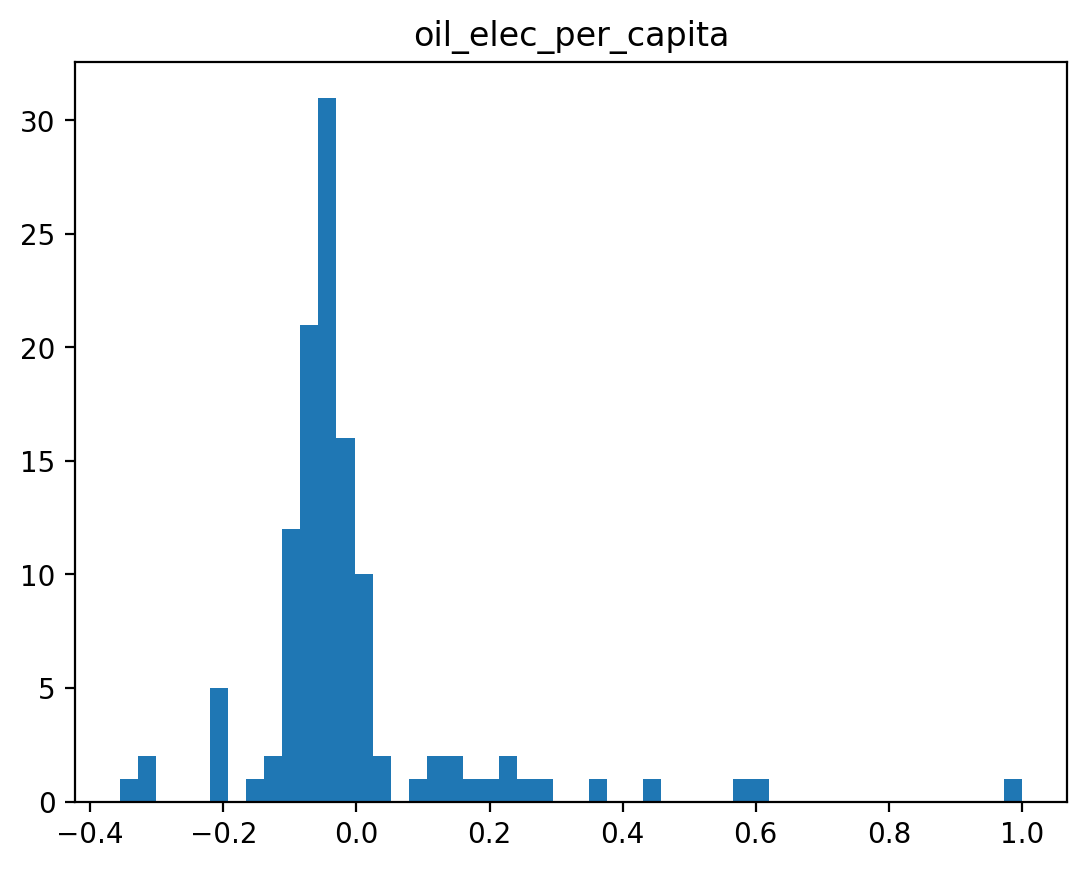

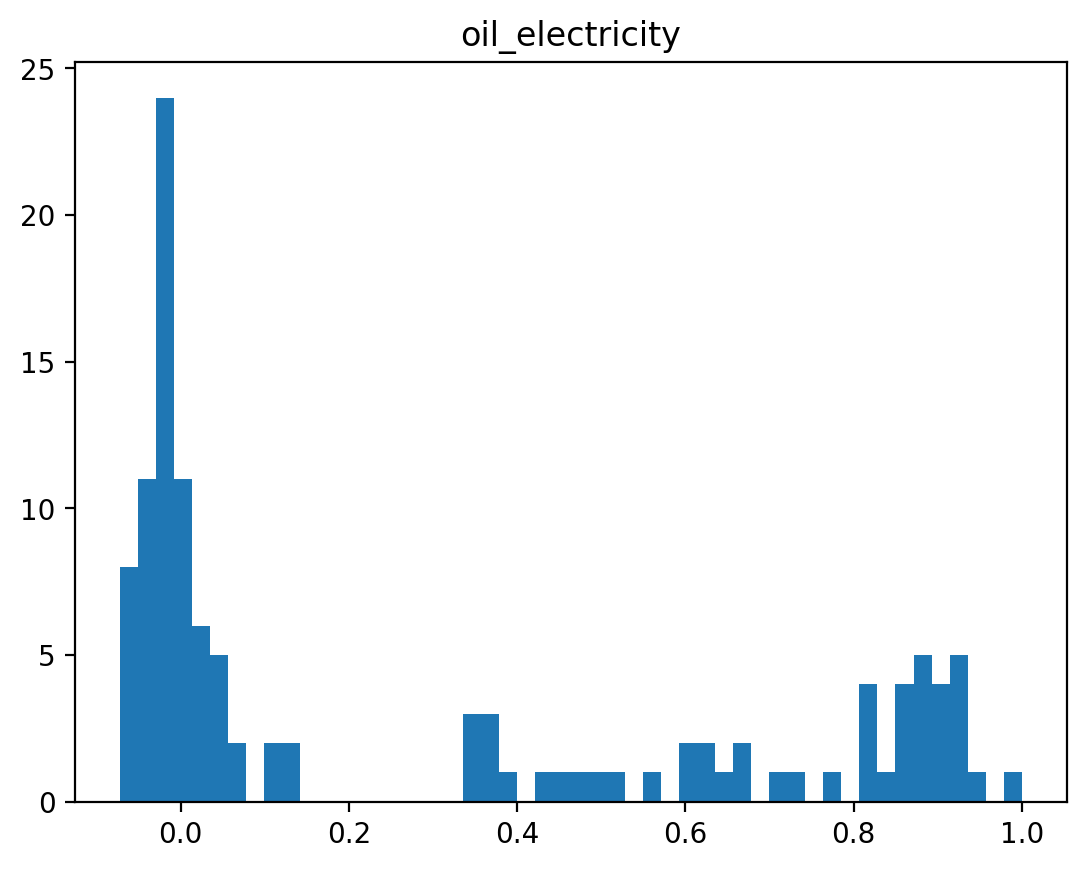

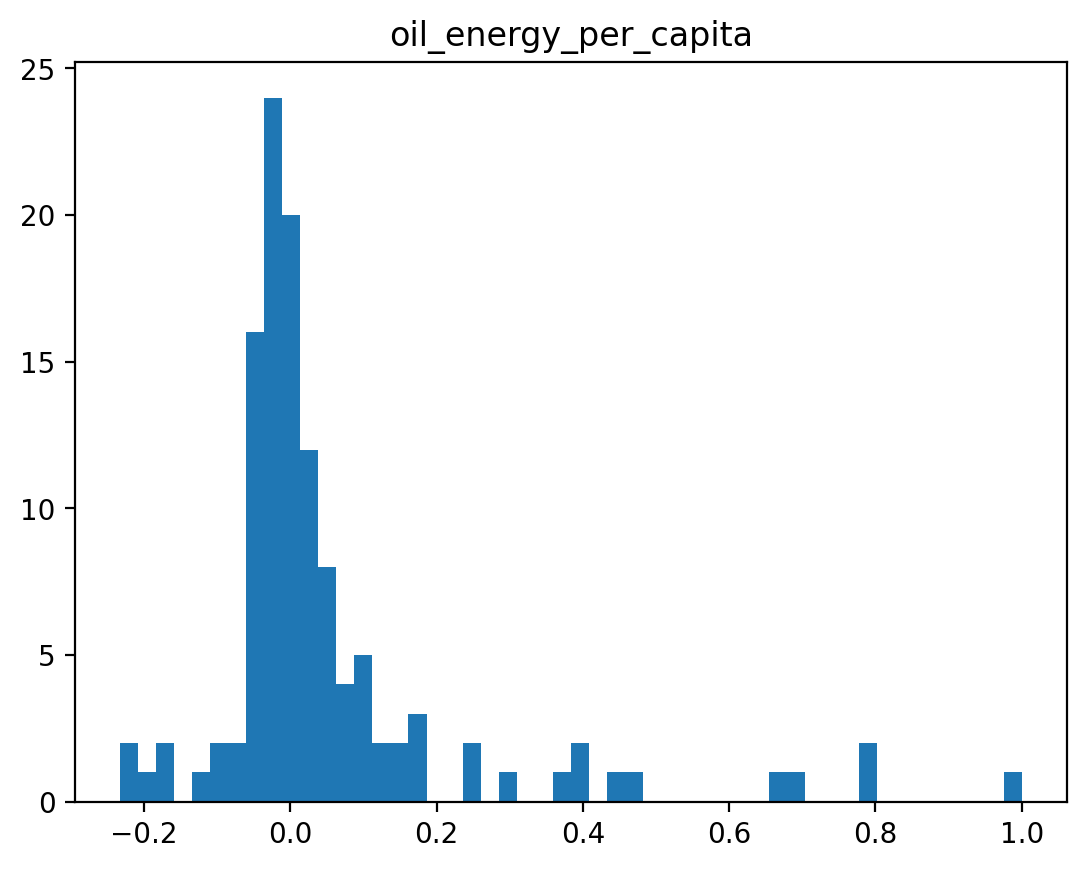

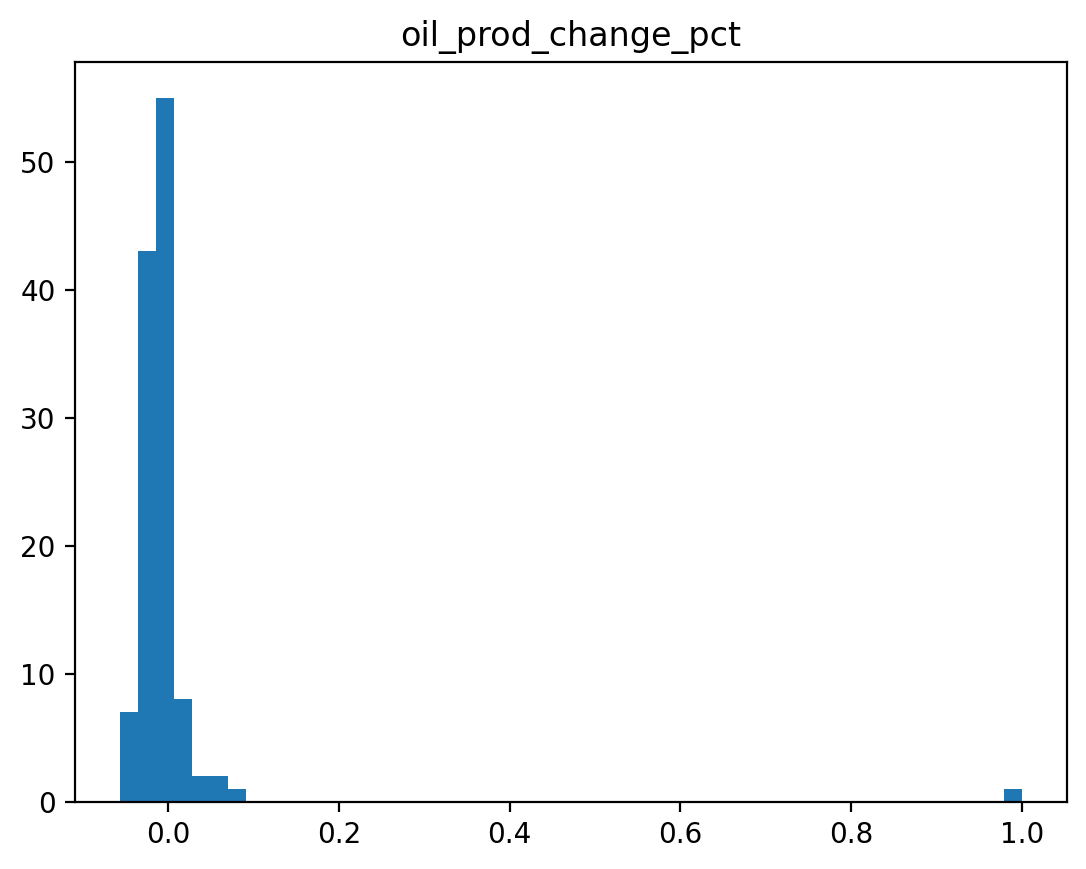

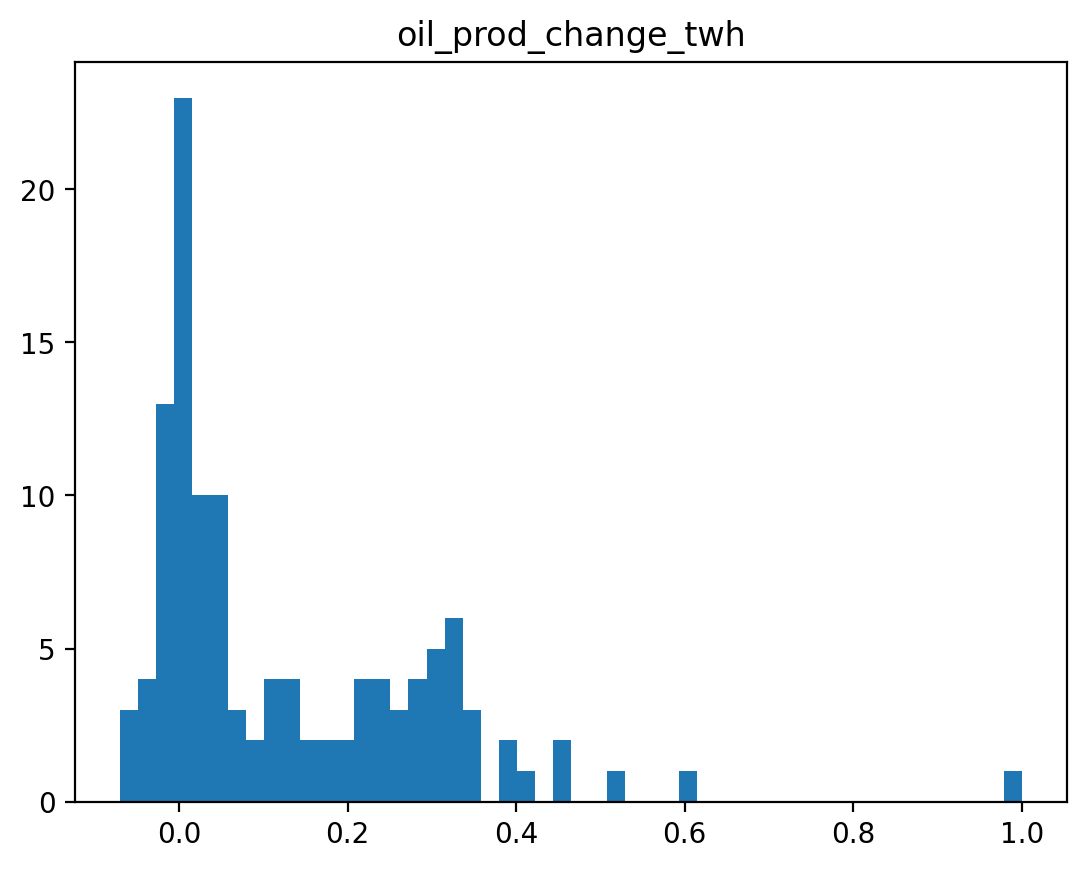

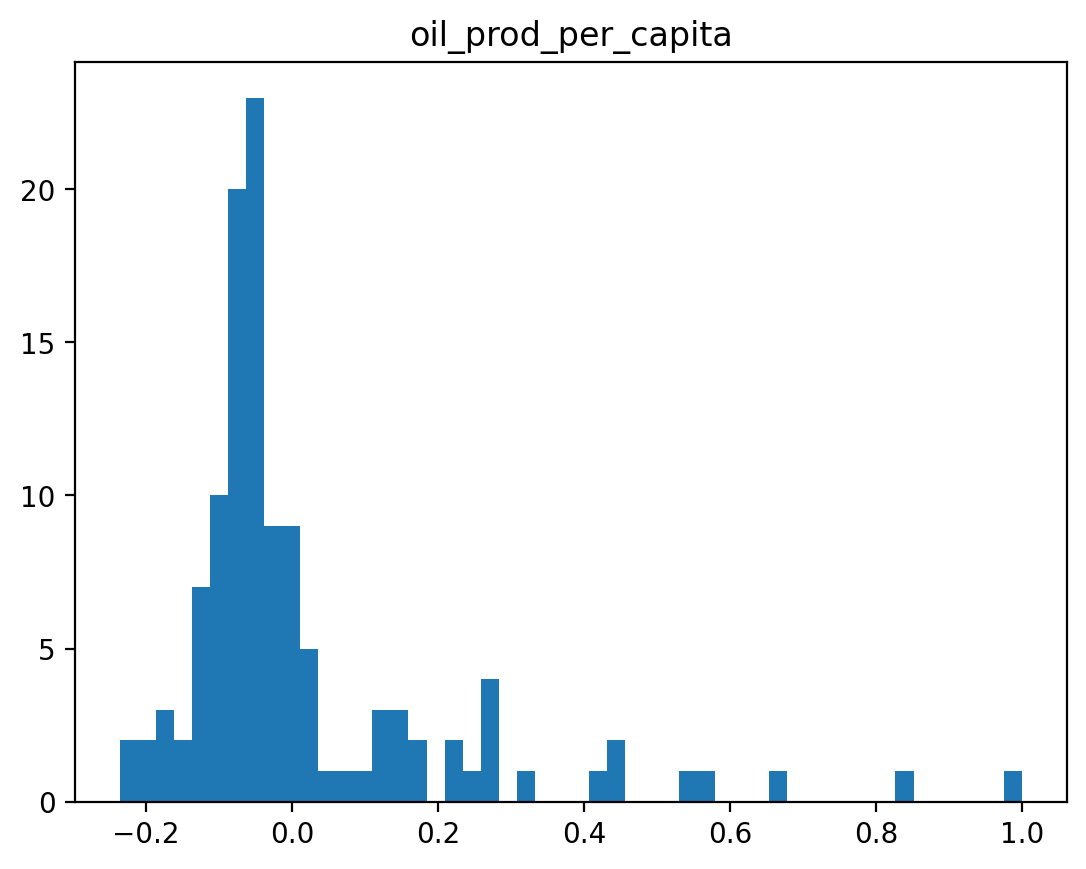

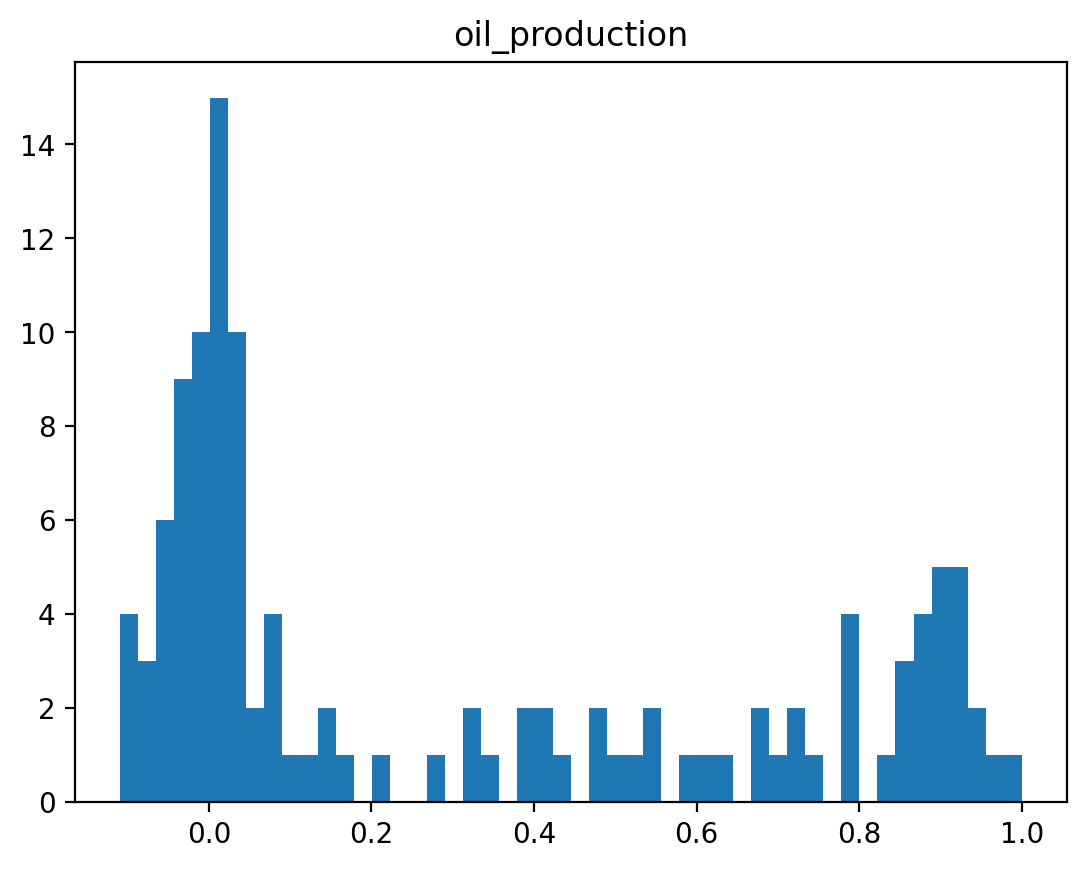

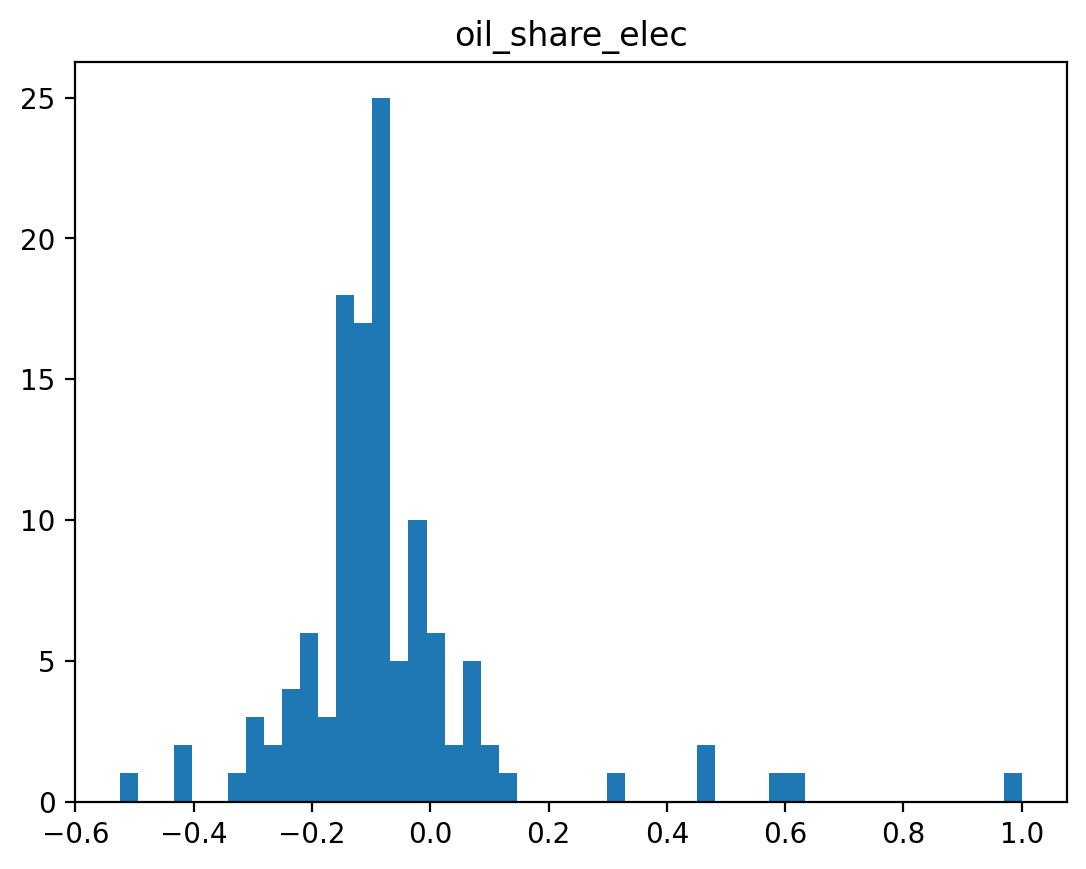

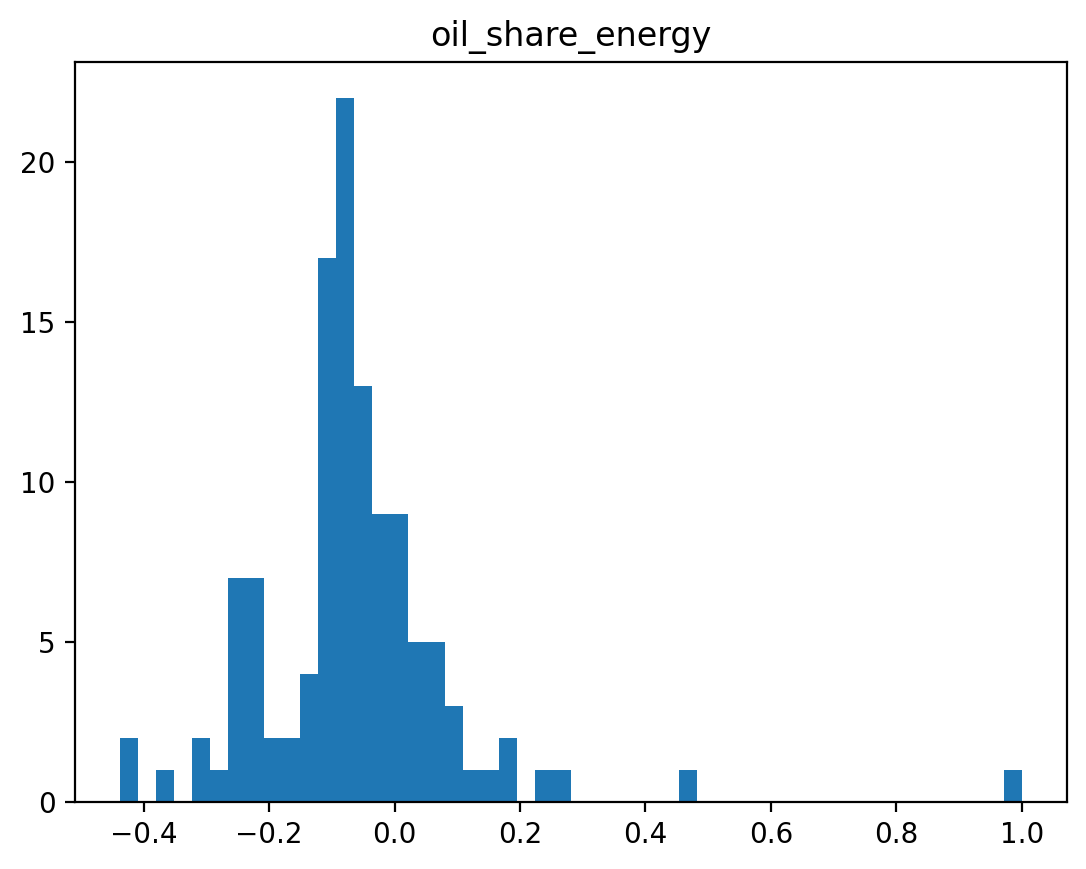

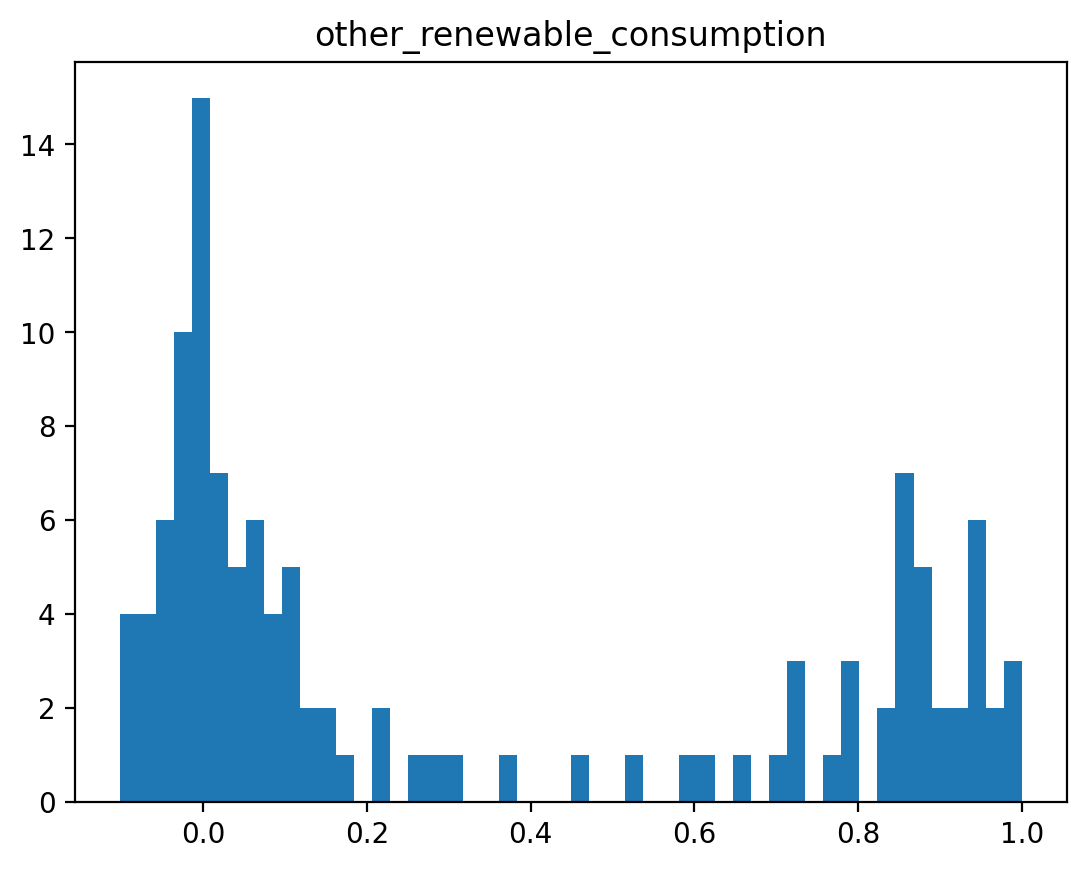

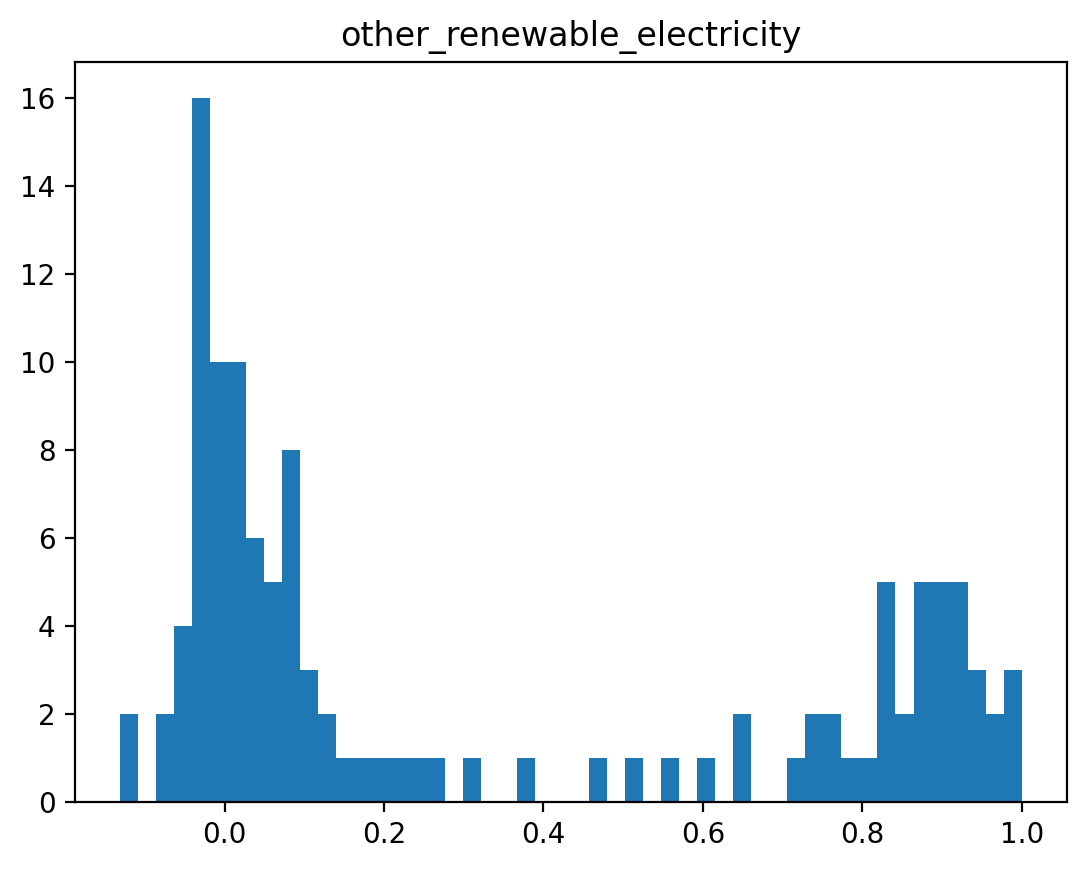

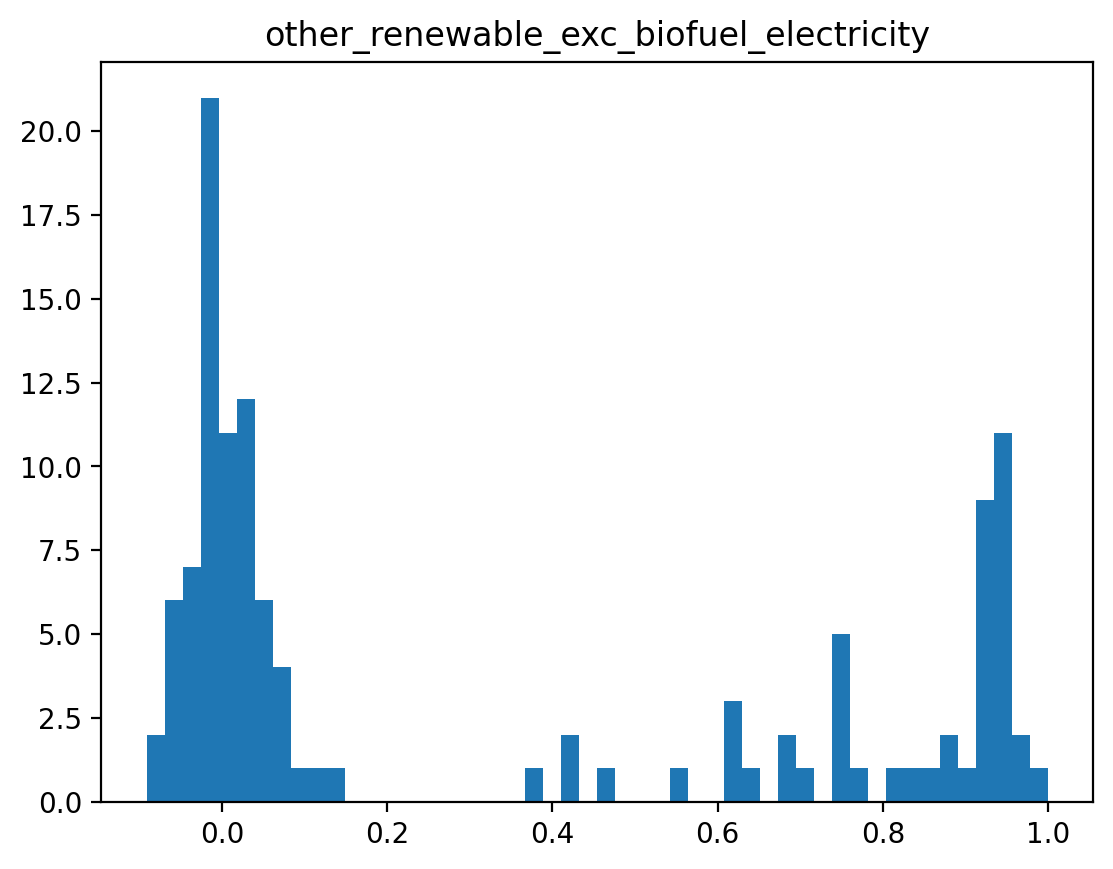

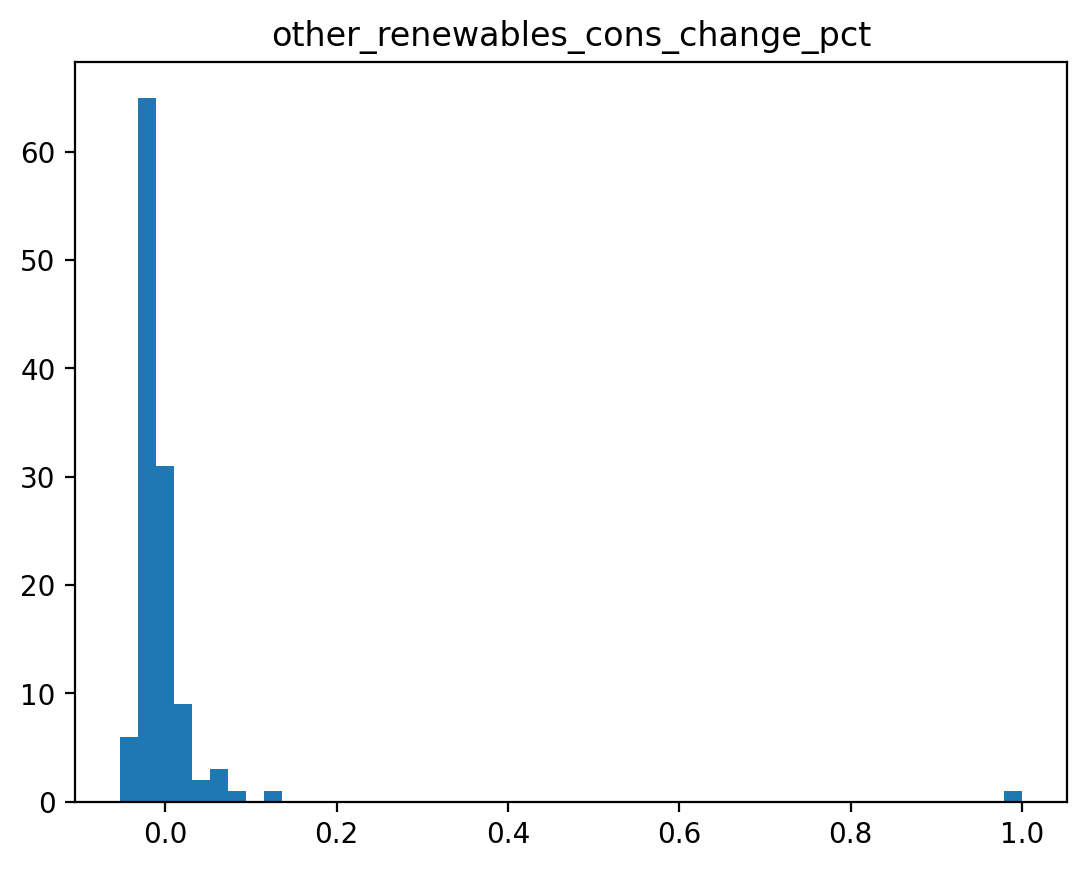

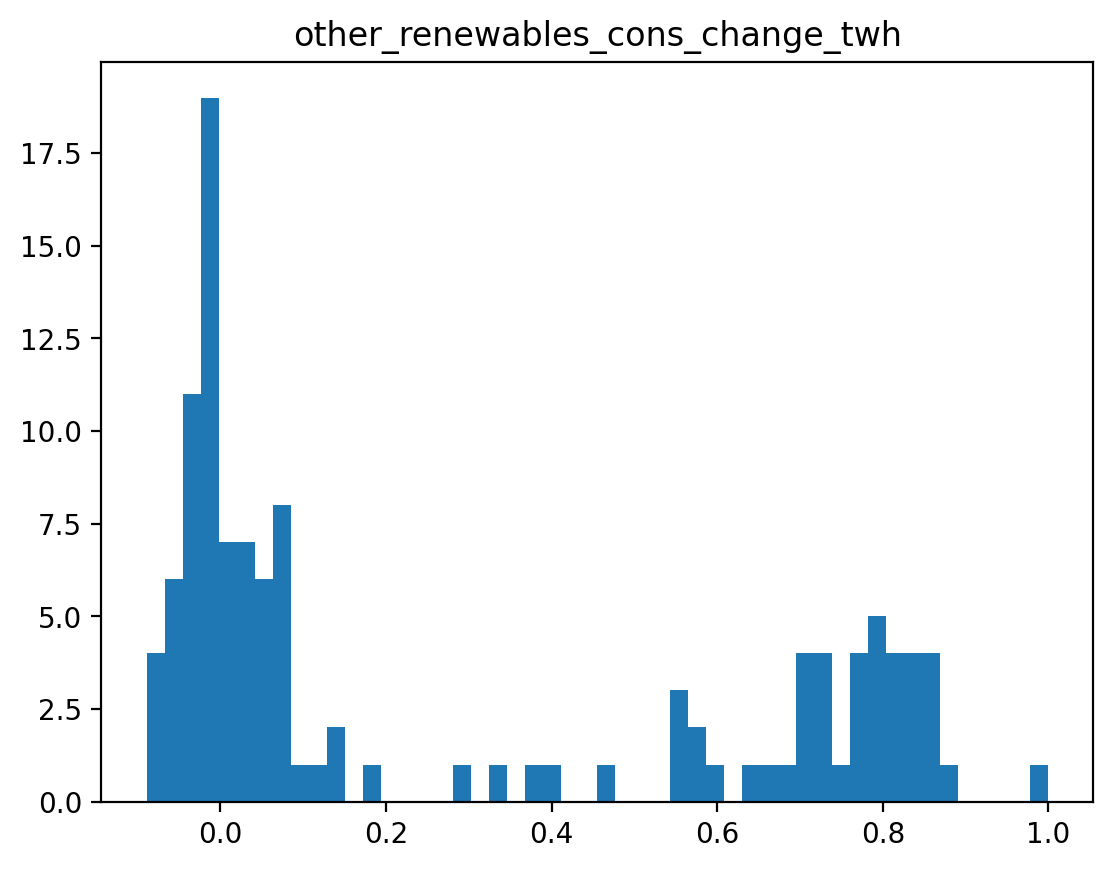

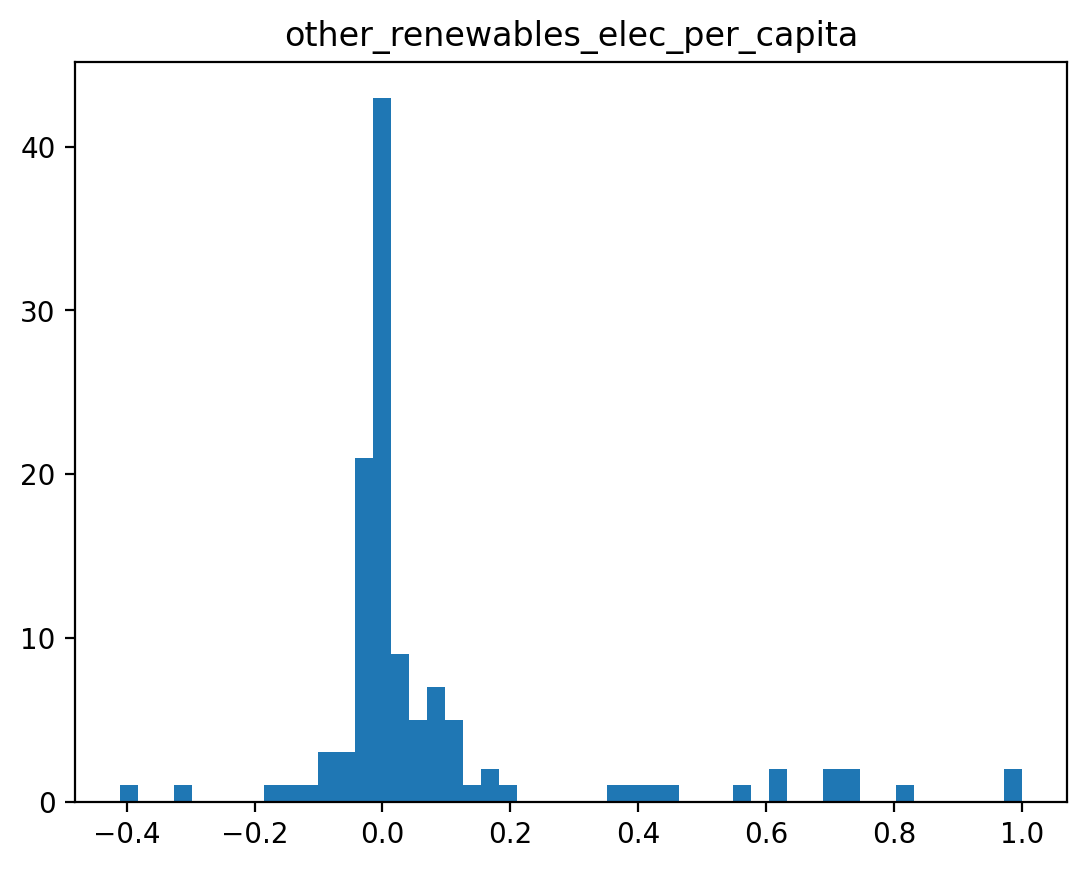

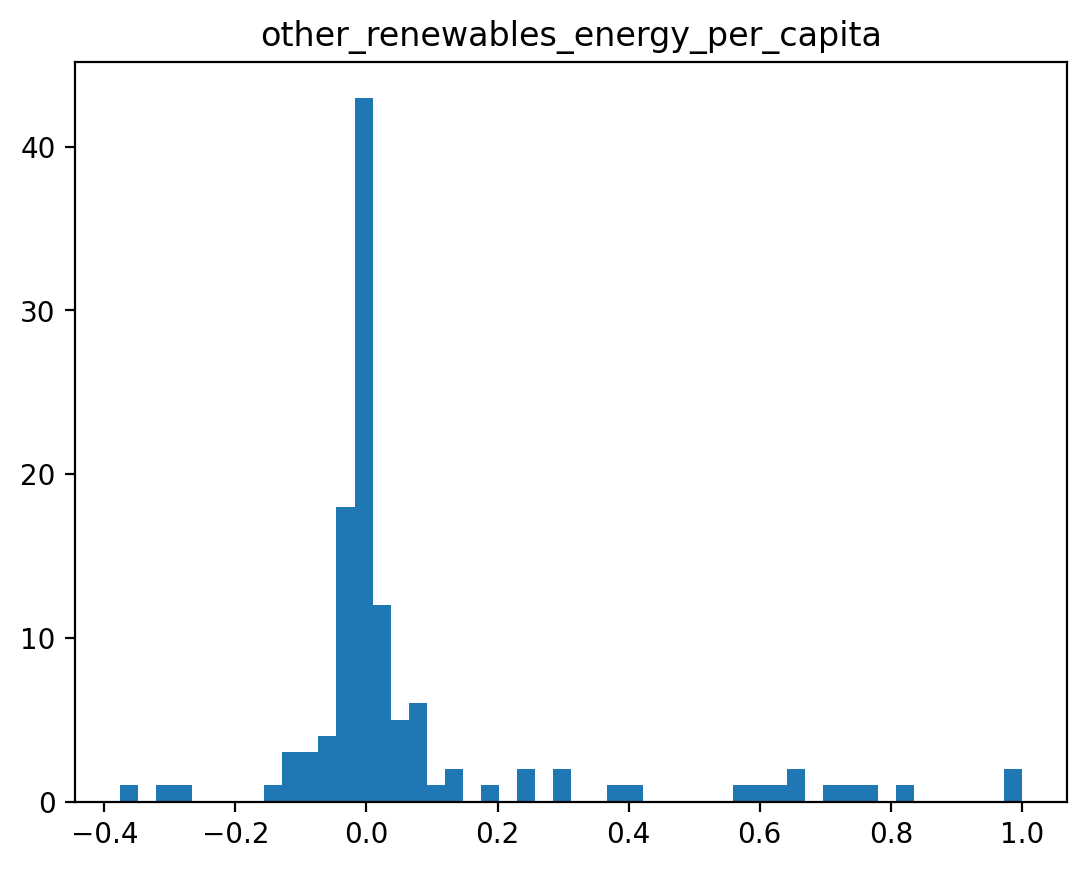

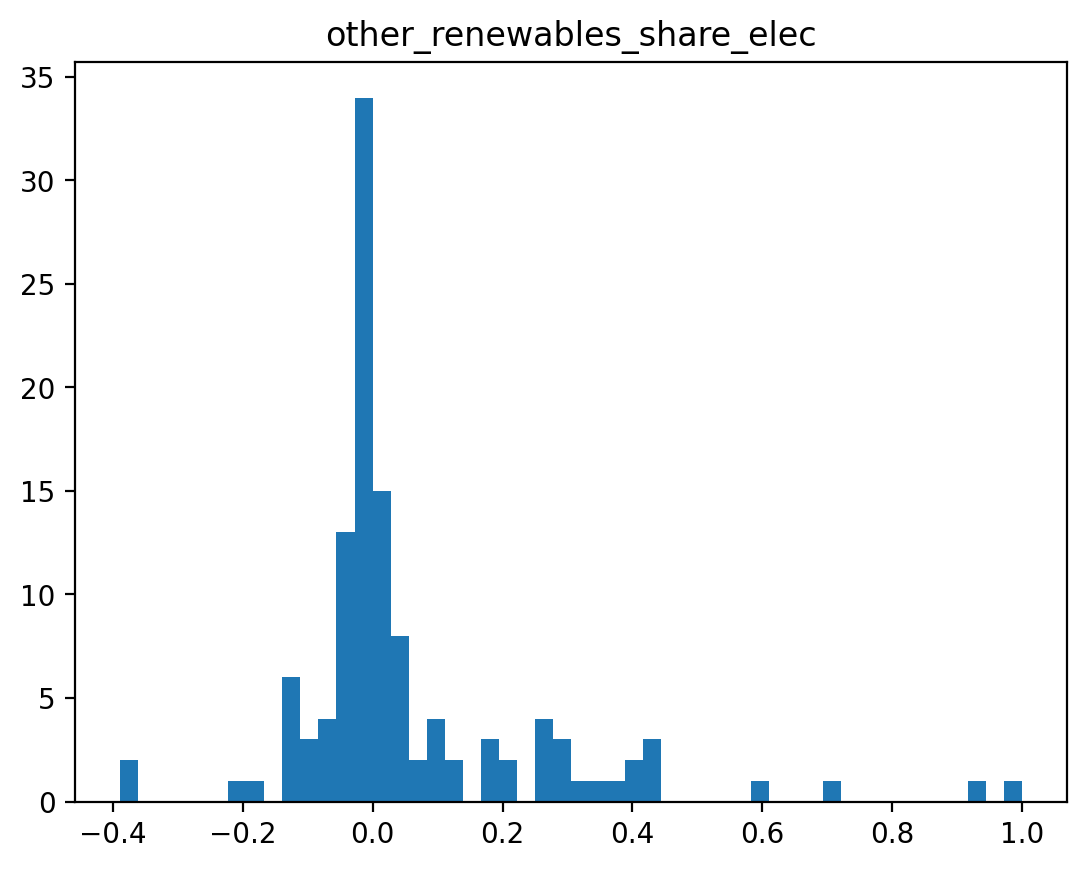

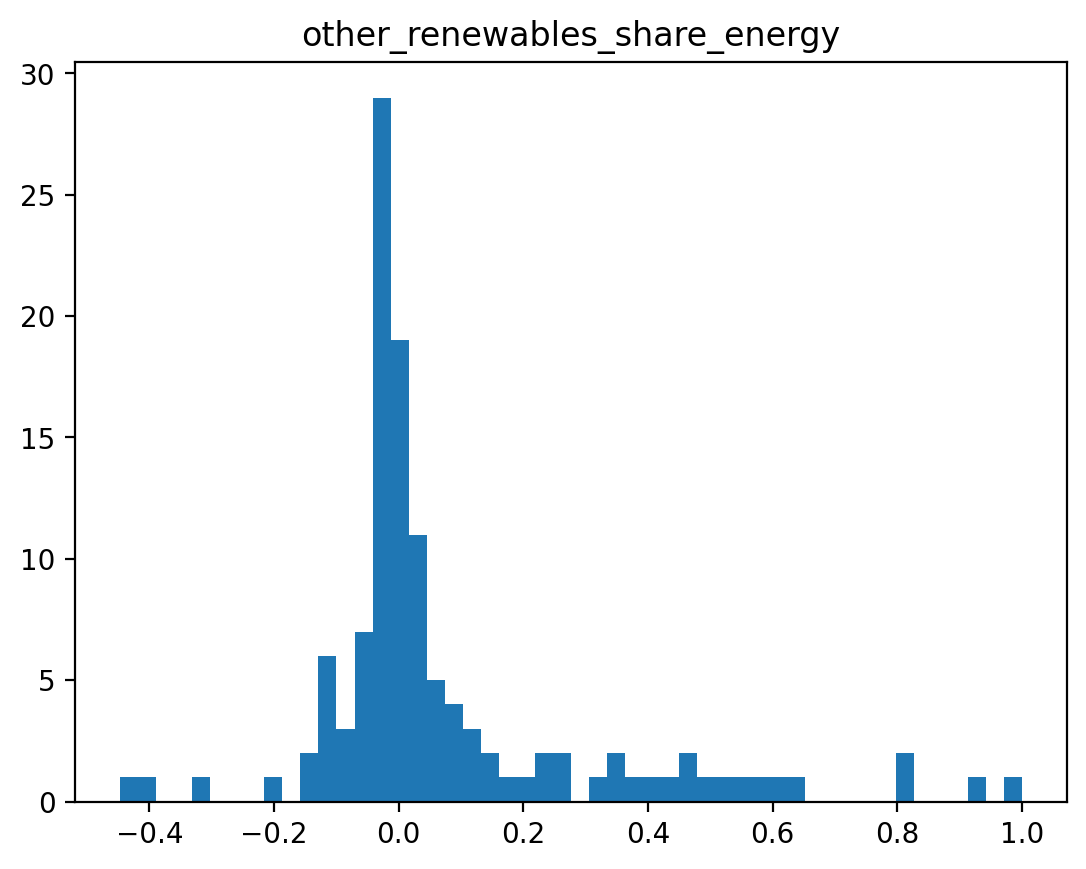

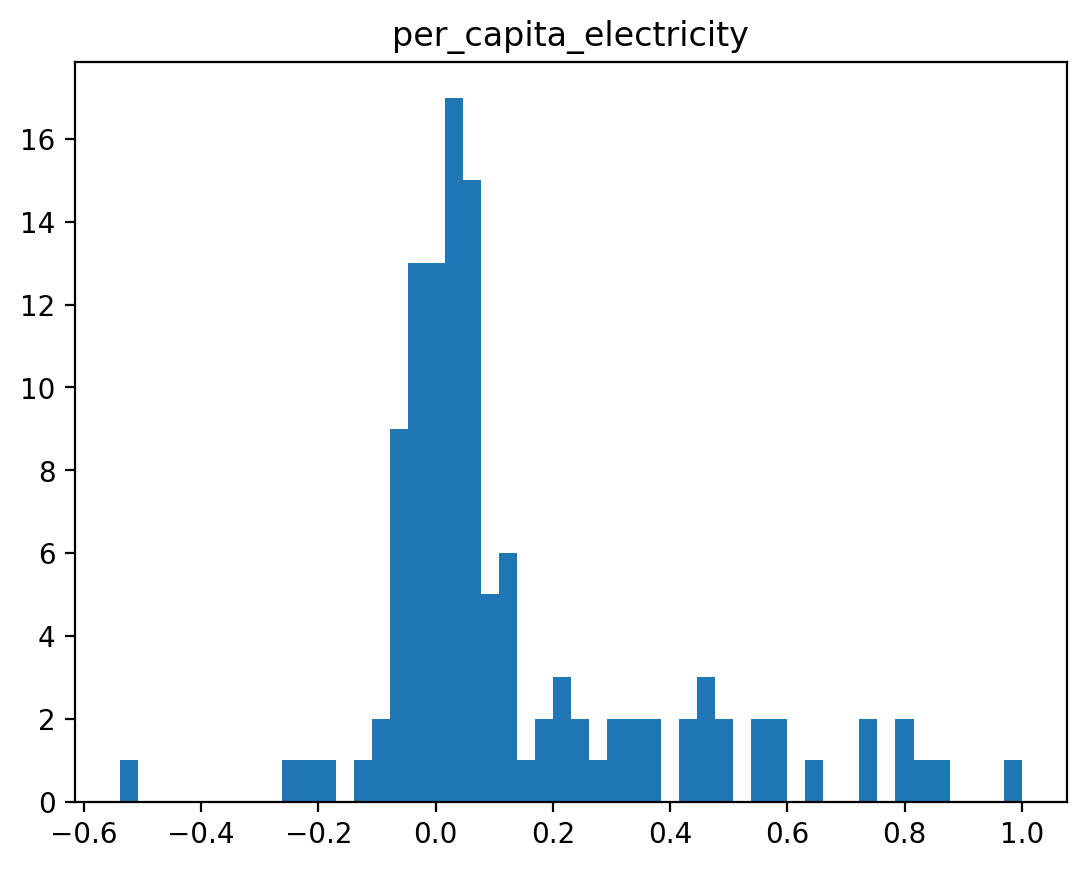

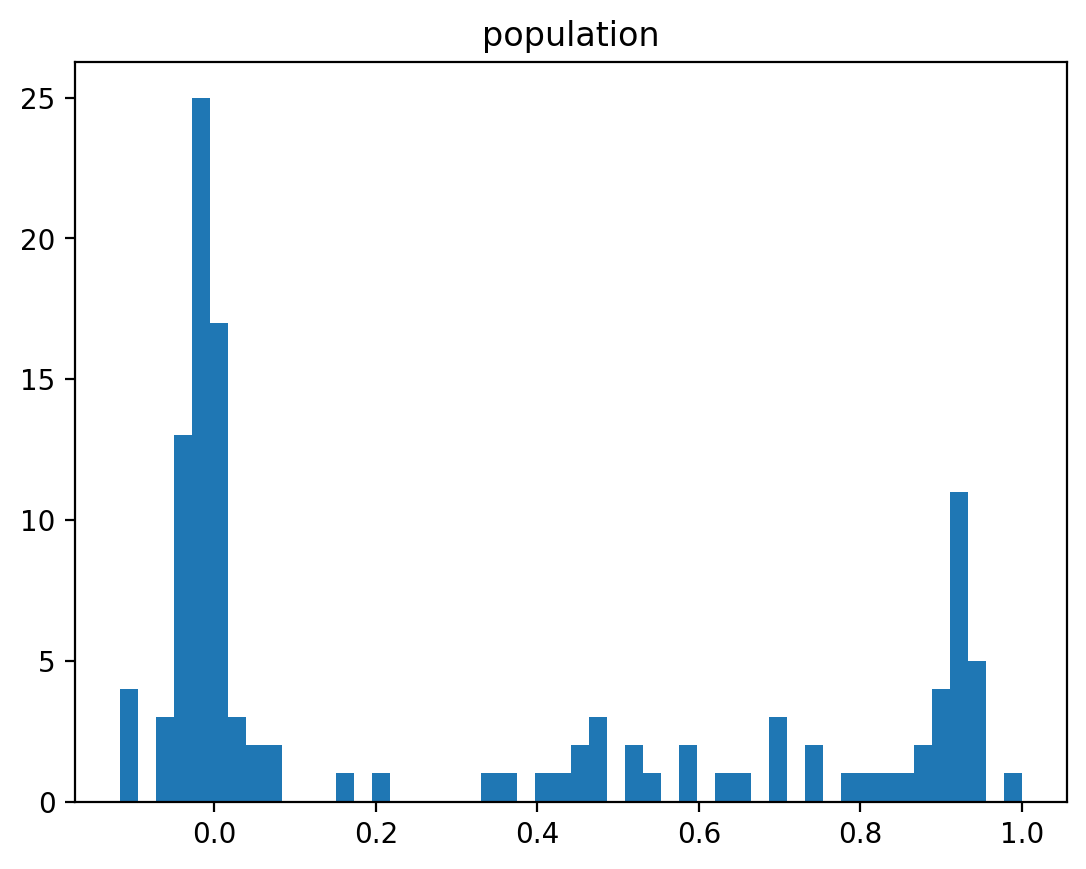

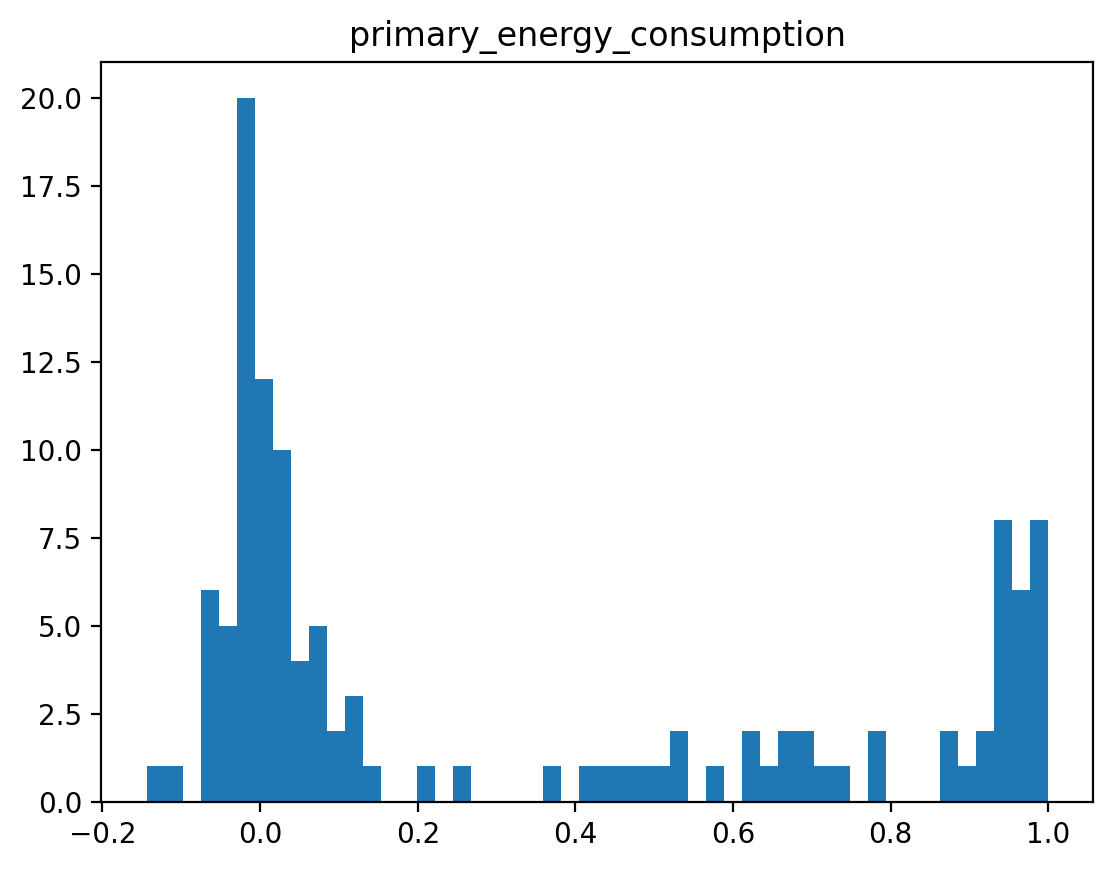

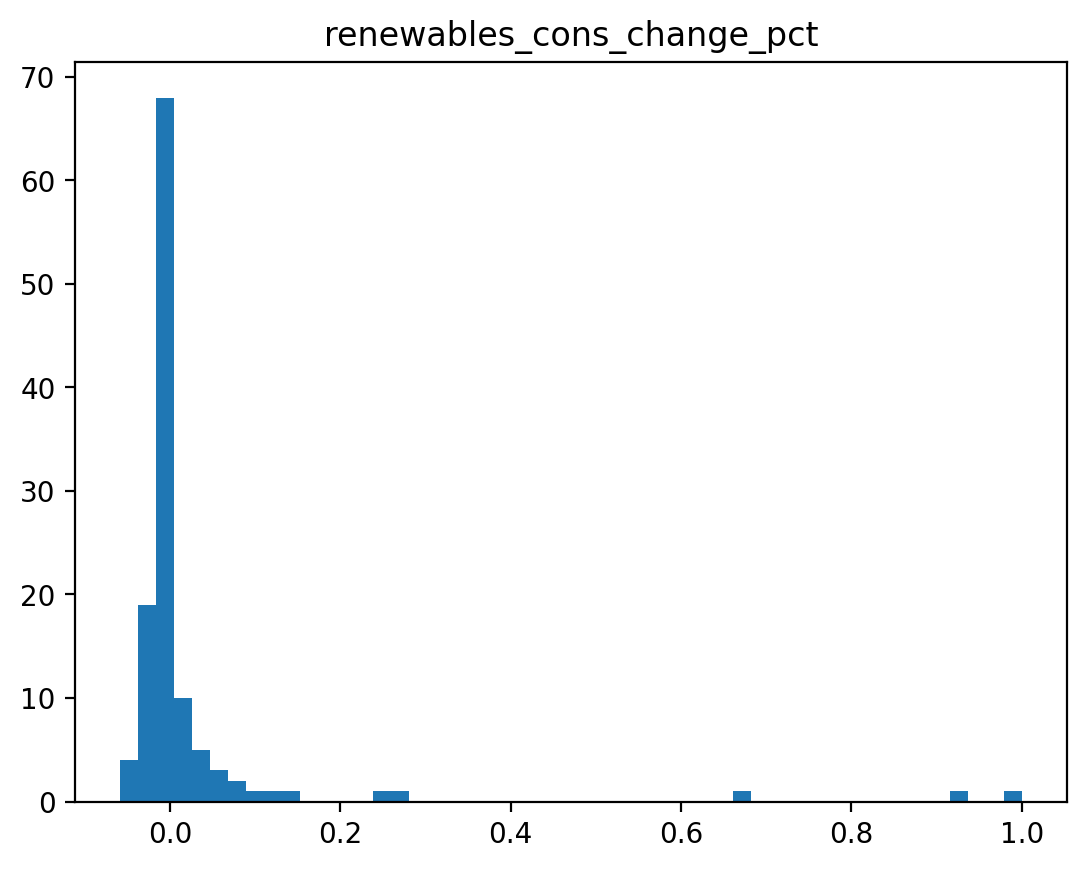

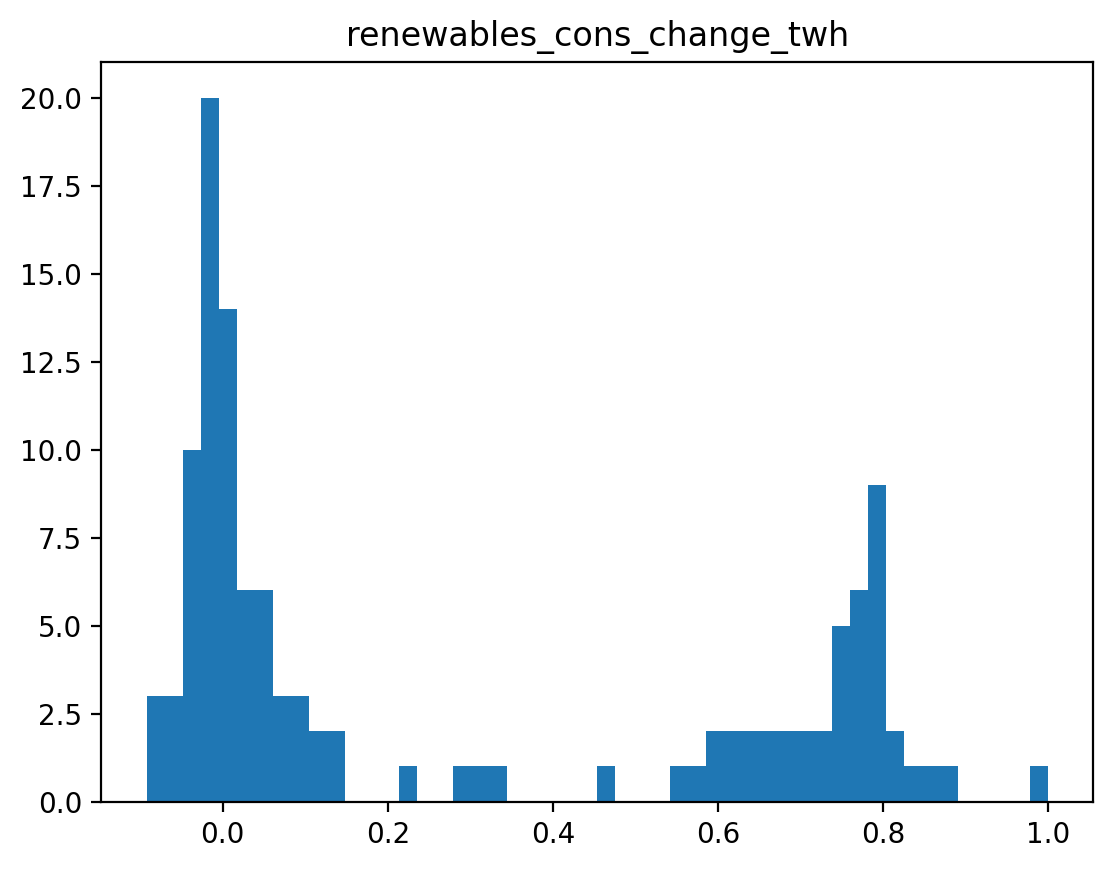

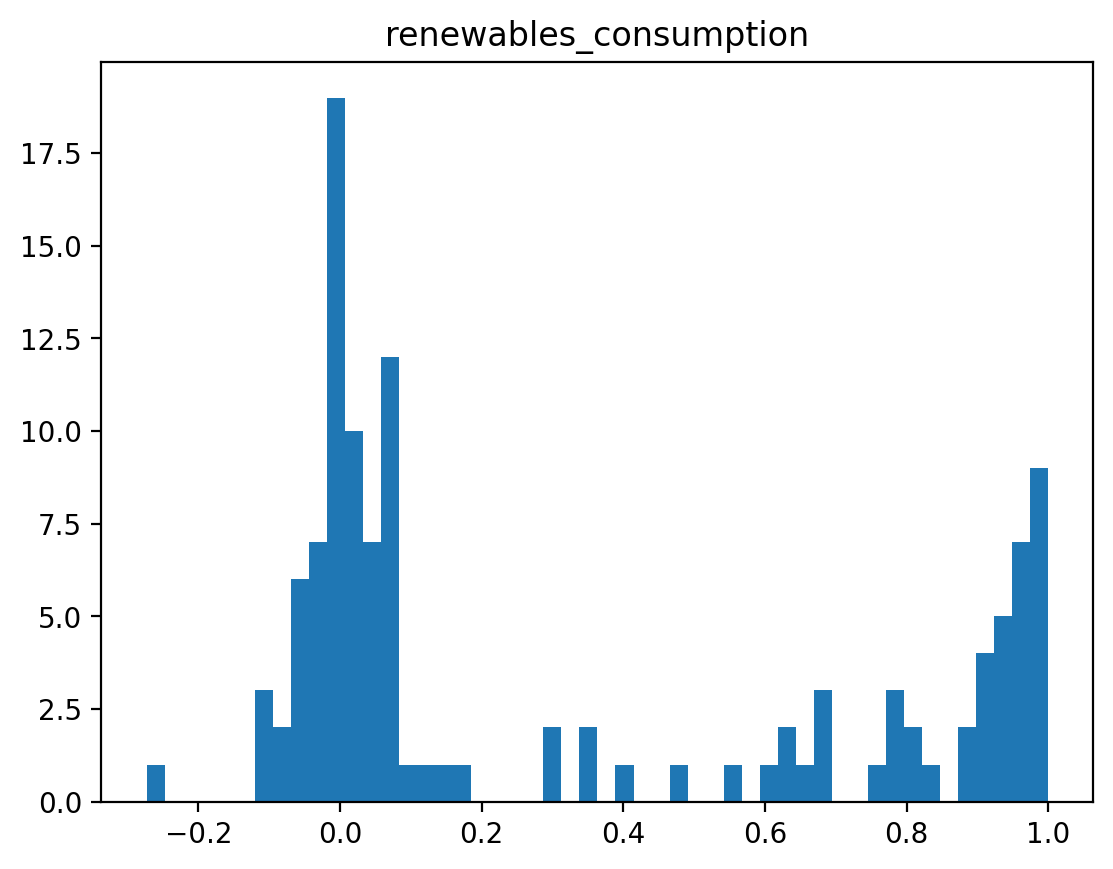

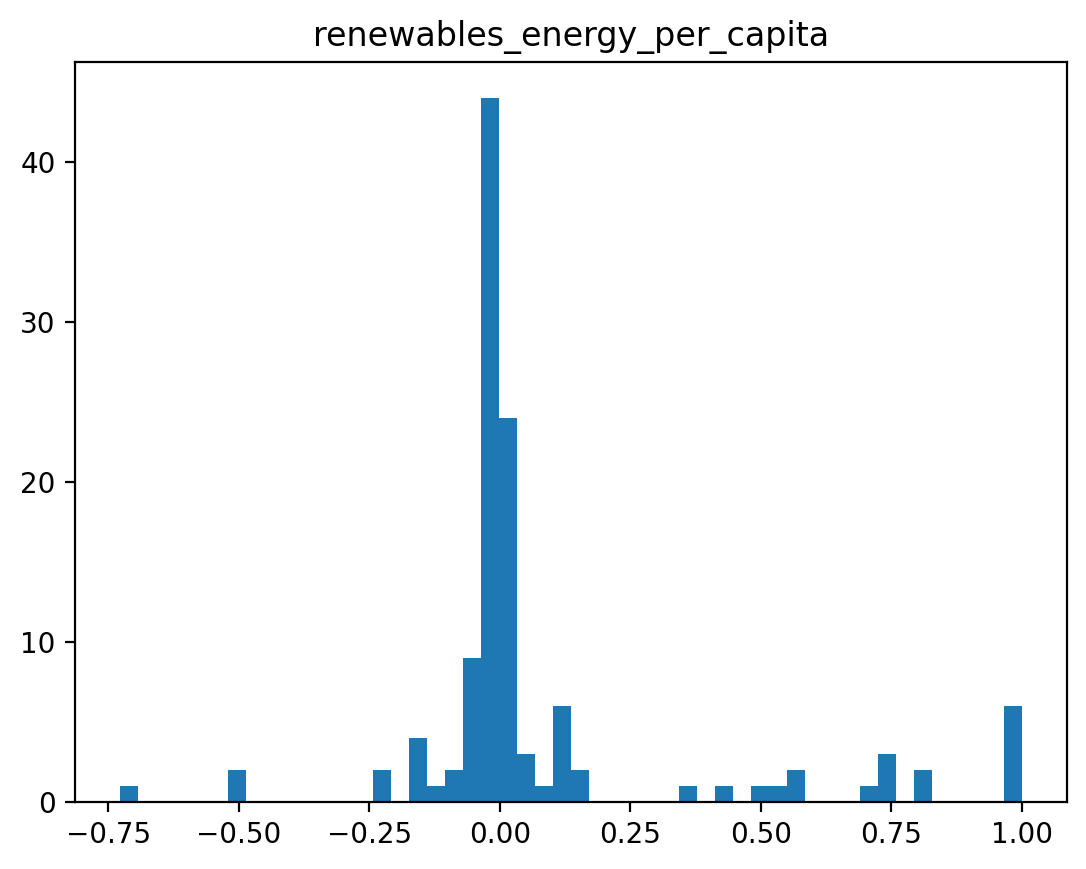

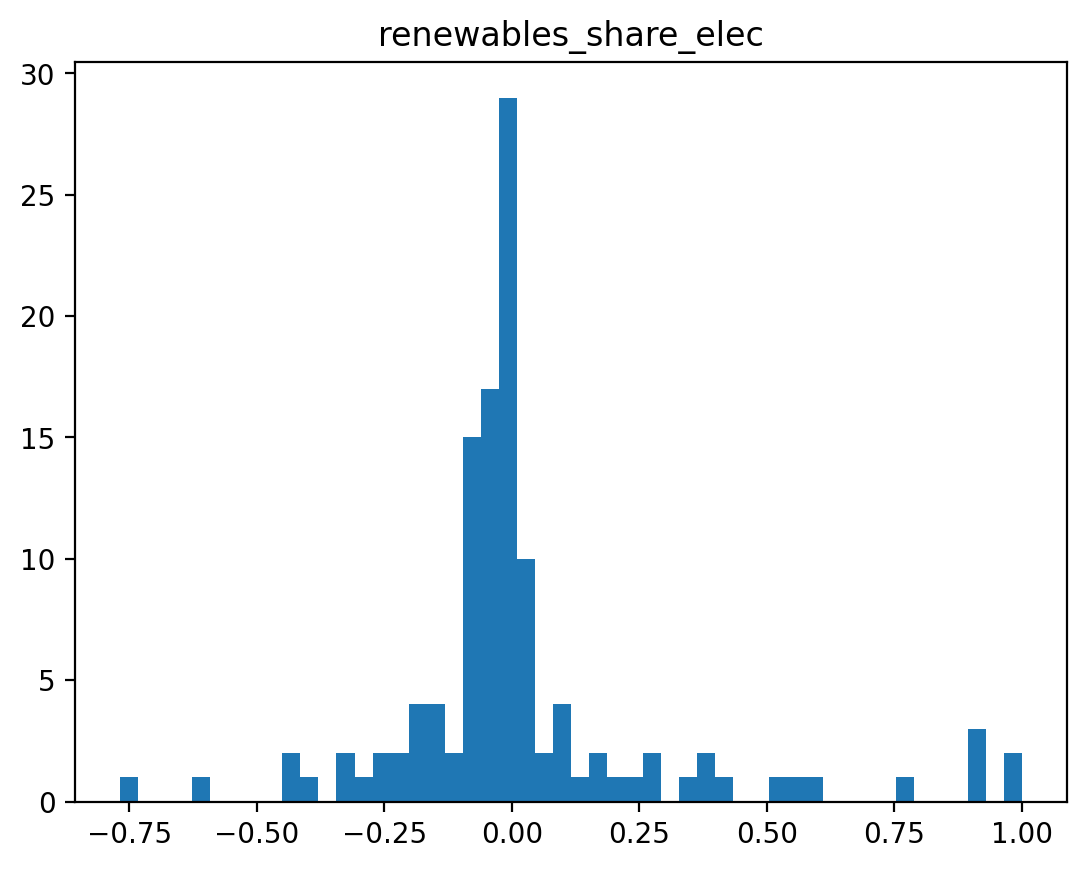

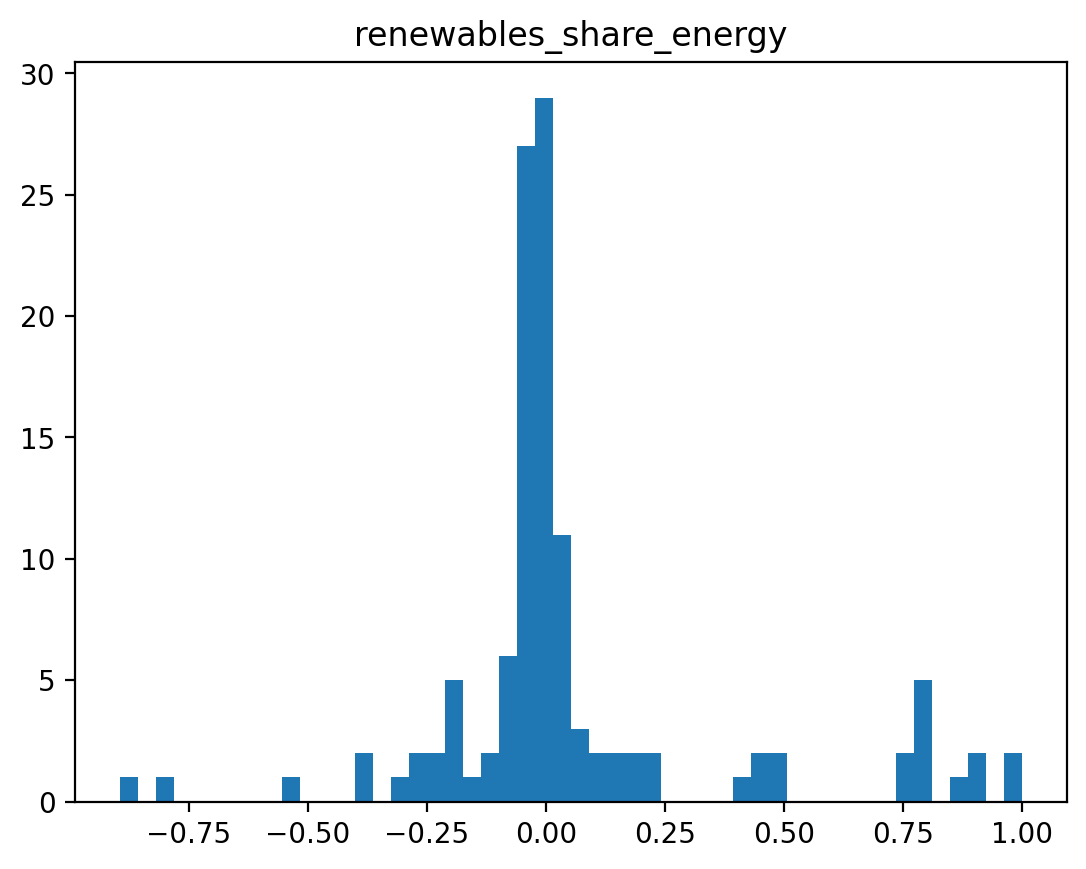

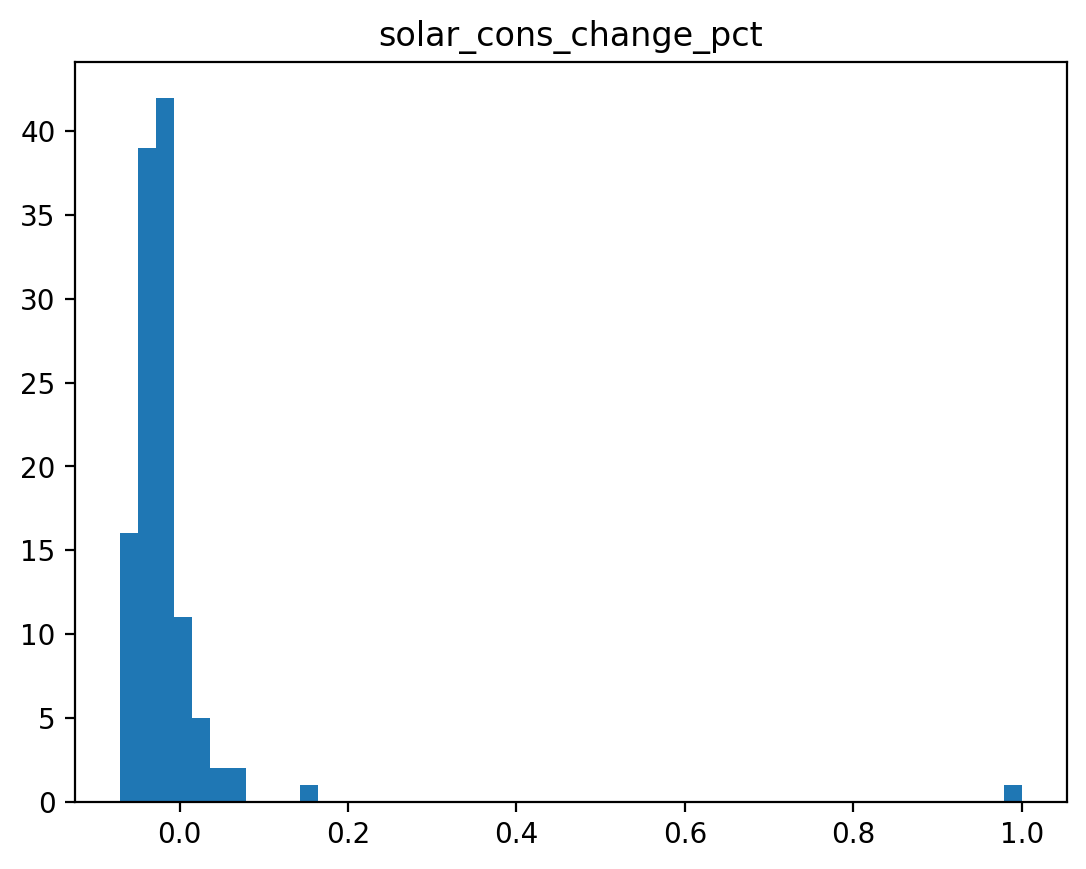

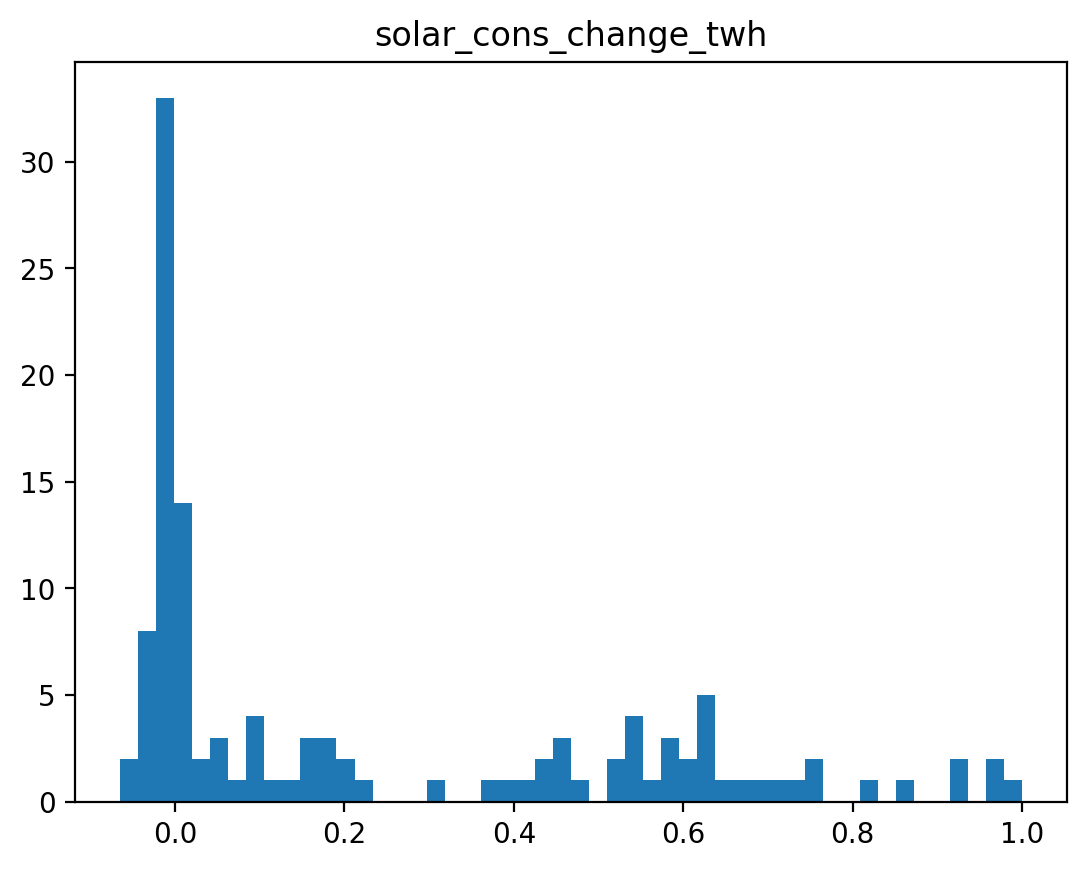

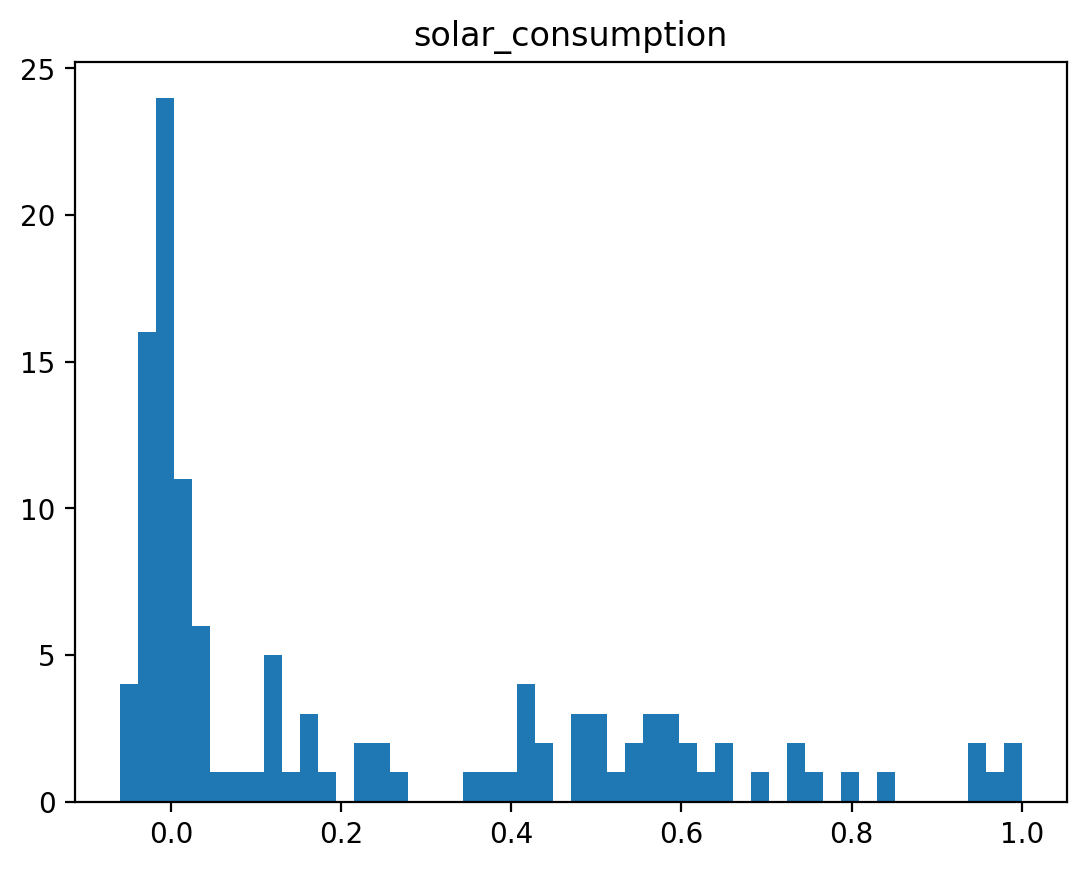

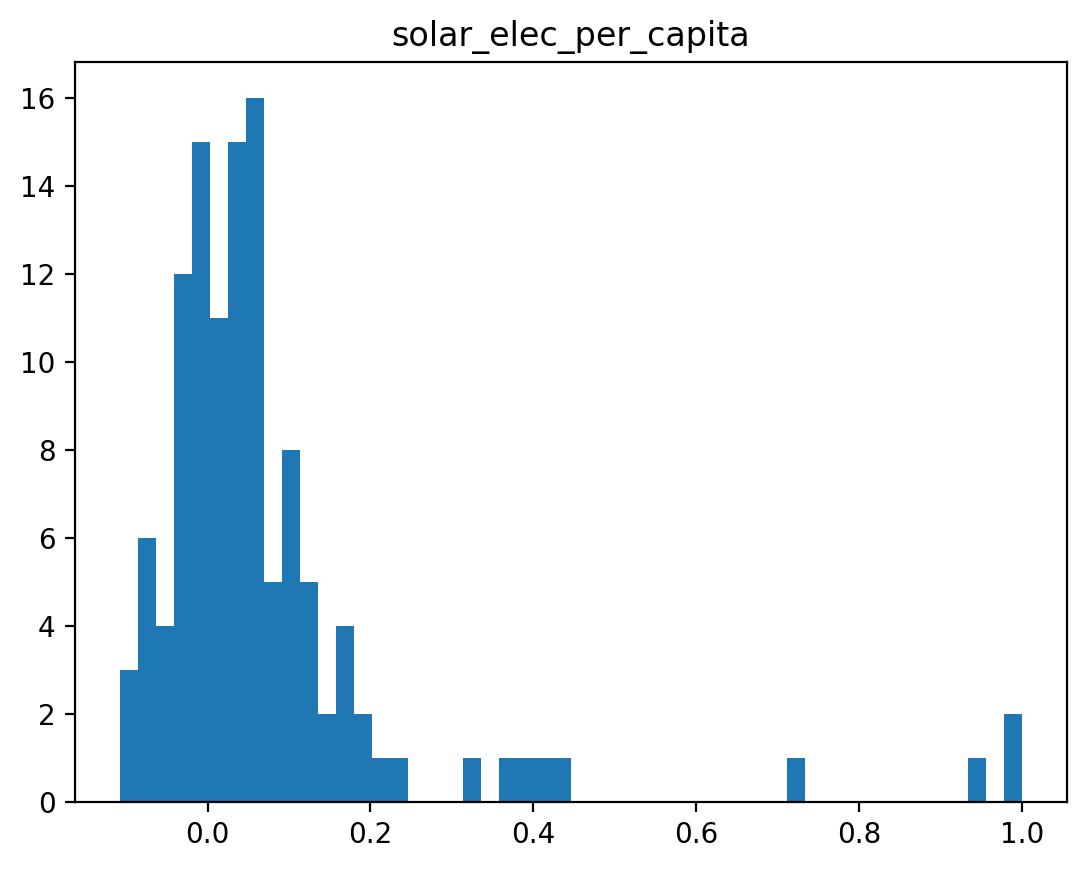

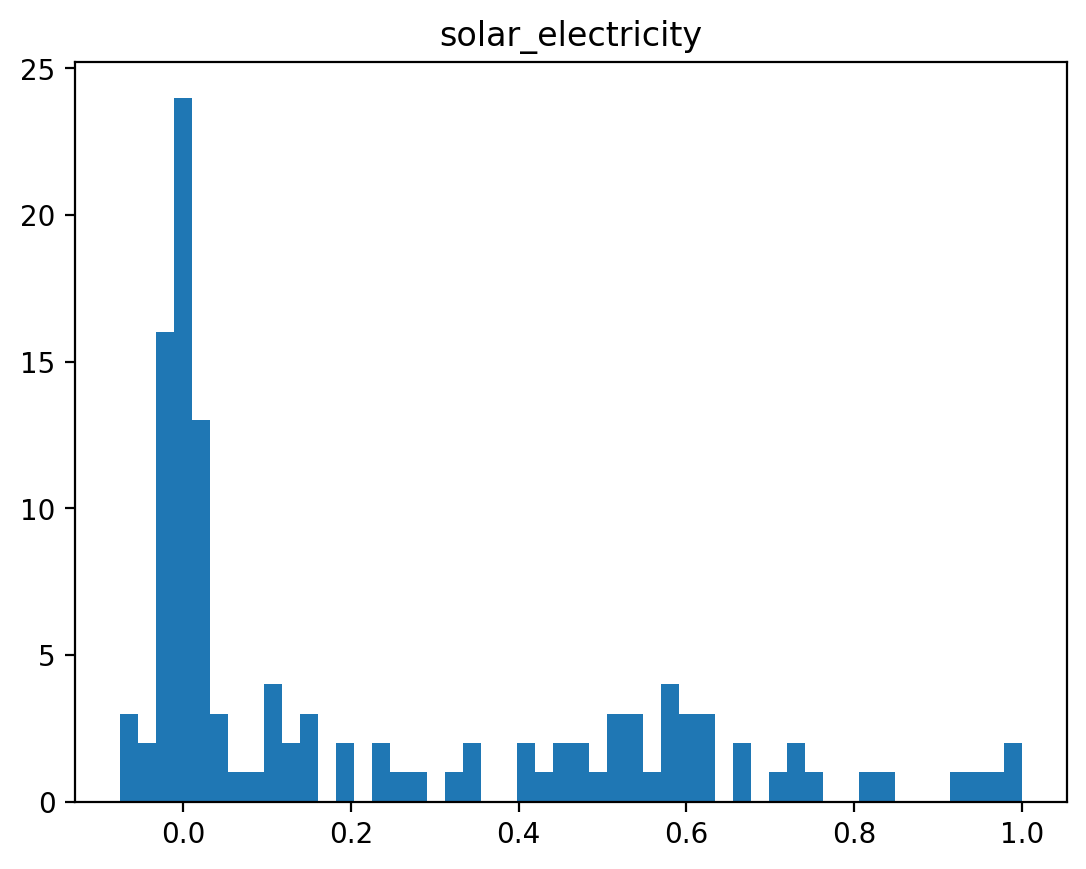

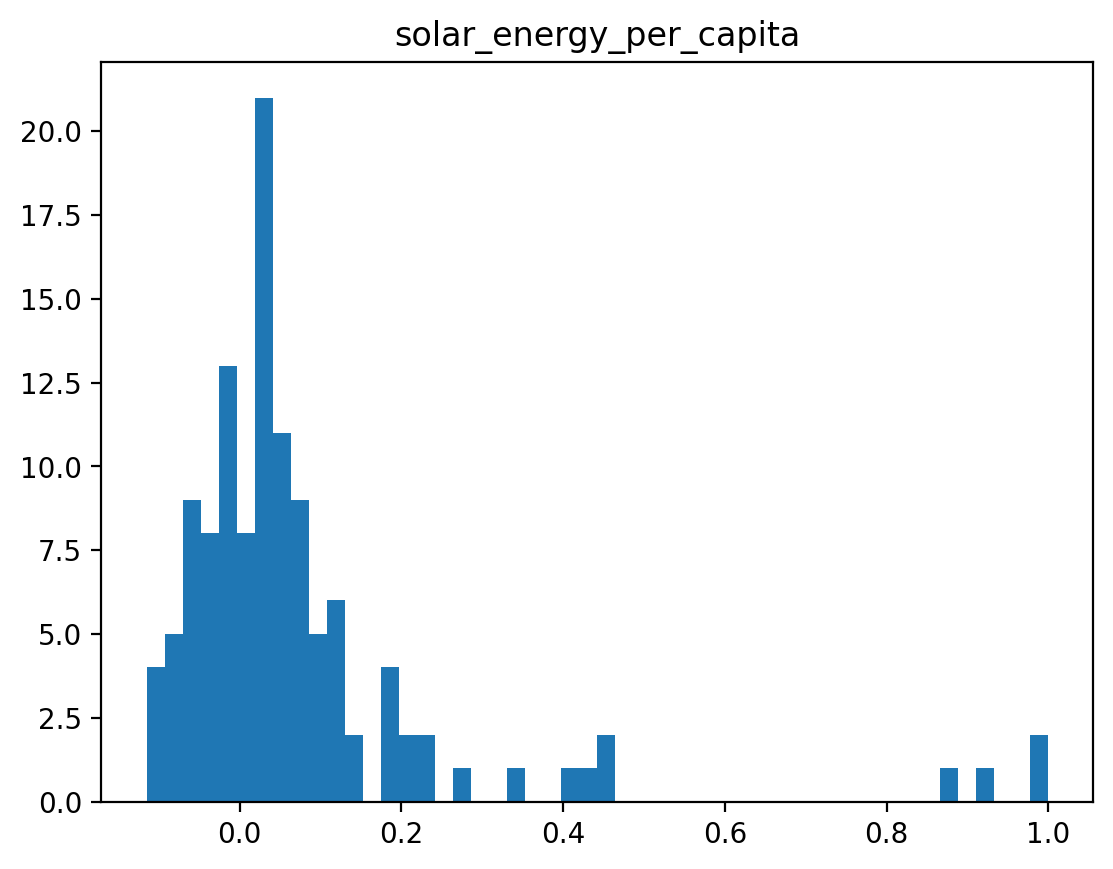

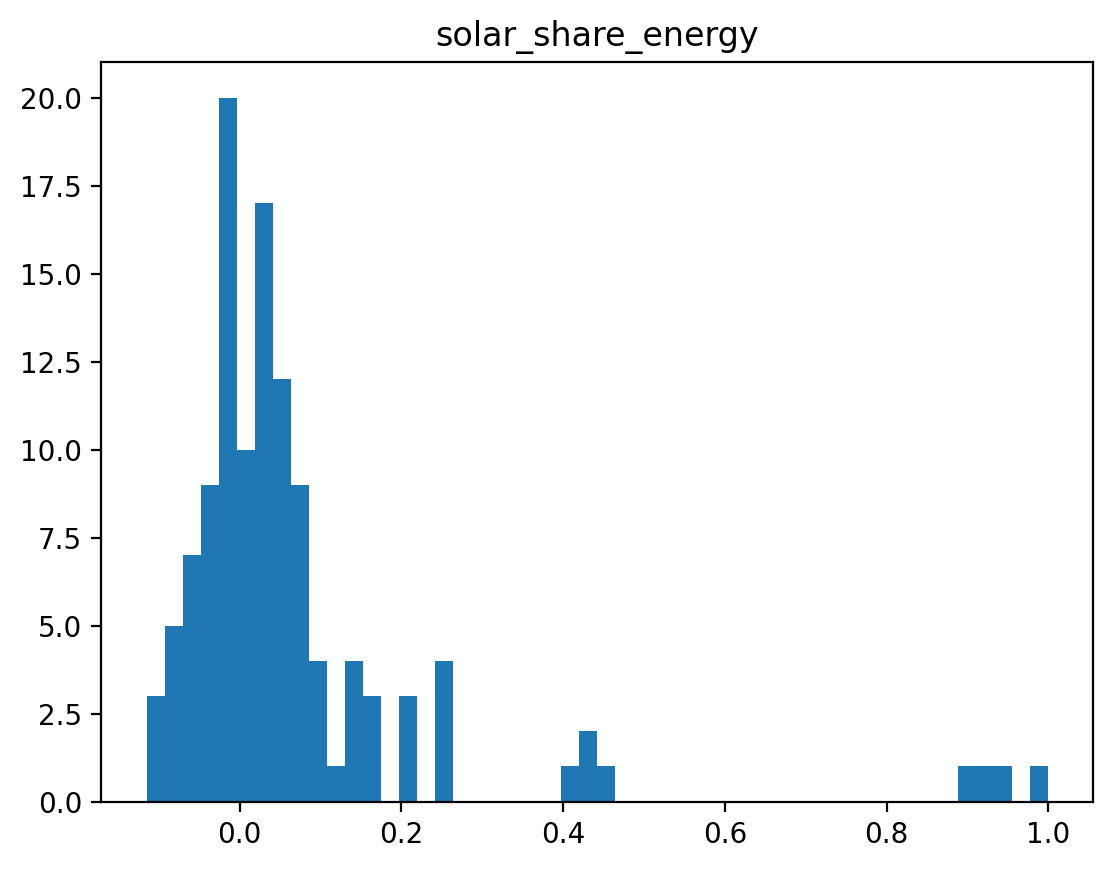

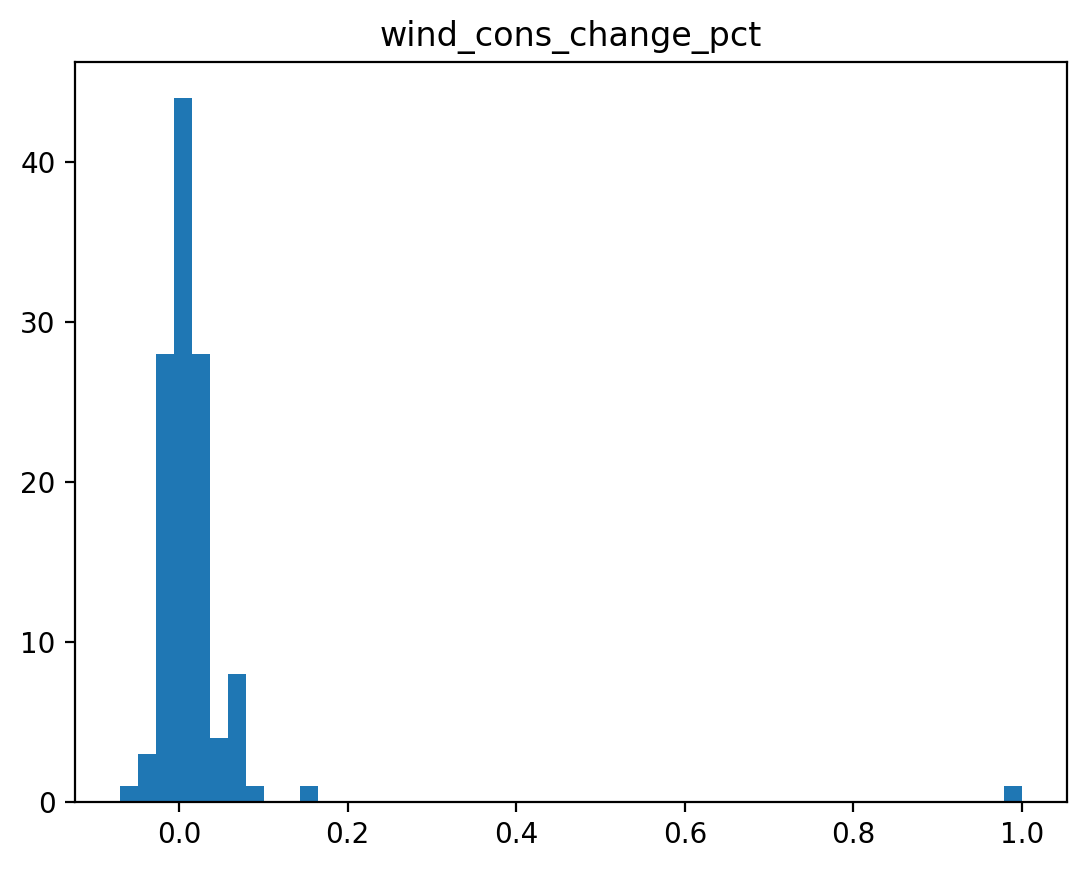

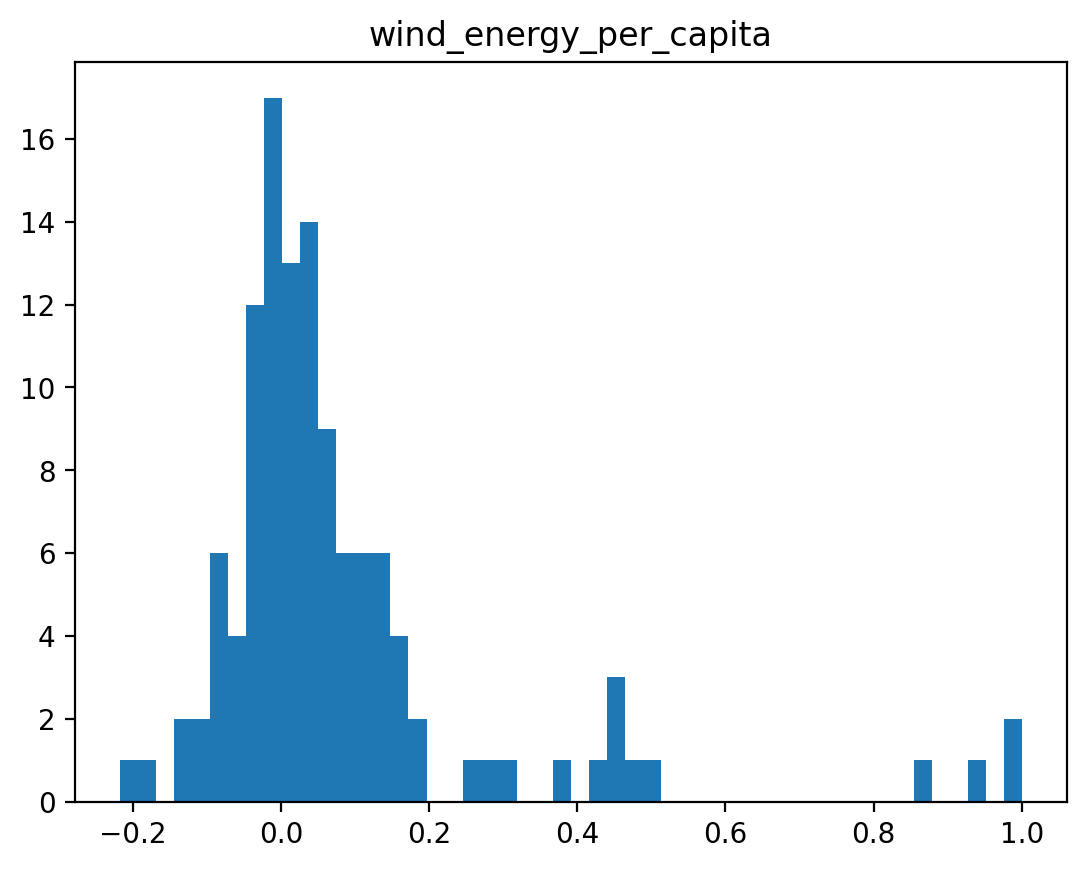

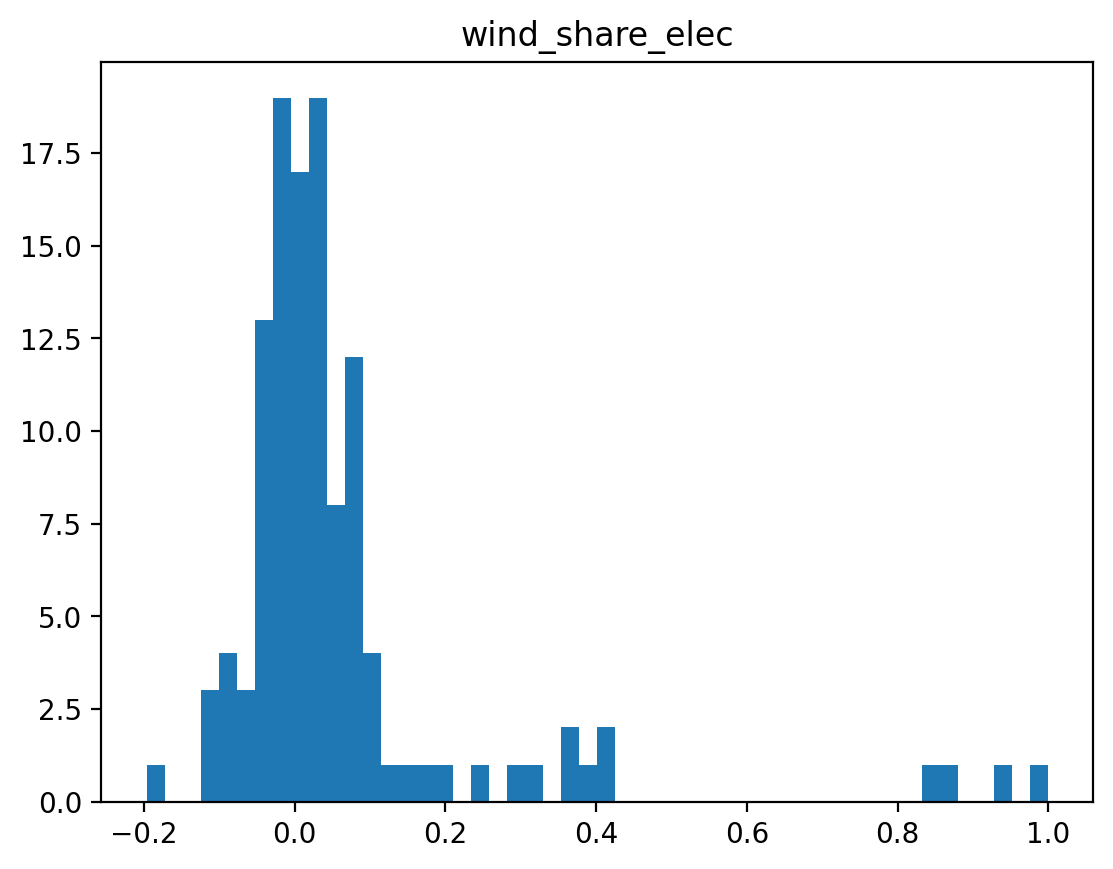

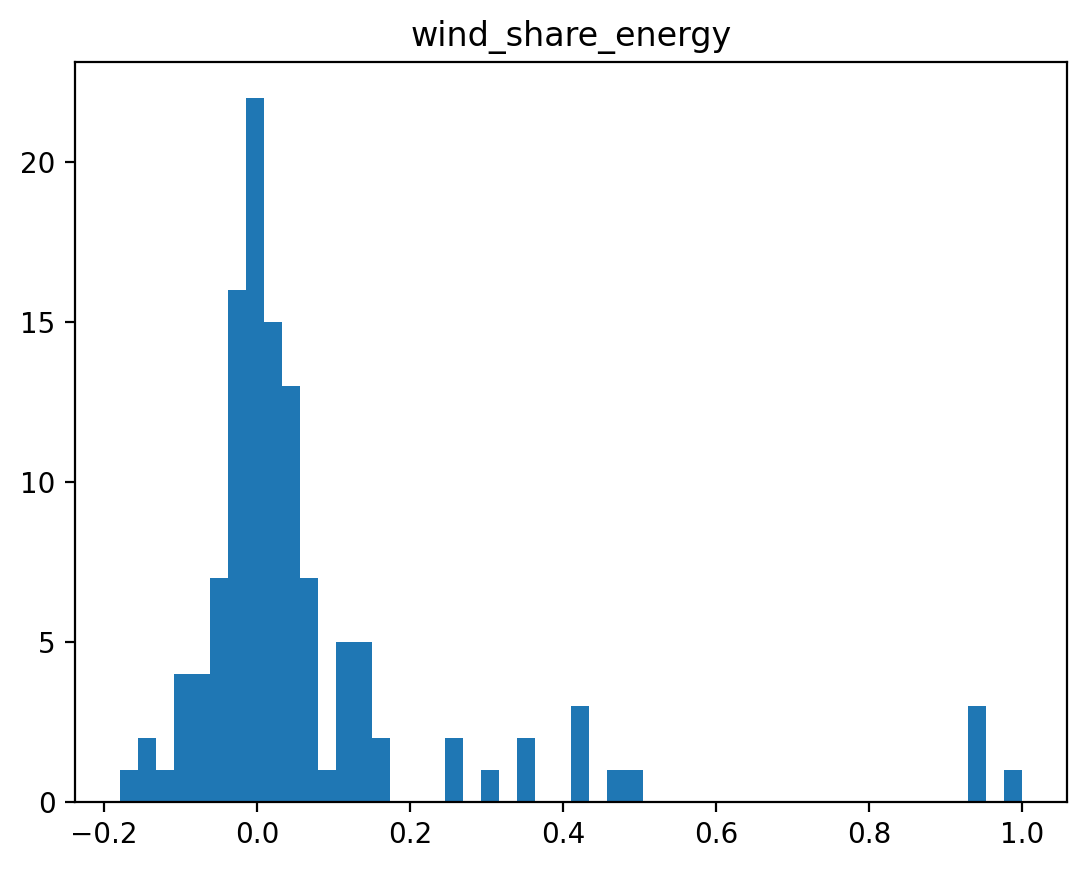

In [21]:
dicts = {}
for i in columns_names:
    dicts[i] = df_corr.corr()[i].values.mean()
    plt.hist(df_corr.corr()[i].values, 50)
    plt.title(i)
    plt.show()

In [22]:
dicts

{'biofuel_cons_change_pct': -0.009012433273969929,
 'biofuel_cons_change_twh': 0.21373076697102367,
 'biofuel_cons_per_capita': 0.10880780720253518,
 'biofuel_consumption': 0.27800149913442207,
 'biofuel_elec_per_capita': 0.06928352243692983,
 'biofuel_electricity': 0.3394197303487125,
 'biofuel_share_elec': 0.044764693426039955,
 'biofuel_share_energy': 0.06914303812929397,
 'carbon_intensity_elec': -0.06461769344558121,
 'coal_cons_change_pct': 0.005141368516332102,
 'coal_cons_change_twh': 0.1264477294722791,
 'coal_cons_per_capita': 0.058576243441372744,
 'coal_consumption': 0.30183928469081756,
 'coal_elec_per_capita': 0.09408525357682196,
 'coal_electricity': 0.32189336837362725,
 'coal_prod_change_pct': 0.0018447084554549928,
 'coal_prod_change_twh': 0.13722828163498196,
 'coal_prod_per_capita': 0.06130978178779341,
 'coal_production': 0.3193298104868682,
 'coal_share_elec': 0.054751736691690665,
 'coal_share_energy': 0.027281767575763793,
 'electricity_generation': 0.3311903536

In [23]:
max_key = max(dicts, key=dicts.get)
max_key

'biofuel_electricity'

In [24]:
min_key = min(dicts, key=dicts.get)
min_key

'fossil_share_energy'

## Some specific variables

In [128]:
df_per_capita = df.loc[:, ['gdp_per_capita', 'population',
                      'biofuel_elec_per_capita',
                      'coal_elec_per_capita',
                      'gas_elec_per_capita',
                      'hydro_elec_per_capita',
                      'low_carbon_elec_per_capita',
                      'nuclear_elec_per_capita',
                      'oil_elec_per_capita',
                      'other_renewables_elec_per_capita',
                      'renewables_elec_per_capita',
                      'solar_elec_per_capita',
                      'wind_elec_per_capita']]

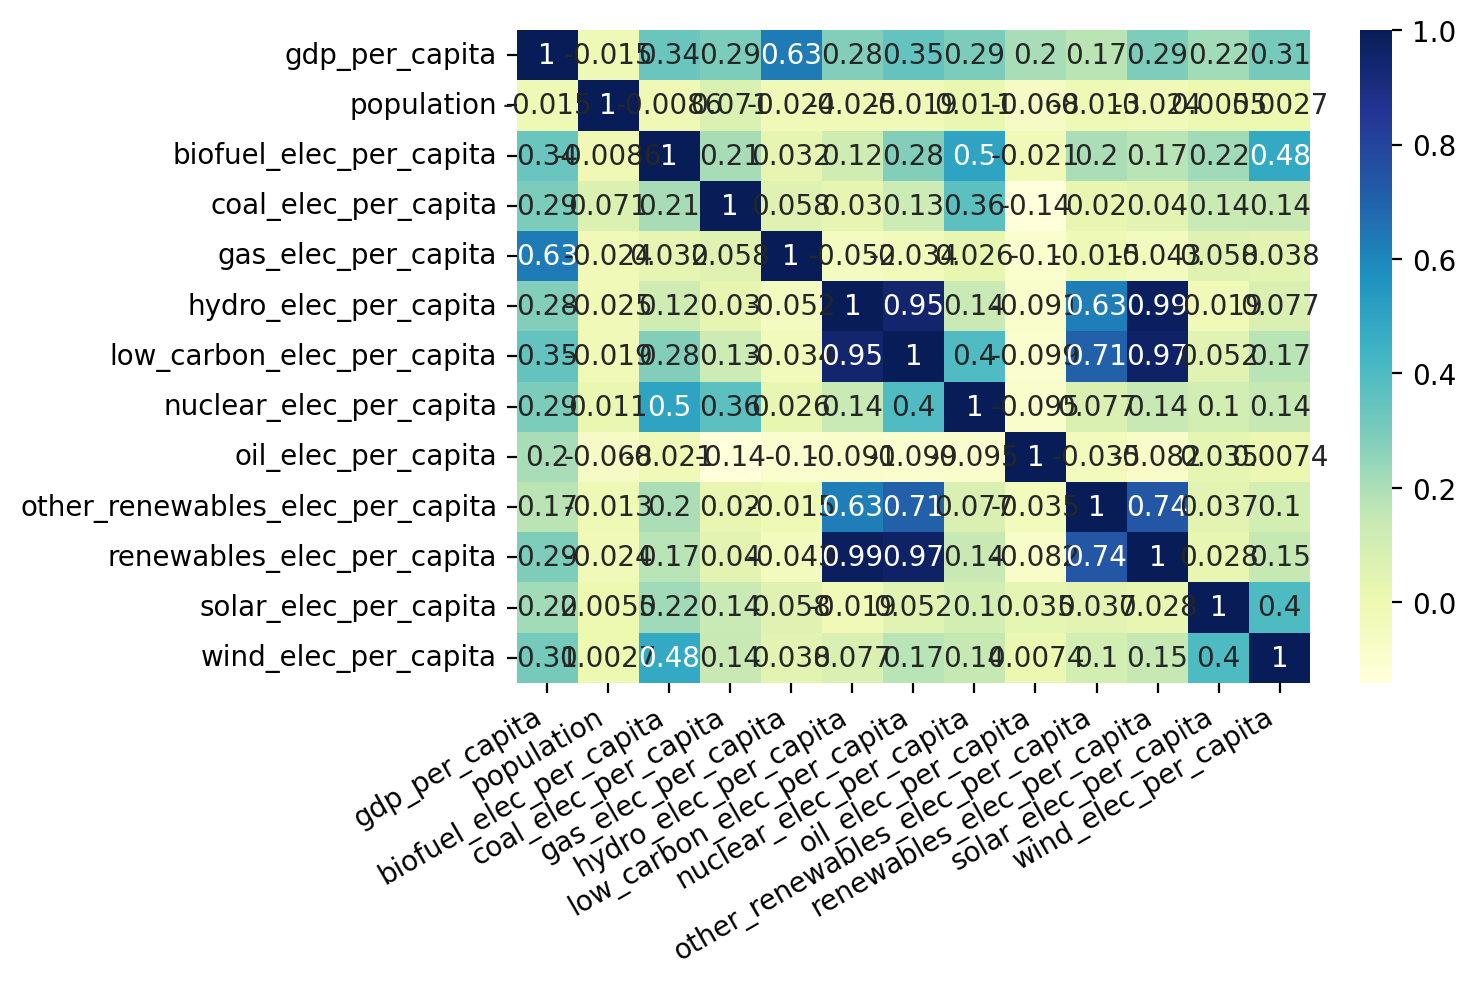

In [130]:
corr_plot_data = corr_plot(df_per_capita)
plt.gcf().autofmt_xdate()
plt.show()

# By  Countries

We have to make sure, which gharp is going to be plotted

In [30]:
usa = df.loc[df.loc[:, 'country'] == 'United States', ]
china = df.loc[df.loc[:, 'country'] == 'China', ]
russia = df.loc[df.loc[:, 'country'] == 'Russia', ]
sweden = df.loc[df.loc[:, 'country'] == 'Sweden', ]
singapore = df.loc[df.loc[:, 'country'] == 'Singapore', ]
switzerland = df.loc[df.loc[:, 'country'] == 'Switzerland', ]
netherlands =  df.loc[df.loc[:, 'country'] == 'Netherlands', ]
finland =  df.loc[df.loc[:, 'country'] == 'Finland', ]
algeria =  df.loc[df.loc[:, 'country'] == 'Algeria', ]
ethiopia =  df.loc[df.loc[:, 'country'] == 'Ethiopia', ]
myanmar =  df.loc[df.loc[:, 'country'] == 'Myanmar', ]

## Solar

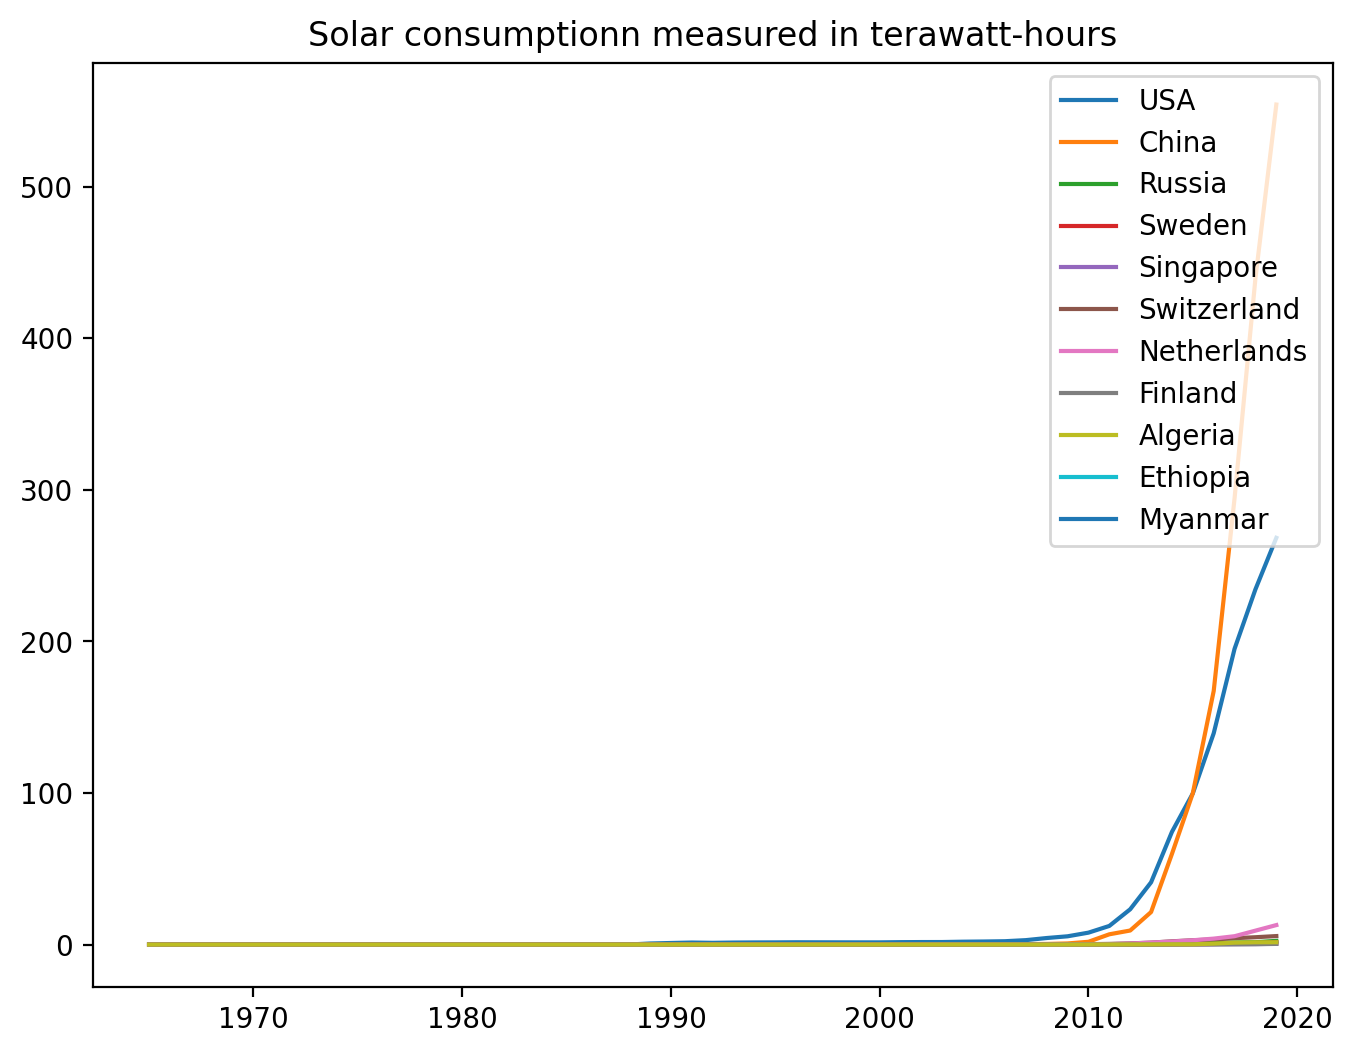

In [32]:
plt.figure(figsize=(8,6))
plt.plot(usa.year, usa.solar_consumption, label="USA")
plt.plot(china.year, china.solar_consumption, label="China")
plt.plot(russia.year, russia.solar_consumption, label="Russia")
plt.plot(sweden.year, sweden.solar_consumption, label="Sweden")
plt.plot(singapore.year, singapore.solar_consumption, label="Singapore")
plt.plot(switzerland.year, switzerland.solar_consumption, label="Switzerland")
plt.plot(netherlands.year, netherlands.solar_consumption, label="Netherlands")
plt.plot(finland.year, finland.solar_consumption, label="Finland")
plt.plot(algeria.year, algeria.solar_consumption, label="Algeria")
plt.plot(ethiopia.year, ethiopia.solar_consumption, label="Ethiopia")
plt.plot(myanmar.year, myanmar.solar_consumption, label="Myanmar")
plt.title("Solar consumptionn measured in terawatt-hours")
plt.legend(loc='upper right')

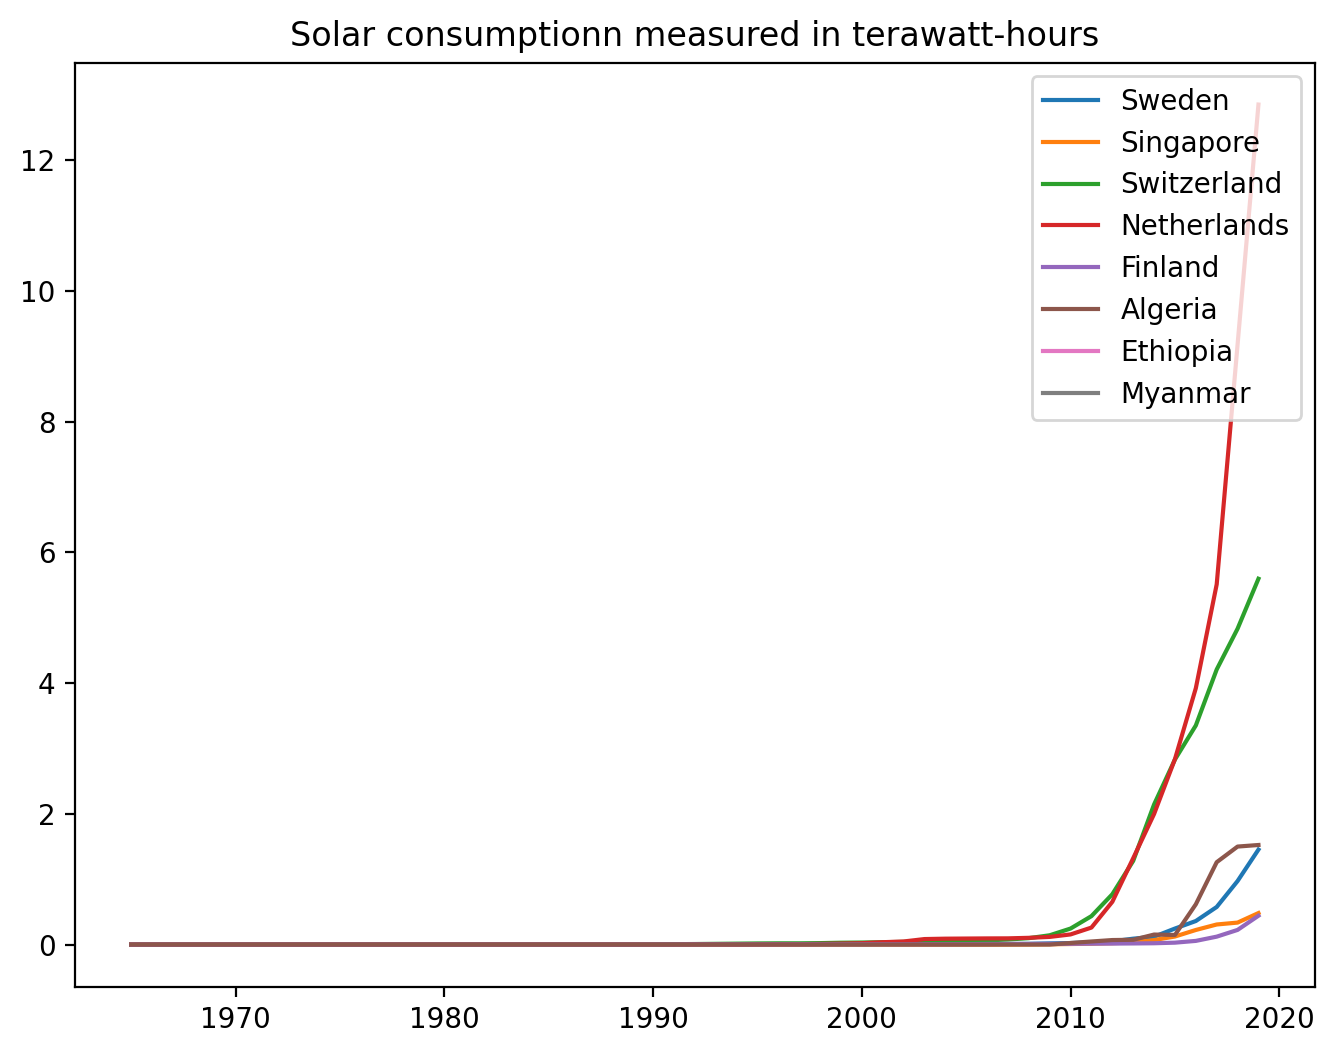

In [39]:
plt.figure(figsize=(8,6))
plt.plot(sweden.year, sweden.solar_consumption, label="Sweden")
plt.plot(singapore.year, singapore.solar_consumption, label="Singapore")
plt.plot(switzerland.year, switzerland.solar_consumption, label="Switzerland")
plt.plot(netherlands.year, netherlands.solar_consumption, label="Netherlands")
plt.plot(finland.year, finland.solar_consumption, label="Finland")
plt.plot(algeria.year, algeria.solar_consumption, label="Algeria")
plt.plot(ethiopia.year, ethiopia.solar_consumption, label="Ethiopia")
plt.plot(myanmar.year, myanmar.solar_consumption, label="Myanmar")
plt.title("Solar consumptionn measured in terawatt-hours")
plt.legend(loc='upper right')

## Hydro

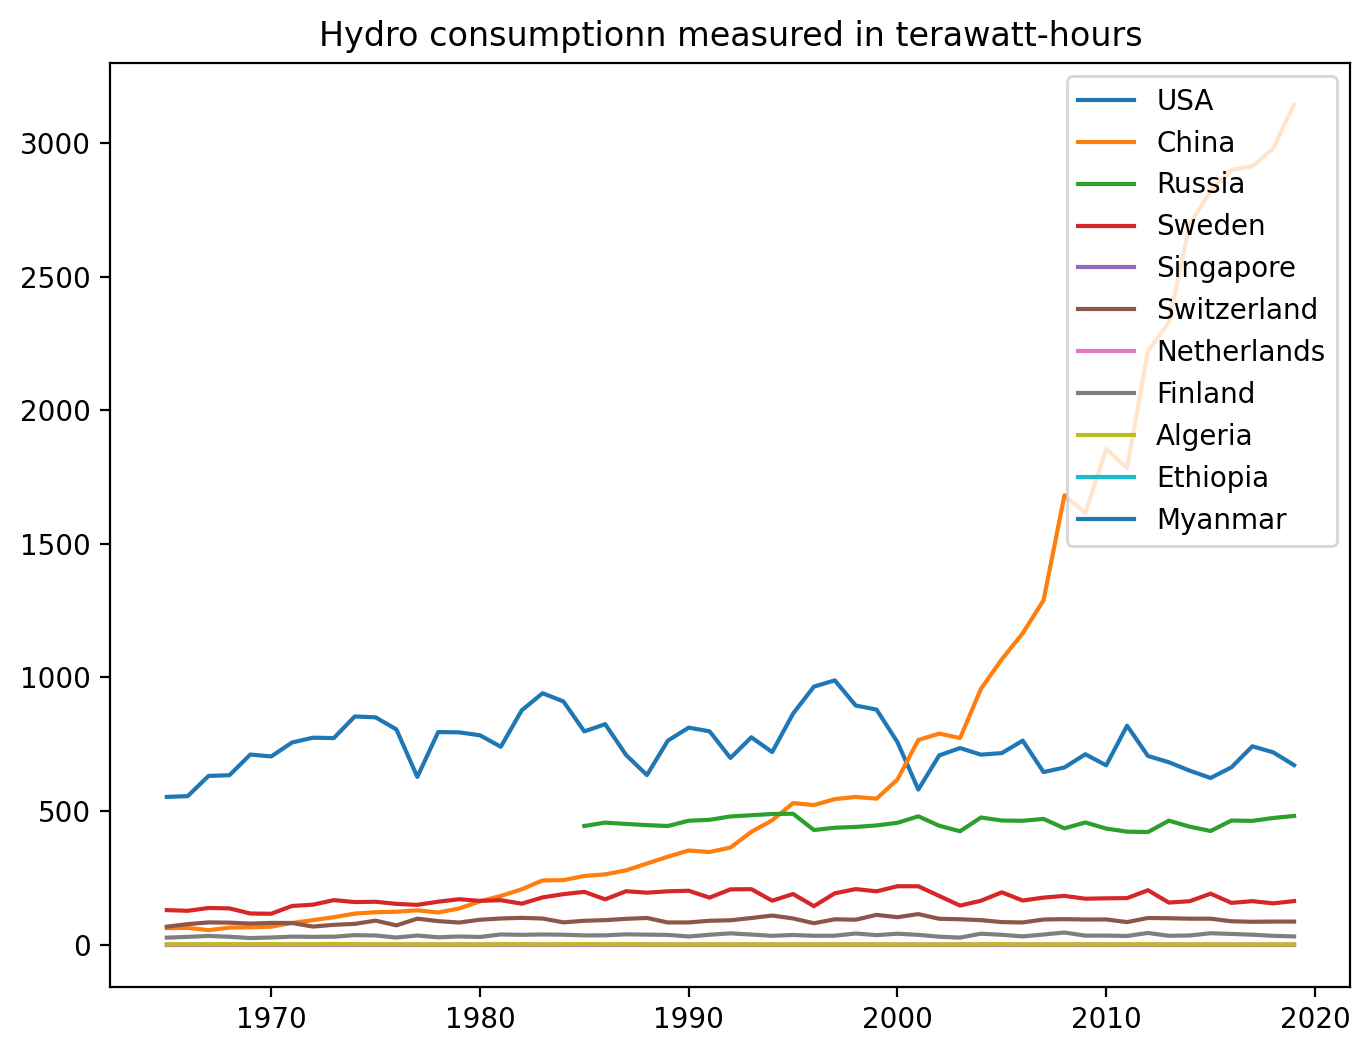

In [33]:
plt.figure(figsize=(8,6))
plt.plot(usa.year, usa.hydro_consumption, label="USA")
plt.plot(china.year, china.hydro_consumption, label="China")
plt.plot(russia.year, russia.hydro_consumption, label="Russia")
plt.plot(sweden.year, sweden.hydro_consumption, label="Sweden")
plt.plot(singapore.year, singapore.hydro_consumption, label="Singapore")
plt.plot(switzerland.year, switzerland.hydro_consumption, label="Switzerland")
plt.plot(netherlands.year, netherlands.hydro_consumption, label="Netherlands")
plt.plot(finland.year, finland.hydro_consumption, label="Finland")
plt.plot(algeria.year, algeria.hydro_consumption, label="Algeria")
plt.plot(ethiopia.year, ethiopia.hydro_consumption, label="Ethiopia")
plt.plot(myanmar.year, myanmar.hydro_consumption, label="Myanmar")
plt.title("Hydro consumptionn measured in terawatt-hours")
plt.legend(loc='upper right')

In [38]:
plt.figure(figsize=(8,6))
plt.plot(sweden.year, sweden.hydro_consumption, label="Sweden")
plt.plot(singapore.year, singapore.hydro_consumption, label="Singapore")
plt.plot(switzerland.year, switzerland.hydro_consumption, label="Switzerland")
plt.plot(netherlands.year, netherlands.hydro_consumption, label="Netherlands")
plt.plot(finland.year, finland.hydro_consumption, label="Finland")
plt.plot(algeria.year, algeria.hydro_consumption, label="Algeria")
plt.plot(ethiopia.year, ethiopia.hydro_consumption, label="Ethiopia")
plt.plot(myanmar.year, myanmar.hydro_consumption, label="Myanmar")
plt.title("Hydro consumptionn measured in terawatt-hours")
plt.legend(loc='upper right')

## Wind

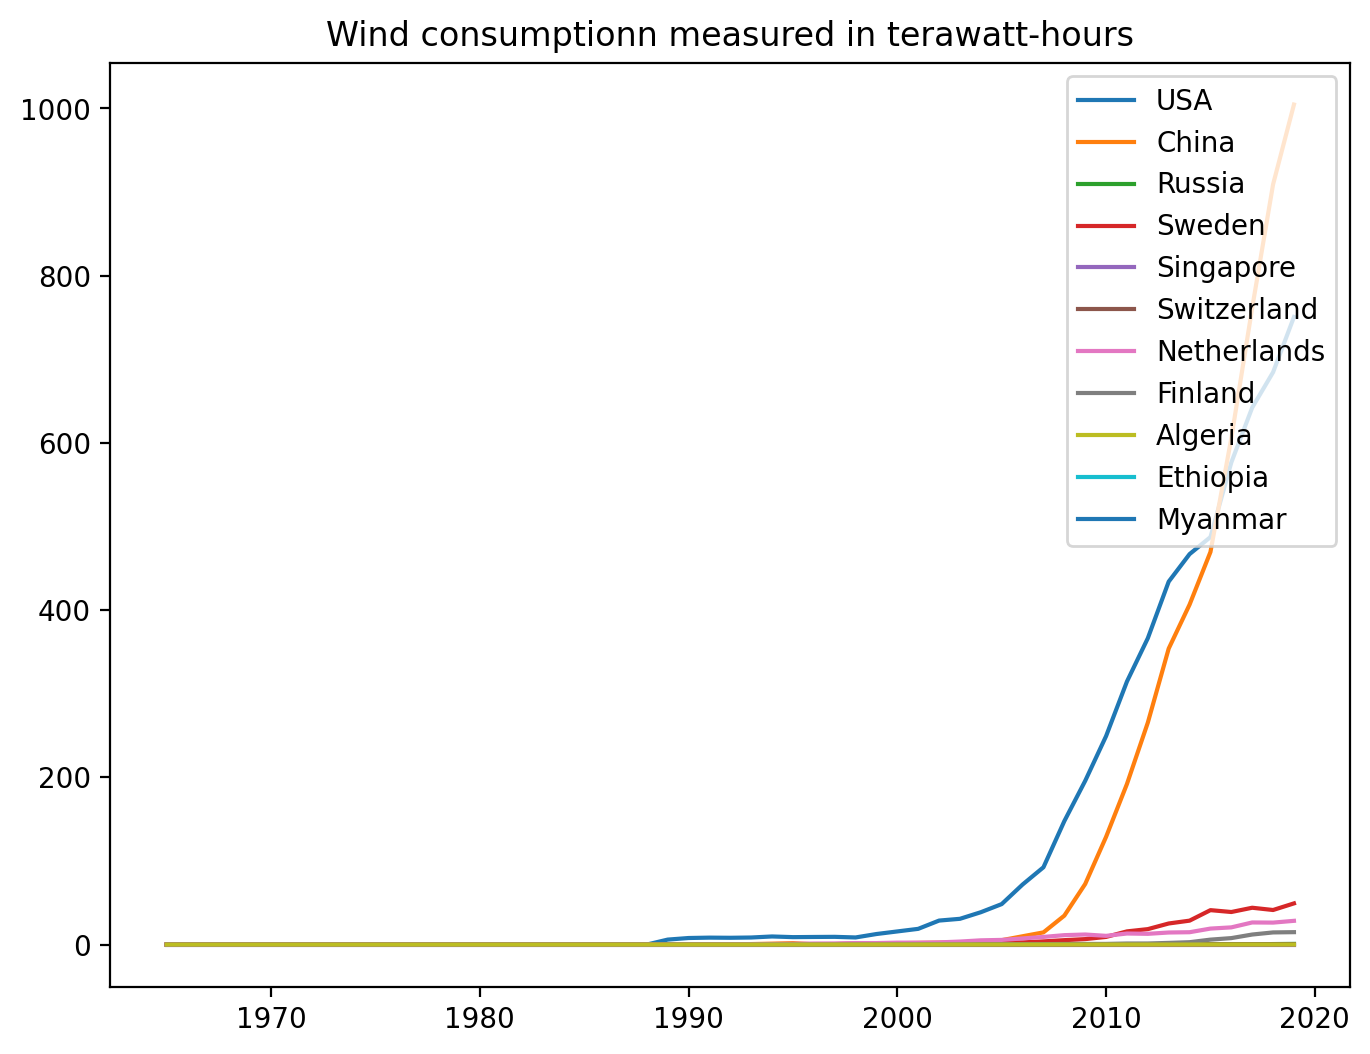

In [34]:
plt.figure(figsize=(8,6))
plt.plot(usa.year, usa.wind_consumption, label="USA")
plt.plot(china.year, china.wind_consumption, label="China")
plt.plot(russia.year, russia.wind_consumption, label="Russia")
plt.plot(sweden.year, sweden.wind_consumption, label="Sweden")
plt.plot(singapore.year, singapore.wind_consumption, label="Singapore")
plt.plot(switzerland.year, switzerland.wind_consumption, label="Switzerland")
plt.plot(netherlands.year, netherlands.wind_consumption, label="Netherlands")
plt.plot(finland.year, finland.wind_consumption, label="Finland")
plt.plot(algeria.year, algeria.wind_consumption, label="Algeria")
plt.plot(ethiopia.year, ethiopia.wind_consumption, label="Ethiopia")
plt.plot(myanmar.year, myanmar.wind_consumption, label="Myanmar")
plt.title("Wind consumptionn measured in terawatt-hours")
plt.legend(loc='upper right')

In [40]:
plt.figure(figsize=(8,6))
plt.plot(sweden.year, sweden.wind_consumption, label="Sweden")
plt.plot(singapore.year, singapore.wind_consumption, label="Singapore")
plt.plot(switzerland.year, switzerland.wind_consumption, label="Switzerland")
plt.plot(netherlands.year, netherlands.wind_consumption, label="Netherlands")
plt.plot(finland.year, finland.wind_consumption, label="Finland")
plt.plot(algeria.year, algeria.wind_consumption, label="Algeria")
plt.plot(ethiopia.year, ethiopia.wind_consumption, label="Ethiopia")
plt.plot(myanmar.year, myanmar.wind_consumption, label="Myanmar")
plt.title("Wind consumptionn measured in terawatt-hours")
plt.legend(loc='upper right')

## GAS

In [31]:
plt.figure(figsize=(8,6))
plt.plot(usa.year, usa.gas_consumption, label="USA")
plt.plot(china.year, china.gas_consumption, label="China")
plt.plot(russia.year, russia.gas_consumption, label="Russia")
plt.plot(sweden.year, sweden.gas_consumption, label="Sweden")
plt.plot(singapore.year, singapore.gas_consumption, label="Singapore")
plt.plot(switzerland.year, switzerland.gas_consumption, label="Switzerland")
plt.plot(netherlands.year, netherlands.gas_consumption, label="Netherlands")
plt.plot(finland.year, finland.gas_consumption, label="Finland")
plt.plot(algeria.year, algeria.gas_consumption, label="Algeria")
plt.plot(ethiopia.year, ethiopia.gas_consumption, label="Ethiopia")
plt.plot(myanmar.year, myanmar.gas_consumption, label="Myanmar")
plt.title("GAS consumptionn measured in terawatt-hours")
plt.legend(loc='upper right')

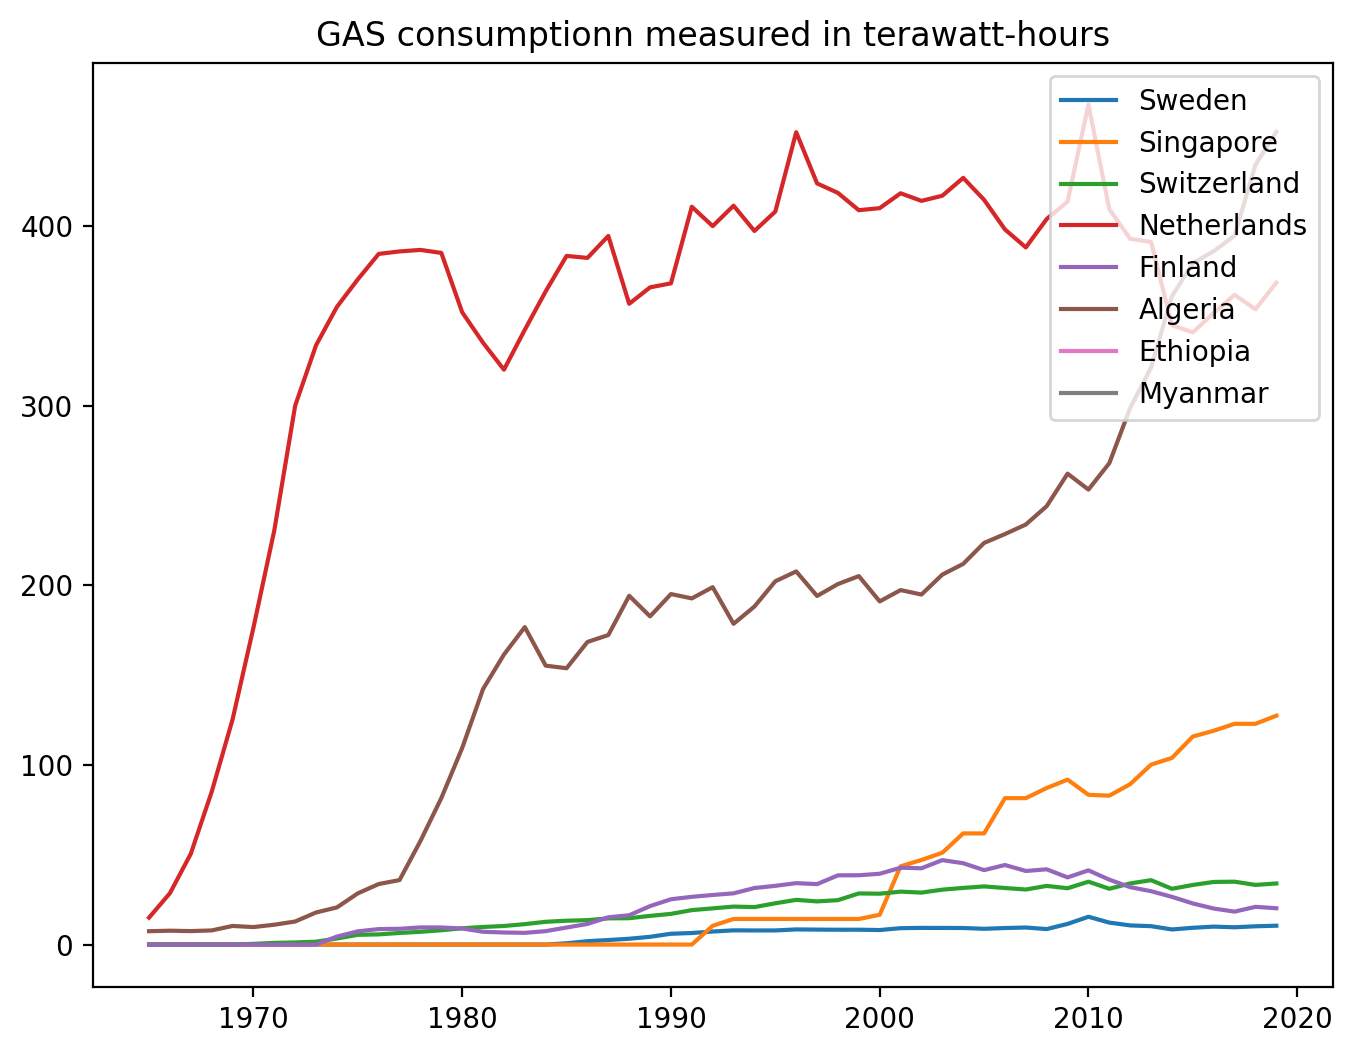

In [41]:
plt.figure(figsize=(8,6))
plt.plot(sweden.year, sweden.gas_consumption, label="Sweden")
plt.plot(singapore.year, singapore.gas_consumption, label="Singapore")
plt.plot(switzerland.year, switzerland.gas_consumption, label="Switzerland")
plt.plot(netherlands.year, netherlands.gas_consumption, label="Netherlands")
plt.plot(finland.year, finland.gas_consumption, label="Finland")
plt.plot(algeria.year, algeria.gas_consumption, label="Algeria")
plt.plot(ethiopia.year, ethiopia.gas_consumption, label="Ethiopia")
plt.plot(myanmar.year, myanmar.gas_consumption, label="Myanmar")
plt.title("GAS consumptionn measured in terawatt-hours")
plt.legend(loc='upper right')

## Coal

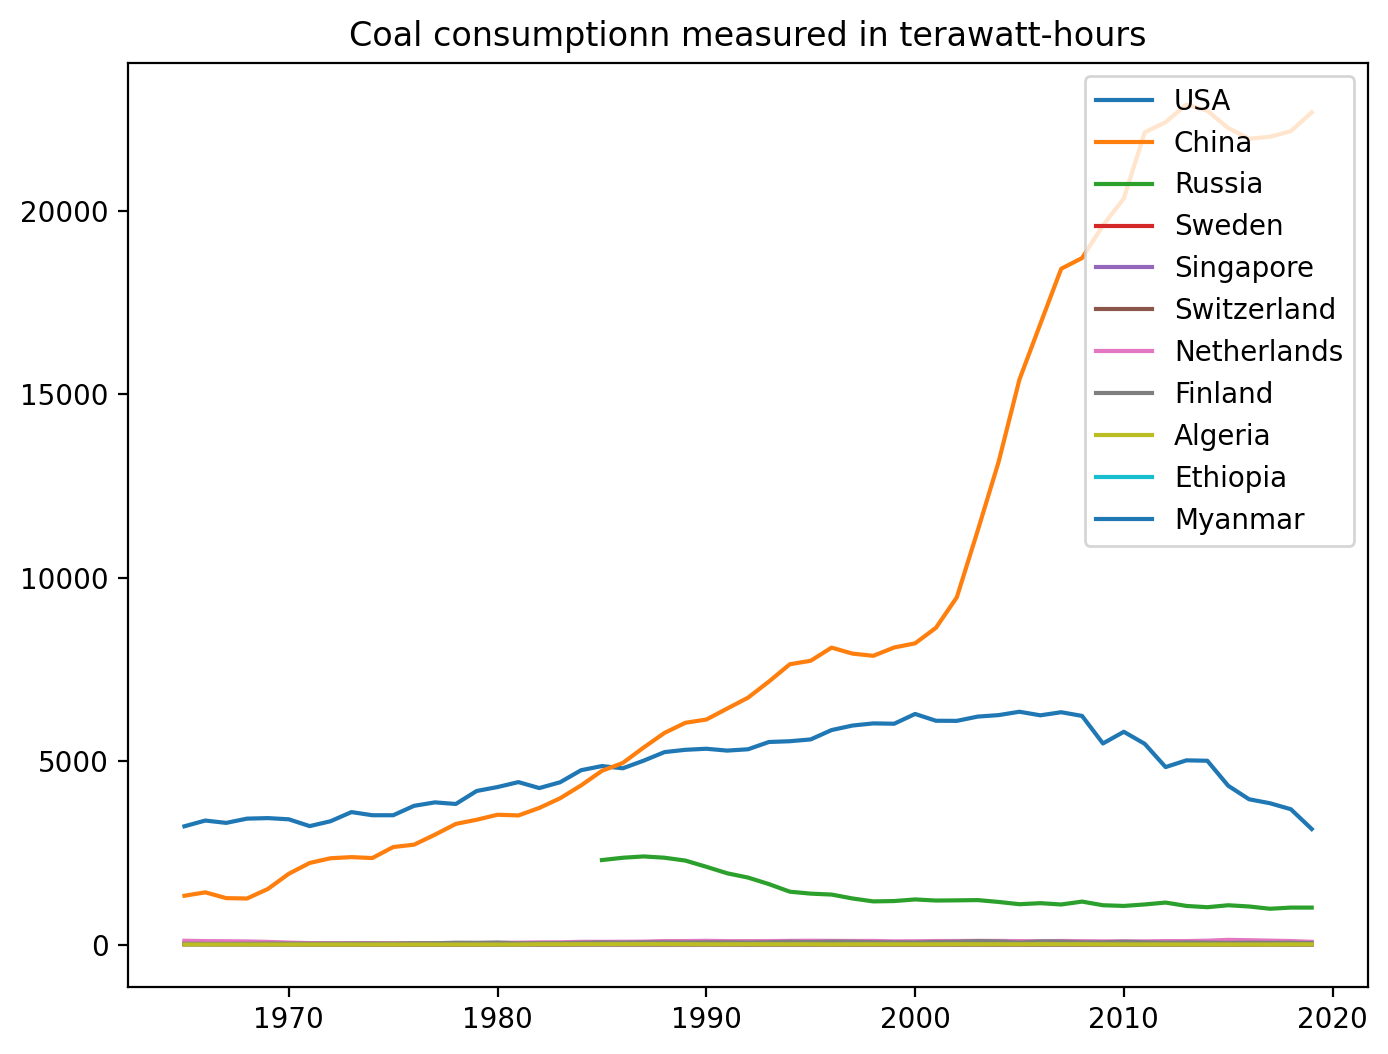

In [44]:
plt.figure(figsize=(8,6))
plt.plot(usa.year, usa.coal_consumption, label="USA")
plt.plot(china.year, china.coal_consumption, label="China")
plt.plot(russia.year, russia.coal_consumption, label="Russia")
plt.plot(sweden.year, sweden.coal_consumption, label="Sweden")
plt.plot(singapore.year, singapore.coal_consumption, label="Singapore")
plt.plot(switzerland.year, switzerland.coal_consumption, label="Switzerland")
plt.plot(netherlands.year, netherlands.coal_consumption, label="Netherlands")
plt.plot(finland.year, finland.coal_consumption, label="Finland")
plt.plot(algeria.year, algeria.coal_consumption, label="Algeria")
plt.plot(ethiopia.year, ethiopia.coal_consumption, label="Ethiopia")
plt.plot(myanmar.year, myanmar.coal_consumption, label="Myanmar")
plt.title("Coal consumptionn measured in terawatt-hours")
plt.legend(loc='upper right')

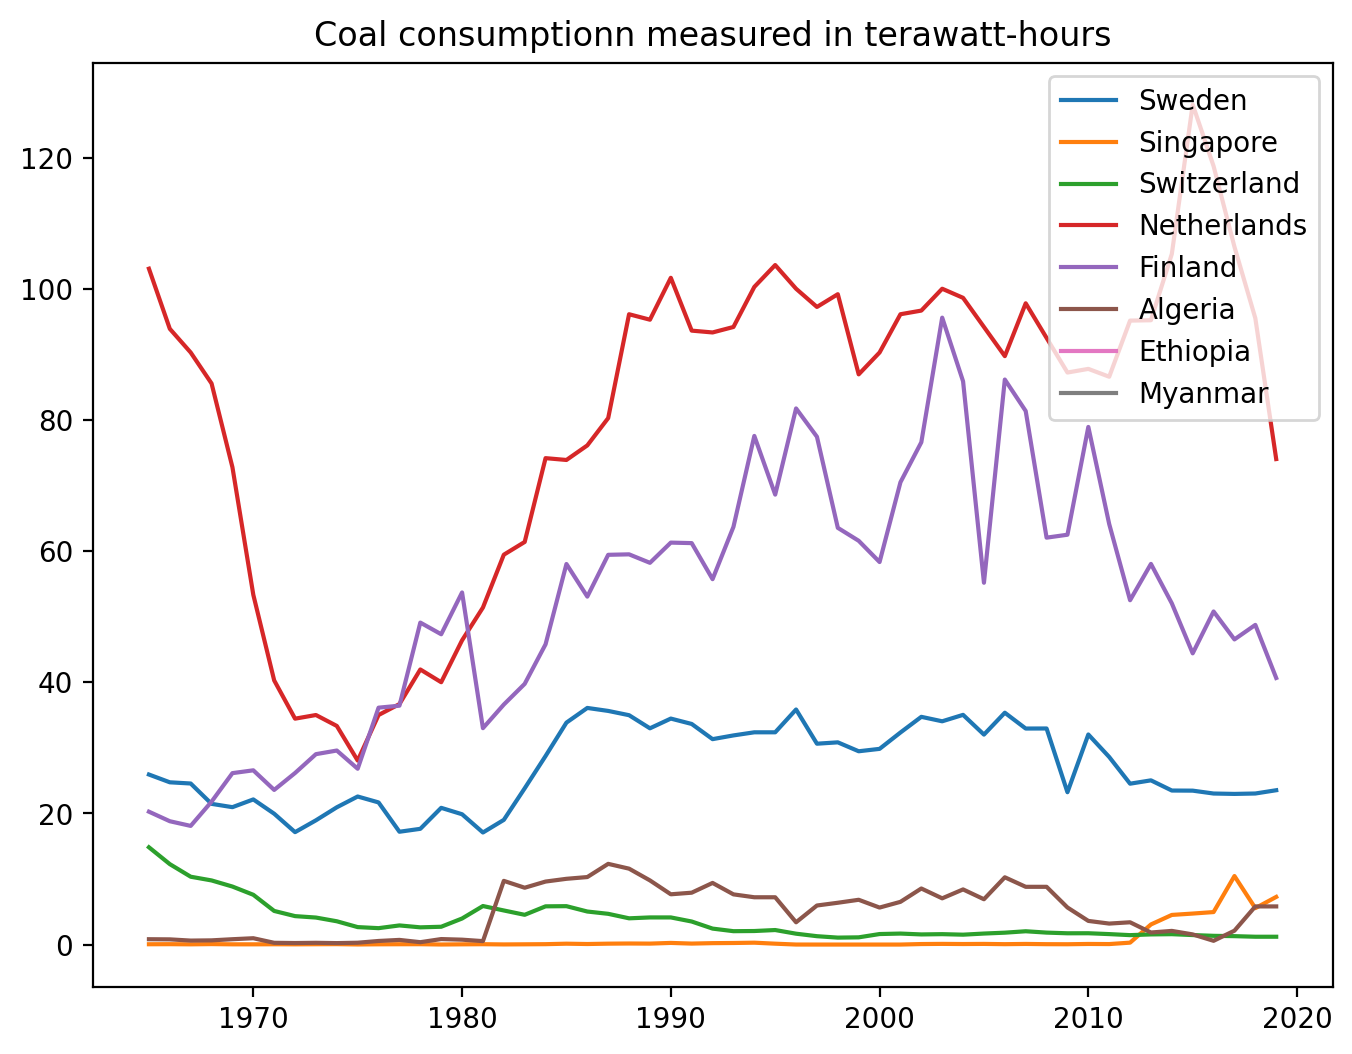

In [42]:
plt.figure(figsize=(8,6))
plt.plot(sweden.year, sweden.coal_consumption, label="Sweden")
plt.plot(singapore.year, singapore.coal_consumption, label="Singapore")
plt.plot(switzerland.year, switzerland.coal_consumption, label="Switzerland")
plt.plot(netherlands.year, netherlands.coal_consumption, label="Netherlands")
plt.plot(finland.year, finland.coal_consumption, label="Finland")
plt.plot(algeria.year, algeria.coal_consumption, label="Algeria")
plt.plot(ethiopia.year, ethiopia.coal_consumption, label="Ethiopia")
plt.plot(myanmar.year, myanmar.coal_consumption, label="Myanmar")
plt.title("Coal consumptionn measured in terawatt-hours")
plt.legend(loc='upper right')

## Oil

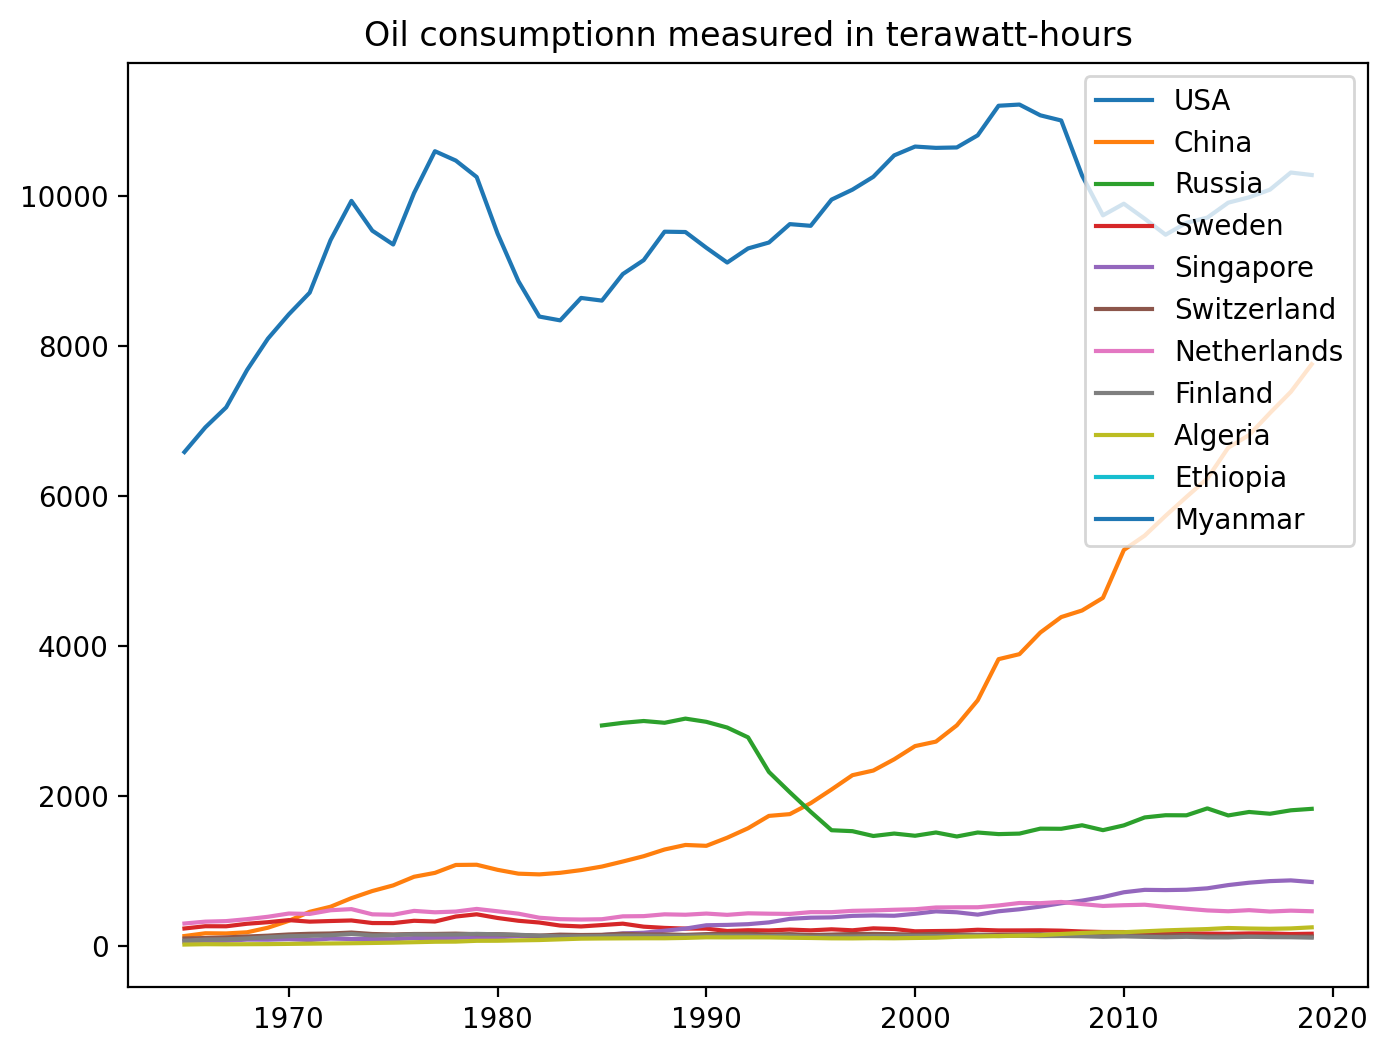

In [36]:
plt.figure(figsize=(8,6))
plt.plot(usa.year, usa.oil_consumption, label="USA")
plt.plot(china.year, china.oil_consumption, label="China")
plt.plot(russia.year, russia.oil_consumption, label="Russia")
plt.plot(sweden.year, sweden.oil_consumption, label="Sweden")
plt.plot(singapore.year, singapore.oil_consumption, label="Singapore")
plt.plot(switzerland.year, switzerland.oil_consumption, label="Switzerland")
plt.plot(netherlands.year, netherlands.oil_consumption, label="Netherlands")
plt.plot(finland.year, finland.oil_consumption, label="Finland")
plt.plot(algeria.year, algeria.oil_consumption, label="Algeria")
plt.plot(ethiopia.year, ethiopia.oil_consumption, label="Ethiopia")
plt.plot(myanmar.year, myanmar.oil_consumption, label="Myanmar")
plt.title("Oil consumptionn measured in terawatt-hours")
plt.legend(loc='upper right')

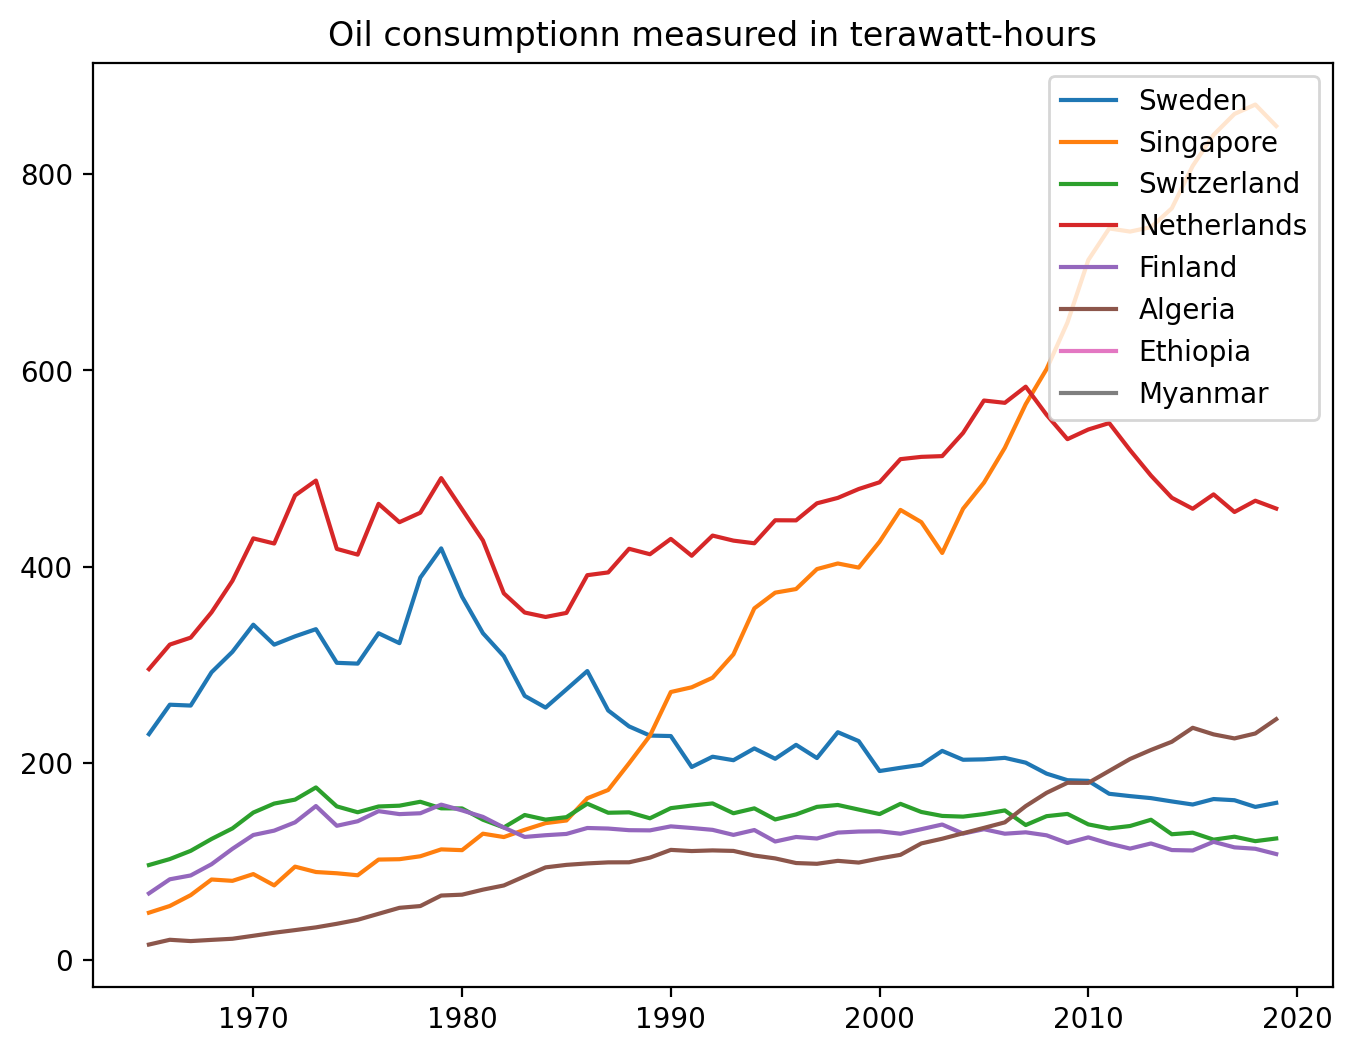

In [43]:
plt.figure(figsize=(8,6))
plt.plot(sweden.year, sweden.oil_consumption, label="Sweden")
plt.plot(singapore.year, singapore.oil_consumption, label="Singapore")
plt.plot(switzerland.year, switzerland.oil_consumption, label="Switzerland")
plt.plot(netherlands.year, netherlands.oil_consumption, label="Netherlands")
plt.plot(finland.year, finland.oil_consumption, label="Finland")
plt.plot(algeria.year, algeria.oil_consumption, label="Algeria")
plt.plot(ethiopia.year, ethiopia.oil_consumption, label="Ethiopia")
plt.plot(myanmar.year, myanmar.oil_consumption, label="Myanmar")
plt.title("Oil consumptionn measured in terawatt-hours")
plt.legend(loc='upper right')